In [343]:
# Helper libraries
import datetime
from packaging import version
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import models
from tensorflow.keras import layers

from collections import Counter
import numpy as np
import pandas as pd

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

#from plot_keras_history import plot_history
# To get consistint results each time we rerun the code.
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

## The MNIST Dataset

In [344]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

In [345]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Data Pre-processing

In [346]:
#x_train = x_train.reshape((60000, 28 * 28))
#x_train = x_train.astype('float32') / 255

#x_test = x_test.reshape((10000, 28 * 28))
#x_test = x_test.astype('float32') / 255
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)



In [347]:
print('y_train_encoded shape: ', y_train_encoded.shape)
print('y_test_encoded shape: ', y_train_encoded.shape)

y_train_encoded shape:  (60000, 10)
y_test_encoded shape:  (60000, 10)


In [348]:
print('x_train:\t{}'.format(x_train.shape))
print('x_test:\t\t{}'.format(x_test.shape))

x_train:	(60000, 28, 28)
x_test:		(10000, 28, 28)


In [349]:
#x_val, x_train = x_train[:5000], x_train[5000:] 
#y_val, y_train = y_train[:5000], y_train[5000:]

# Reshape the images:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

# After reshape:
print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


In [350]:
x_train_norm = x_train_reshaped.astype('float32') / 255
x_test_norm = x_test_reshaped.astype('float32') / 255

In [351]:
model1 = models.Sequential()
model1.add(layers.Dense(1, activation='relu', input_shape=(784,)))
model1.add(layers.Dense(10, activation='softmax'))   

In [352]:
model1.compile(optimizer='rmsprop',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [353]:
history1 = model1.fit(x_train_norm, y_train_encoded, epochs=30,
                    validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 1s 583us/step - loss: 2.0989 - accuracy: 0.2051 - val_loss: 1.8640 - val_accuracy: 0.2480
Epoch 2/30
1688/1688 [==============================] - 1s 527us/step - loss: 1.8505 - accuracy: 0.2654 - val_loss: 1.7710 - val_accuracy: 0.2807
Epoch 3/30
1688/1688 [==============================] - 1s 534us/step - loss: 1.7726 - accuracy: 0.2950 - val_loss: 1.7026 - val_accuracy: 0.3192
Epoch 4/30
1688/1688 [==============================] - 1s 516us/step - loss: 1.7053 - accuracy: 0.3245 - val_loss: 1.6555 - val_accuracy: 0.3297
Epoch 5/30
1688/1688 [==============================] - 1s 504us/step - loss: 1.6667 - accuracy: 0.3335 - val_loss: 1.6177 - val_accuracy: 0.3325
Epoch 6/30
1688/1688 [==============================] - 1s 519us/step - loss: 1.6361 - accuracy: 0.3414 - val_loss: 1.5941 - val_accuracy: 0.3530
Epoch 7/30
1688/1688 [==============================] - 1s 539us/step - loss: 1.6161 - accuracy: 0.3521 - val_loss: 1.5770 -

In [354]:
loss, accuracy = model1.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 0s 429us/step - loss: 1.5508 - accuracy: 0.3848
test set accuracy:  38.4799987077713


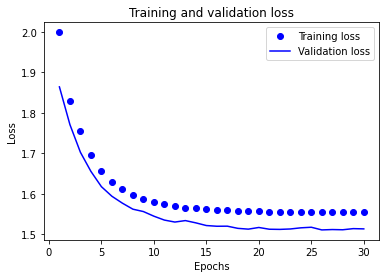

In [355]:
history_dict1 = history1.history
history_dict1.keys()

import matplotlib.pyplot as plt

acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

epochs = range(1, len(acc1) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss1, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss1, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


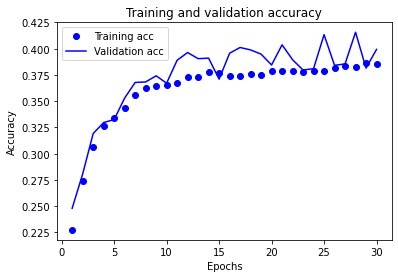

In [356]:
plt.clf()   # clear figure
acc_values1 = history_dict1['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc1, 'bo', label='Training acc')
plt.plot(epochs, val_acc1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


## Confusion Matrix

In [357]:
pred_classes = np.argmax(model1.predict(x_train_norm), axis=-1)

In [358]:
conf_mx1 = confusion_matrix(y_train, pred_classes)
conf_mx1

array([[ 310,    0, 3985,  410,   37,  676,  497,    1,    0,    7],
       [   4, 5398,   15,   77,  131,   25,   21,  746,    0,  325],
       [ 198,   11, 2388, 1005,  377,  688, 1186,   19,    0,   86],
       [ 184,   54,  817, 2583, 1033, 1018,   84,   74,    0,  284],
       [  17,   51,   80,  698, 2766,  113,   15,  199,    0, 1903],
       [ 228,    9,  804, 2330,  734, 1124,   69,   14,    0,  109],
       [  75,    0, 1763,  157,   45,  183, 3686,    2,    0,    7],
       [   0, 3458,    3,   55,  243,    6,    0, 1583,    0,  917],
       [ 155,   27,  600, 2415, 1407,  808,   15,   69,    0,  355],
       [   6,  284,   18,  185, 1302,   27,    1,  905,    0, 3221]], dtype=int64)

In [359]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

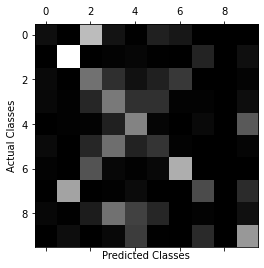

In [360]:
plt.matshow(conf_mx1, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_plot_mnist", tight_layout=False)
plt.show()

## Activation Values of the Hidden Nodes

In [361]:
# Extracts the outputs of the 2 layers:
layer_outputs1 = [layer.output for layer in model1.layers]

# Creates a model that will return these outputs, given the model input:
activation_model1 = models.Model(inputs=model1.input, outputs=layer_outputs1)

print(f"There are {len(layer_outputs1)} layers")
layer_outputs1 # description of the layers

There are 2 layers


[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>]

In [362]:
# Get the output of the hidden node for each of the 55000 training images
activations1 = activation_model1.predict(x_train_norm)
hidden_layer_activation1 = activations1[0]
hidden_layer_activation1.shape   #  hidden node has one activation value per training image

(60000, 1)

In [363]:
print(f"The maximum activation value of the hidden node is {hidden_layer_activation1.max()}")

The maximum activation value of the hidden node is 66.3997573852539


In [364]:
# Some stats about the output layer as an aside...
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation1 = activations1[1]
print(f"The output node has shape {ouput_layer_activation1.shape}")
print(f"The output for the first image are {ouput_layer_activation1[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation1[0].sum()}")

The output node has shape (60000, 10)
The output for the first image are [0.1002 0.     0.0964 0.232  0.1081 0.212  0.0244 0.0002 0.2033 0.0234]
The sum of the probabilities is (approximately) 1.0


## Boxplot

In [365]:
boxplot_df1 = pd.DataFrame({'act_value':hidden_layer_activation1.reshape(60000),
                           'pred_class':pred_classes})
boxplot_df1.head()

,act_value,pred_class
0,4.605474,3
1,6.275420,5
2,1.898938,9
3,0.657244,7
4,1.737690,9


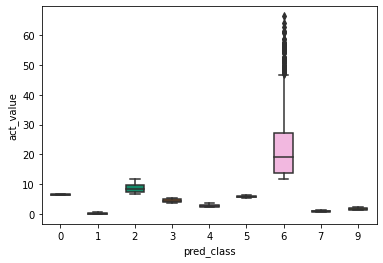

In [366]:
# Let us use seaborn for the boxplots this time.
import seaborn as sns
bplot = sns.boxplot(y='act_value', x='pred_class', 
                 data=boxplot_df1, 
                 width=0.5,
                 palette="colorblind")

In [367]:
boxplot_df1['pred_class'].value_counts() # Another way to verify what the boxplot is telling us


2    10473
3     9915
1     9292
4     8075
9     7214
6     5574
5     4668
7     3612
0     1177
Name: pred_class, dtype: int64

## Experiment 2

In [368]:
model2 = models.Sequential()

model2.add(layers.Dense(2, activation='relu', input_shape=(784,)))
model2.add(layers.Dense(10, activation='softmax'))   

In [369]:
model2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',              
                metrics=['accuracy'])



In [370]:
history2 = model2.fit(x_train_norm, y_train_encoded, epochs=30,
                    validation_split=0.1)


Epoch 1/30
1688/1688 [==============================] - 1s 650us/step - loss: 1.8425 - accuracy: 0.3416 - val_loss: 1.3435 - val_accuracy: 0.5042
Epoch 2/30
1688/1688 [==============================] - 1s 577us/step - loss: 1.3416 - accuracy: 0.5202 - val_loss: 1.1836 - val_accuracy: 0.5835
Epoch 3/30
1688/1688 [==============================] - 1s 591us/step - loss: 1.2202 - accuracy: 0.5696 - val_loss: 1.0998 - val_accuracy: 0.6292
Epoch 4/30
1688/1688 [==============================] - 1s 583us/step - loss: 1.1344 - accuracy: 0.6143 - val_loss: 1.0382 - val_accuracy: 0.6627
Epoch 5/30
1688/1688 [==============================] - 1s 566us/step - loss: 1.0908 - accuracy: 0.6382 - val_loss: 1.0019 - val_accuracy: 0.6760
Epoch 6/30
1688/1688 [==============================] - 1s 576us/step - loss: 1.0556 - accuracy: 0.6446 - val_loss: 0.9873 - val_accuracy: 0.6770
Epoch 7/30
1688/1688 [==============================] - 1s 593us/step - loss: 1.0483 - accuracy: 0.6442 - val_loss: 0.9745 -

In [371]:
test_loss, test_acc = model2.evaluate(x_test_norm, y_test_encoded)

313/313 [==============================] - 0s 418us/step - loss: 1.0006 - accuracy: 0.6769


In [372]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.6769000291824341, test loss: 1.0005762577056885


In [373]:
history_dict2 = history2.history
history_dict2.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

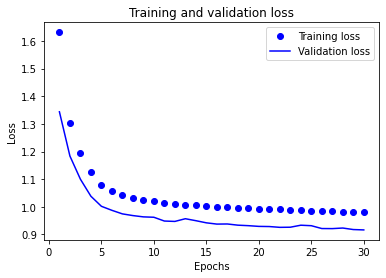

In [374]:
import matplotlib.pyplot as plt

acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(1, len(acc2) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss2, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

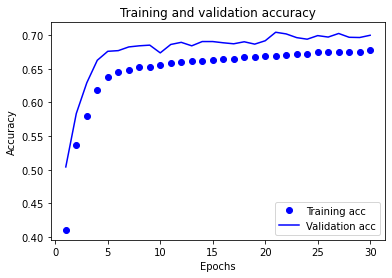

In [375]:
plt.clf()  
acc_values2 = history_dict2['accuracy']

plt.plot(epochs, acc2, 'bo', label='Training acc')
plt.plot(epochs, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [376]:
pred_classes2 = np.argmax(model2.predict(x_train_norm), axis=-1)

In [377]:
conf_mx2 = confusion_matrix(y_train,pred_classes2)
conf_mx2

array([[4787,    0,    3,   19,  356,  578,  165,    1,    9,    5],
       [   0, 6239,  160,  297,    7,    3,    1,   12,   11,   12],
       [  26,  241, 4135,  652,   54,  201,  351,   16,  263,   19],
       [  17,  451,  709, 3630,  153,  484,   30,  173,  422,   62],
       [ 178,    5,    6,  157, 4382,  291,   16,   51,   19,  737],
       [ 553,   32,  161,  509,  725, 2593,  271,   20,  469,   88],
       [ 305,    3,  412,   27,   18,  205, 4815,    0,  133,    0],
       [   2,  130,    6,  219,   99,   12,    0, 5136,    1,  660],
       [ 246,  132,  391, 1390,  210, 1832,  225,    3, 1394,   28],
       [  35,    7,    1,  110, 1265,   69,    3,  862,    2, 3595]], dtype=int64)

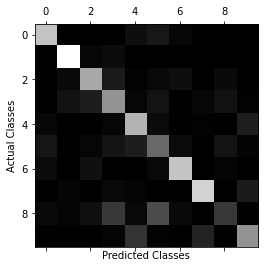

In [378]:
plt.matshow(conf_mx2, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

In [379]:
# Extracts the outputs of the 2 layers:
layer_outputs2 = [layer.output for layer in model2.layers]

# Creates a model that will return these outputs, given the model input:
activation_model2 = models.Model(inputs=model2.input, outputs=layer_outputs2)

print(f"There are {len(layer_outputs2)} layers")
layer_outputs2 # description of the layers

There are 2 layers


[<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_2')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_3')>]

In [380]:
activations2 = activation_model2.predict(x_train_norm)
hidden_layer_activation2 = activations2[0]
hidden_layer_activation2.shape   #  2 hidden node each has one activation value per training image


(60000, 2)

In [381]:
hidden_node1_activation2 = hidden_layer_activation2[:,0] # get activation values of the first hidden node
hidden_node2_activation2 = hidden_layer_activation2[:,1] # get activation values of the second hidden node

print(f"The maximum activation value of the first hidden node is {hidden_node1_activation2.max()}")
print(f"The maximum activation value of the second hidden node is {hidden_node2_activation2.max()}")

The maximum activation value of the first hidden node is 44.931396484375
The maximum activation value of the second hidden node is 46.366268157958984


In [382]:
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation2 = activations2[1]
print(f"The output node has shape {ouput_layer_activation2.shape}")
print(f"The output for the first image are {ouput_layer_activation2[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation2[0].sum()}")

The output node has shape (60000, 10)
The output for the first image are [0.0094 0.0003 0.052  0.3814 0.042  0.2265 0.0126 0.0002 0.2692 0.0063]
The sum of the probabilities is (approximately) 0.9999999403953552


## Scatterplot

In [383]:
scatterPlot_df2 =  pd.DataFrame({'act_value_h1':hidden_node1_activation2,
                                'act_value_h2':hidden_node2_activation2,
                                'pred_class':pred_classes2})
scatterPlot_df2.head()

,act_value_h1,act_value_h2,pred_class
0,3.839882,5.002647,3
1,11.265862,12.091151,0
2,5.096610,3.028158,9
3,0.000000,1.514783,1
4,16.052444,6.363636,9


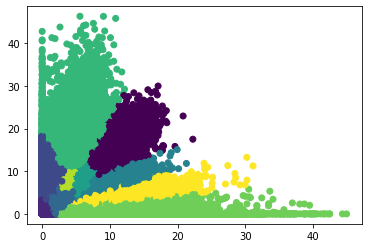

In [384]:
#plt.legend(loc='upper left', prop={'size':6}, bbox_to_anchor=(1,1),ncol=1)
plt.scatter(scatterPlot_df2.act_value_h1, 
            scatterPlot_df2.act_value_h2, 
            c=scatterPlot_df2.pred_class,
            label=scatterPlot_df2.pred_class)
plt.show()

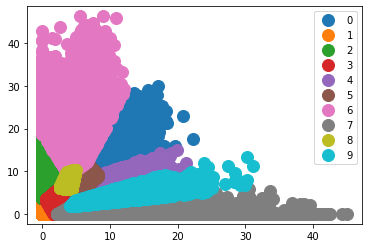

In [385]:
groups = scatterPlot_df2.groupby('pred_class')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.act_value_h1, group.act_value_h2, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

## Comparison between Experiments 1 and 2

In [335]:
## confusion matrices in the same grid and train, val, test accuracies in a dataframe

## Experiment 3 - Best Model

In [386]:
def build_model(n_hidden=1, n_neurons=2, learning_rate=0.001, input_shape=(784,)):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(layers.Dense(10, activation='softmax'))
    optimizer = keras.optimizers.RMSprop(lr=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer,  metrics=['accuracy'])
    return model

In [387]:
keras_clf = KerasClassifier(build_model)

In [388]:
param_grid = {'n_neurons': range(1,101)}
param_grid

{'n_neurons': range(1, 101)}

In [389]:
grid_cv = GridSearchCV(estimator=keras_clf, param_grid=param_grid,cv=3,verbose = 2)
grid_cv.fit(x_train_norm, y_train_encoded, epochs=30,
                  validation_split=0.1,
                  callbacks=[keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_neurons=1 .....................................................
Epoch 1/30


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1125/1125 [==============================] - 1s 630us/step - loss: 2.1082 - accuracy: 0.2015 - val_loss: 1.9210 - val_accuracy: 0.2450
Epoch 2/30
1125/1125 [==============================] - 1s 537us/step - loss: 1.9059 - accuracy: 0.2610 - val_loss: 1.8113 - val_accuracy: 0.2770
Epoch 3/30
1125/1125 [==============================] - 1s 543us/step - loss: 1.8314 - accuracy: 0.2729 - val_loss: 1.7606 - val_accuracy: 0.2890
Epoch 4/30
1125/1125 [==============================] - 1s 532us/step - loss: 1.7823 - accuracy: 0.2828 - val_loss: 1.7262 - val_accuracy: 0.3070
Epoch 5/30
1125/1125 [==============================] - 1s 541us/step - loss: 1.7515 - accuracy: 0.2970 - val_loss: 1.7057 - val_accuracy: 0.3183
Epoch 6/30
1125/1125 [==============================] - 1s 537us/step - loss: 1.7276 - accuracy: 0.3033 - val_loss: 1.6883 - val_accuracy: 0.3230
Epoch 7/30
1125/1125 [==============================] - 1s 540us/step - loss: 1.7031 - accuracy: 0.3114 - val_loss: 1.6723 - val_accura

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.7s remaining:    0.0s


1125/1125 [==============================] - 1s 619us/step - loss: 2.1186 - accuracy: 0.1966 - val_loss: 1.8536 - val_accuracy: 0.2422
Epoch 2/30
1125/1125 [==============================] - 1s 515us/step - loss: 1.8489 - accuracy: 0.2351 - val_loss: 1.7720 - val_accuracy: 0.2555
Epoch 3/30
1125/1125 [==============================] - 1s 519us/step - loss: 1.7876 - accuracy: 0.2454 - val_loss: 1.7368 - val_accuracy: 0.2682
Epoch 4/30
1125/1125 [==============================] - 1s 527us/step - loss: 1.7647 - accuracy: 0.2621 - val_loss: 1.7182 - val_accuracy: 0.2920
Epoch 5/30
1125/1125 [==============================] - 1s 518us/step - loss: 1.7449 - accuracy: 0.2795 - val_loss: 1.7040 - val_accuracy: 0.2935
Epoch 6/30
1125/1125 [==============================] - 1s 519us/step - loss: 1.7436 - accuracy: 0.2791 - val_loss: 1.6976 - val_accuracy: 0.2968
Epoch 7/30
1125/1125 [==============================] - 1s 517us/step - loss: 1.7301 - accuracy: 0.2900 - val_loss: 1.6887 - val_accura

Epoch 6/30
1125/1125 [==============================] - 1s 592us/step - loss: 1.1995 - accuracy: 0.5622 - val_loss: 1.1352 - val_accuracy: 0.5707
Epoch 7/30
1125/1125 [==============================] - 1s 596us/step - loss: 1.1771 - accuracy: 0.5708 - val_loss: 1.1195 - val_accuracy: 0.5785
Epoch 8/30
1125/1125 [==============================] - 1s 582us/step - loss: 1.1694 - accuracy: 0.5764 - val_loss: 1.1107 - val_accuracy: 0.5855
Epoch 9/30
1125/1125 [==============================] - 1s 566us/step - loss: 1.1500 - accuracy: 0.5908 - val_loss: 1.1028 - val_accuracy: 0.5863
Epoch 10/30
1125/1125 [==============================] - 1s 562us/step - loss: 1.1606 - accuracy: 0.5924 - val_loss: 1.0890 - val_accuracy: 0.6010
Epoch 11/30
1125/1125 [==============================] - 1s 582us/step - loss: 1.1380 - accuracy: 0.6059 - val_loss: 1.0779 - val_accuracy: 0.6070
Epoch 12/30
1125/1125 [==============================] - 1s 549us/step - loss: 1.1187 - accuracy: 0.6122 - val_loss: 1.069

Epoch 12/30
1125/1125 [==============================] - 1s 570us/step - loss: 1.1402 - accuracy: 0.6087 - val_loss: 1.1597 - val_accuracy: 0.6037
Epoch 13/30
1125/1125 [==============================] - 1s 598us/step - loss: 1.1213 - accuracy: 0.6237 - val_loss: 1.1539 - val_accuracy: 0.6115
Epoch 14/30
1125/1125 [==============================] - 1s 610us/step - loss: 1.1213 - accuracy: 0.6251 - val_loss: 1.1464 - val_accuracy: 0.6215
Epoch 15/30
1125/1125 [==============================] - 1s 598us/step - loss: 1.1220 - accuracy: 0.6303 - val_loss: 1.1438 - val_accuracy: 0.6255
Epoch 16/30
1125/1125 [==============================] - 1s 597us/step - loss: 1.1127 - accuracy: 0.6405 - val_loss: 1.1424 - val_accuracy: 0.6277
Epoch 17/30
1125/1125 [==============================] - 1s 572us/step - loss: 1.1031 - accuracy: 0.6448 - val_loss: 1.1394 - val_accuracy: 0.6317
Epoch 18/30
1125/1125 [==============================] - 1s 574us/step - loss: 1.0973 - accuracy: 0.6510 - val_loss: 1

Epoch 10/30
1125/1125 [==============================] - 1s 571us/step - loss: 0.7212 - accuracy: 0.7937 - val_loss: 0.8098 - val_accuracy: 0.7713
Epoch 11/30
1125/1125 [==============================] - 1s 561us/step - loss: 0.7191 - accuracy: 0.7950 - val_loss: 0.8071 - val_accuracy: 0.7745
Epoch 12/30
1125/1125 [==============================] - 1s 565us/step - loss: 0.7046 - accuracy: 0.7973 - val_loss: 0.8056 - val_accuracy: 0.7742
Epoch 13/30
1125/1125 [==============================] - 1s 558us/step - loss: 0.6970 - accuracy: 0.8011 - val_loss: 0.8065 - val_accuracy: 0.7745
Epoch 14/30
1125/1125 [==============================] - 1s 576us/step - loss: 0.6988 - accuracy: 0.7987 - val_loss: 0.7959 - val_accuracy: 0.7770
Epoch 15/30
1125/1125 [==============================] - 1s 563us/step - loss: 0.7056 - accuracy: 0.7978 - val_loss: 0.7991 - val_accuracy: 0.7775
Epoch 16/30
625/625 [==============================] - 0s 642us/step - loss: 0.6995 - accuracy: 0.7950
[CV] ..........

1125/1125 [==============================] - 1s 570us/step - loss: 0.4236 - accuracy: 0.8819 - val_loss: 0.4844 - val_accuracy: 0.8652
Epoch 8/30
1125/1125 [==============================] - 1s 576us/step - loss: 0.4128 - accuracy: 0.8859 - val_loss: 0.4880 - val_accuracy: 0.8662
Epoch 9/30
1125/1125 [==============================] - 1s 574us/step - loss: 0.4084 - accuracy: 0.8846 - val_loss: 0.4836 - val_accuracy: 0.8662
Epoch 10/30
1125/1125 [==============================] - 1s 581us/step - loss: 0.4028 - accuracy: 0.8893 - val_loss: 0.4870 - val_accuracy: 0.8675
Epoch 11/30
625/625 [==============================] - 0s 641us/step - loss: 0.4197 - accuracy: 0.8814
[CV] ...................................... n_neurons=5, total=   8.4s
[CV] n_neurons=6 .....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 669us/step - loss: 1.3820 - accuracy: 0.5424 - val_loss: 0.4422 - val_accuracy: 0.8785
Epoch 2/30
1125/1125 [=============

625/625 [==============================] - 0s 617us/step - loss: 0.2992 - accuracy: 0.9154
[CV] ...................................... n_neurons=7, total=  11.3s
[CV] n_neurons=8 .....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 653us/step - loss: 1.0638 - accuracy: 0.6784 - val_loss: 0.3055 - val_accuracy: 0.9178
Epoch 2/30
1125/1125 [==============================] - 1s 560us/step - loss: 0.3733 - accuracy: 0.8916 - val_loss: 0.2665 - val_accuracy: 0.9255
Epoch 3/30
1125/1125 [==============================] - 1s 569us/step - loss: 0.3273 - accuracy: 0.9060 - val_loss: 0.2538 - val_accuracy: 0.9275
Epoch 4/30
1125/1125 [==============================] - 1s 559us/step - loss: 0.3174 - accuracy: 0.9093 - val_loss: 0.2430 - val_accuracy: 0.9310
Epoch 5/30
1125/1125 [==============================] - 1s 578us/step - loss: 0.2989 - accuracy: 0.9179 - val_loss: 0.2384 - val_accuracy: 0.9305
Epoch 6/30
1125/1125 [===============

1125/1125 [==============================] - 1s 591us/step - loss: 0.3250 - accuracy: 0.9088 - val_loss: 0.2283 - val_accuracy: 0.9385
Epoch 3/30
1125/1125 [==============================] - 1s 583us/step - loss: 0.2828 - accuracy: 0.9196 - val_loss: 0.2152 - val_accuracy: 0.9390
Epoch 4/30
1125/1125 [==============================] - 1s 587us/step - loss: 0.2682 - accuracy: 0.9249 - val_loss: 0.2017 - val_accuracy: 0.9425
Epoch 5/30
1125/1125 [==============================] - 1s 580us/step - loss: 0.2498 - accuracy: 0.9319 - val_loss: 0.1910 - val_accuracy: 0.9460
Epoch 6/30
1125/1125 [==============================] - 1s 579us/step - loss: 0.2418 - accuracy: 0.9321 - val_loss: 0.1926 - val_accuracy: 0.9477
Epoch 7/30
1125/1125 [==============================] - 1s 571us/step - loss: 0.2280 - accuracy: 0.9362 - val_loss: 0.1900 - val_accuracy: 0.9482
Epoch 8/30
1125/1125 [==============================] - 1s 570us/step - loss: 0.2192 - accuracy: 0.9409 - val_loss: 0.1889 - val_accura

Epoch 10/30
1125/1125 [==============================] - 1s 613us/step - loss: 0.2063 - accuracy: 0.9440 - val_loss: 0.1808 - val_accuracy: 0.9575
Epoch 11/30
1125/1125 [==============================] - 1s 583us/step - loss: 0.1916 - accuracy: 0.9461 - val_loss: 0.1769 - val_accuracy: 0.9548
Epoch 12/30
1125/1125 [==============================] - 1s 592us/step - loss: 0.1928 - accuracy: 0.9457 - val_loss: 0.1791 - val_accuracy: 0.9540
Epoch 13/30
1125/1125 [==============================] - 1s 595us/step - loss: 0.1902 - accuracy: 0.9480 - val_loss: 0.1757 - val_accuracy: 0.9595
Epoch 14/30
1125/1125 [==============================] - 1s 590us/step - loss: 0.1892 - accuracy: 0.9490 - val_loss: 0.1817 - val_accuracy: 0.9560
Epoch 15/30
625/625 [==============================] - 0s 661us/step - loss: 0.2470 - accuracy: 0.9340
[CV] ..................................... n_neurons=12, total=  11.2s
[CV] n_neurons=12 ....................................................
Epoch 1/30
1125/1125

625/625 [==============================] - 0s 669us/step - loss: 0.2209 - accuracy: 0.9398
[CV] ..................................... n_neurons=14, total=   9.2s
[CV] n_neurons=15 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 684us/step - loss: 0.8559 - accuracy: 0.7604 - val_loss: 0.2413 - val_accuracy: 0.9325
Epoch 2/30
1125/1125 [==============================] - 1s 589us/step - loss: 0.3010 - accuracy: 0.9145 - val_loss: 0.2093 - val_accuracy: 0.9425
Epoch 3/30
1125/1125 [==============================] - 1s 595us/step - loss: 0.2599 - accuracy: 0.9248 - val_loss: 0.1970 - val_accuracy: 0.9427
Epoch 4/30
1125/1125 [==============================] - 1s 610us/step - loss: 0.2425 - accuracy: 0.9317 - val_loss: 0.1807 - val_accuracy: 0.9477
Epoch 5/30
1125/1125 [==============================] - 1s 587us/step - loss: 0.2222 - accuracy: 0.9377 - val_loss: 0.1777 - val_accuracy: 0.9480
Epoch 6/30
1125/1125 [===============

1125/1125 [==============================] - 1s 631us/step - loss: 0.2274 - accuracy: 0.9350 - val_loss: 0.1670 - val_accuracy: 0.9545
Epoch 5/30
1125/1125 [==============================] - 1s 610us/step - loss: 0.2069 - accuracy: 0.9420 - val_loss: 0.1592 - val_accuracy: 0.9565
Epoch 6/30
1125/1125 [==============================] - 1s 619us/step - loss: 0.1955 - accuracy: 0.9440 - val_loss: 0.1576 - val_accuracy: 0.9572
Epoch 7/30
1125/1125 [==============================] - 1s 613us/step - loss: 0.1799 - accuracy: 0.9492 - val_loss: 0.1525 - val_accuracy: 0.9578
Epoch 8/30
1125/1125 [==============================] - 1s 625us/step - loss: 0.1704 - accuracy: 0.9514 - val_loss: 0.1519 - val_accuracy: 0.9597
Epoch 9/30
1125/1125 [==============================] - 1s 611us/step - loss: 0.1667 - accuracy: 0.9532 - val_loss: 0.1484 - val_accuracy: 0.9585
Epoch 10/30
1125/1125 [==============================] - 1s 590us/step - loss: 0.1611 - accuracy: 0.9552 - val_loss: 0.1484 - val_accur

Epoch 13/30
1125/1125 [==============================] - 1s 598us/step - loss: 0.1423 - accuracy: 0.9608 - val_loss: 0.1517 - val_accuracy: 0.9560
Epoch 14/30
1125/1125 [==============================] - 1s 600us/step - loss: 0.1354 - accuracy: 0.9614 - val_loss: 0.1543 - val_accuracy: 0.9565
Epoch 15/30
625/625 [==============================] - 0s 659us/step - loss: 0.2085 - accuracy: 0.9439
[CV] ..................................... n_neurons=19, total=  11.0s
[CV] n_neurons=19 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 705us/step - loss: 0.7794 - accuracy: 0.7835 - val_loss: 0.3109 - val_accuracy: 0.9118
Epoch 2/30
1125/1125 [==============================] - 1s 618us/step - loss: 0.2719 - accuracy: 0.9234 - val_loss: 0.2772 - val_accuracy: 0.9202
Epoch 3/30
1125/1125 [==============================] - 1s 614us/step - loss: 0.2327 - accuracy: 0.9359 - val_loss: 0.2611 - val_accuracy: 0.9295
Epoch 4/30
1125/1125 [=

1125/1125 [==============================] - 1s 719us/step - loss: 0.8176 - accuracy: 0.7610 - val_loss: 0.2140 - val_accuracy: 0.9388
Epoch 2/30
1125/1125 [==============================] - 1s 596us/step - loss: 0.2696 - accuracy: 0.9231 - val_loss: 0.1727 - val_accuracy: 0.9530
Epoch 3/30
1125/1125 [==============================] - 1s 611us/step - loss: 0.2181 - accuracy: 0.9377 - val_loss: 0.1511 - val_accuracy: 0.9582
Epoch 4/30
1125/1125 [==============================] - 1s 599us/step - loss: 0.1918 - accuracy: 0.9454 - val_loss: 0.1502 - val_accuracy: 0.9560
Epoch 5/30
1125/1125 [==============================] - 1s 614us/step - loss: 0.1747 - accuracy: 0.9503 - val_loss: 0.1366 - val_accuracy: 0.9625
Epoch 6/30
1125/1125 [==============================] - 1s 596us/step - loss: 0.1622 - accuracy: 0.9539 - val_loss: 0.1391 - val_accuracy: 0.9617
Epoch 7/30
1125/1125 [==============================] - 1s 624us/step - loss: 0.1552 - accuracy: 0.9556 - val_loss: 0.1340 - val_accura

Epoch 5/30
1125/1125 [==============================] - 1s 632us/step - loss: 0.1815 - accuracy: 0.9487 - val_loss: 0.2266 - val_accuracy: 0.9375
Epoch 6/30
1125/1125 [==============================] - 1s 637us/step - loss: 0.1657 - accuracy: 0.9549 - val_loss: 0.2208 - val_accuracy: 0.9433
Epoch 7/30
1125/1125 [==============================] - 1s 626us/step - loss: 0.1574 - accuracy: 0.9567 - val_loss: 0.2118 - val_accuracy: 0.9442
Epoch 8/30
1125/1125 [==============================] - 1s 621us/step - loss: 0.1454 - accuracy: 0.9581 - val_loss: 0.2154 - val_accuracy: 0.9448
Epoch 9/30
625/625 [==============================] - 1s 641us/step - loss: 0.1912 - accuracy: 0.9484
[CV] ..................................... n_neurons=23, total=   7.5s
[CV] n_neurons=24 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 697us/step - loss: 0.7943 - accuracy: 0.7800 - val_loss: 0.2032 - val_accuracy: 0.9427
Epoch 2/30
1125/1125 [====

625/625 [==============================] - 0s 638us/step - loss: 0.1778 - accuracy: 0.9523
[CV] ..................................... n_neurons=26, total=   7.2s
[CV] n_neurons=27 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 721us/step - loss: 0.7782 - accuracy: 0.7747 - val_loss: 0.2118 - val_accuracy: 0.9410
Epoch 2/30
1125/1125 [==============================] - 1s 634us/step - loss: 0.2664 - accuracy: 0.9247 - val_loss: 0.1727 - val_accuracy: 0.9542
Epoch 3/30
1125/1125 [==============================] - 1s 620us/step - loss: 0.2152 - accuracy: 0.9391 - val_loss: 0.1599 - val_accuracy: 0.9545
Epoch 4/30
1125/1125 [==============================] - 1s 632us/step - loss: 0.1926 - accuracy: 0.9447 - val_loss: 0.1419 - val_accuracy: 0.9595
Epoch 5/30
1125/1125 [==============================] - 1s 615us/step - loss: 0.1696 - accuracy: 0.9526 - val_loss: 0.1294 - val_accuracy: 0.9638
Epoch 6/30
1125/1125 [===============

Epoch 8/30
1125/1125 [==============================] - 1s 613us/step - loss: 0.1321 - accuracy: 0.9617 - val_loss: 0.1291 - val_accuracy: 0.9622
Epoch 9/30
1125/1125 [==============================] - 1s 631us/step - loss: 0.1231 - accuracy: 0.9644 - val_loss: 0.1346 - val_accuracy: 0.9595
Epoch 10/30
625/625 [==============================] - 0s 639us/step - loss: 0.1900 - accuracy: 0.9485
[CV] ..................................... n_neurons=28, total=   8.1s
[CV] n_neurons=28 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 710us/step - loss: 0.7392 - accuracy: 0.7917 - val_loss: 0.3143 - val_accuracy: 0.9105
Epoch 2/30
1125/1125 [==============================] - 1s 629us/step - loss: 0.2680 - accuracy: 0.9219 - val_loss: 0.2719 - val_accuracy: 0.9220
Epoch 3/30
1125/1125 [==============================] - 1s 634us/step - loss: 0.2240 - accuracy: 0.9354 - val_loss: 0.2459 - val_accuracy: 0.9295
Epoch 4/30
1125/1125 [===

Epoch 1/30
1125/1125 [==============================] - 1s 720us/step - loss: 0.6791 - accuracy: 0.8146 - val_loss: 0.2091 - val_accuracy: 0.9398
Epoch 2/30
1125/1125 [==============================] - 1s 628us/step - loss: 0.2599 - accuracy: 0.9264 - val_loss: 0.1696 - val_accuracy: 0.9505
Epoch 3/30
1125/1125 [==============================] - 1s 630us/step - loss: 0.2078 - accuracy: 0.9406 - val_loss: 0.1588 - val_accuracy: 0.9548
Epoch 4/30
1125/1125 [==============================] - 1s 624us/step - loss: 0.1870 - accuracy: 0.9465 - val_loss: 0.1410 - val_accuracy: 0.9600
Epoch 5/30
1125/1125 [==============================] - 1s 613us/step - loss: 0.1648 - accuracy: 0.9537 - val_loss: 0.1366 - val_accuracy: 0.9635
Epoch 6/30
1125/1125 [==============================] - 1s 642us/step - loss: 0.1515 - accuracy: 0.9570 - val_loss: 0.1329 - val_accuracy: 0.9647
Epoch 7/30
1125/1125 [==============================] - 1s 610us/step - loss: 0.1363 - accuracy: 0.9615 - val_loss: 0.1341 -

Epoch 11/30
625/625 [==============================] - 1s 688us/step - loss: 0.1713 - accuracy: 0.9536
[CV] ..................................... n_neurons=31, total=   8.9s
[CV] n_neurons=31 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 731us/step - loss: 0.7130 - accuracy: 0.7995 - val_loss: 0.2999 - val_accuracy: 0.9103
Epoch 2/30
1125/1125 [==============================] - 1s 616us/step - loss: 0.2590 - accuracy: 0.9258 - val_loss: 0.2564 - val_accuracy: 0.9283
Epoch 3/30
1125/1125 [==============================] - 1s 636us/step - loss: 0.2171 - accuracy: 0.9376 - val_loss: 0.2268 - val_accuracy: 0.9352
Epoch 4/30
1125/1125 [==============================] - 1s 622us/step - loss: 0.1799 - accuracy: 0.9487 - val_loss: 0.2070 - val_accuracy: 0.9450
Epoch 5/30
1125/1125 [==============================] - 1s 622us/step - loss: 0.1606 - accuracy: 0.9536 - val_loss: 0.2085 - val_accuracy: 0.9408
Epoch 6/30
1125/1125 [===

Epoch 1/30
1125/1125 [==============================] - 1s 735us/step - loss: 0.6633 - accuracy: 0.8189 - val_loss: 0.1897 - val_accuracy: 0.9495
Epoch 2/30
1125/1125 [==============================] - 1s 631us/step - loss: 0.2404 - accuracy: 0.9329 - val_loss: 0.1492 - val_accuracy: 0.9597
Epoch 3/30
1125/1125 [==============================] - 1s 621us/step - loss: 0.1805 - accuracy: 0.9470 - val_loss: 0.1390 - val_accuracy: 0.9592
Epoch 4/30
1125/1125 [==============================] - 1s 656us/step - loss: 0.1599 - accuracy: 0.9528 - val_loss: 0.1192 - val_accuracy: 0.9663
Epoch 5/30
1125/1125 [==============================] - 1s 658us/step - loss: 0.1373 - accuracy: 0.9605 - val_loss: 0.1161 - val_accuracy: 0.9653
Epoch 6/30
1125/1125 [==============================] - 1s 661us/step - loss: 0.1232 - accuracy: 0.9646 - val_loss: 0.1112 - val_accuracy: 0.9682
Epoch 7/30
1125/1125 [==============================] - 1s 649us/step - loss: 0.1098 - accuracy: 0.9682 - val_loss: 0.1119 -

Epoch 7/30
1125/1125 [==============================] - 1s 654us/step - loss: 0.1202 - accuracy: 0.9653 - val_loss: 0.1690 - val_accuracy: 0.9517
Epoch 8/30
1125/1125 [==============================] - 1s 653us/step - loss: 0.1044 - accuracy: 0.9690 - val_loss: 0.1747 - val_accuracy: 0.9515
Epoch 9/30
625/625 [==============================] - 0s 660us/step - loss: 0.1551 - accuracy: 0.9572
[CV] ..................................... n_neurons=34, total=   7.6s
[CV] n_neurons=35 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 746us/step - loss: 0.6895 - accuracy: 0.8127 - val_loss: 0.2019 - val_accuracy: 0.9415
Epoch 2/30
1125/1125 [==============================] - 1s 660us/step - loss: 0.2471 - accuracy: 0.9307 - val_loss: 0.1607 - val_accuracy: 0.9563
Epoch 3/30
1125/1125 [==============================] - 1s 633us/step - loss: 0.1914 - accuracy: 0.9448 - val_loss: 0.1459 - val_accuracy: 0.9600
Epoch 4/30
1125/1125 [====

Epoch 7/30
1125/1125 [==============================] - 1s 666us/step - loss: 0.1171 - accuracy: 0.9655 - val_loss: 0.1165 - val_accuracy: 0.9690
Epoch 8/30
1125/1125 [==============================] - 1s 631us/step - loss: 0.1036 - accuracy: 0.9698 - val_loss: 0.1222 - val_accuracy: 0.9682
Epoch 9/30
1125/1125 [==============================] - 1s 644us/step - loss: 0.0976 - accuracy: 0.9720 - val_loss: 0.1131 - val_accuracy: 0.9695
Epoch 10/30
1125/1125 [==============================] - 1s 648us/step - loss: 0.0916 - accuracy: 0.9744 - val_loss: 0.1250 - val_accuracy: 0.9712
Epoch 11/30
625/625 [==============================] - 0s 662us/step - loss: 0.1587 - accuracy: 0.9582
[CV] ..................................... n_neurons=36, total=   8.9s
[CV] n_neurons=36 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 941us/step - loss: 0.6872 - accuracy: 0.8093 - val_loss: 0.2754 - val_accuracy: 0.9235
Epoch 2/30
1125/1125 [==

Epoch 1/30
1125/1125 [==============================] - 1s 744us/step - loss: 0.6590 - accuracy: 0.8242 - val_loss: 0.2664 - val_accuracy: 0.9233
Epoch 2/30
1125/1125 [==============================] - 1s 664us/step - loss: 0.2240 - accuracy: 0.9355 - val_loss: 0.2189 - val_accuracy: 0.9365
Epoch 3/30
1125/1125 [==============================] - 1s 676us/step - loss: 0.1753 - accuracy: 0.9481 - val_loss: 0.1931 - val_accuracy: 0.9450
Epoch 4/30
1125/1125 [==============================] - 1s 663us/step - loss: 0.1484 - accuracy: 0.9571 - val_loss: 0.1826 - val_accuracy: 0.9465
Epoch 5/30
1125/1125 [==============================] - 1s 647us/step - loss: 0.1299 - accuracy: 0.9632 - val_loss: 0.1794 - val_accuracy: 0.9480
Epoch 6/30
1125/1125 [==============================] - 1s 663us/step - loss: 0.1144 - accuracy: 0.9678 - val_loss: 0.1713 - val_accuracy: 0.9520
Epoch 7/30
1125/1125 [==============================] - 1s 659us/step - loss: 0.1032 - accuracy: 0.9705 - val_loss: 0.1596 -

1125/1125 [==============================] - 1s 668us/step - loss: 0.1173 - accuracy: 0.9661 - val_loss: 0.1142 - val_accuracy: 0.9693
Epoch 7/30
1125/1125 [==============================] - 1s 666us/step - loss: 0.1022 - accuracy: 0.9705 - val_loss: 0.1162 - val_accuracy: 0.9672
Epoch 8/30
625/625 [==============================] - 1s 711us/step - loss: 0.1464 - accuracy: 0.9584
[CV] ..................................... n_neurons=43, total=   7.0s
[CV] n_neurons=43 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 778us/step - loss: 0.6302 - accuracy: 0.8278 - val_loss: 0.1953 - val_accuracy: 0.9470
Epoch 2/30
1125/1125 [==============================] - 1s 676us/step - loss: 0.2463 - accuracy: 0.9297 - val_loss: 0.1595 - val_accuracy: 0.9572
Epoch 3/30
1125/1125 [==============================] - 1s 666us/step - loss: 0.1911 - accuracy: 0.9457 - val_loss: 0.1324 - val_accuracy: 0.9640
Epoch 4/30
1125/1125 [===============

1125/1125 [==============================] - 1s 679us/step - loss: 0.1326 - accuracy: 0.9630 - val_loss: 0.1628 - val_accuracy: 0.9548
Epoch 5/30
1125/1125 [==============================] - 1s 688us/step - loss: 0.1137 - accuracy: 0.9671 - val_loss: 0.1669 - val_accuracy: 0.9535
Epoch 6/30
625/625 [==============================] - 1s 694us/step - loss: 0.1573 - accuracy: 0.9561
[CV] ..................................... n_neurons=46, total=   5.6s
[CV] n_neurons=47 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 941us/step - loss: 0.6150 - accuracy: 0.8286 - val_loss: 0.1958 - val_accuracy: 0.9467
Epoch 2/30
1125/1125 [==============================] - 1s 667us/step - loss: 0.2405 - accuracy: 0.9312 - val_loss: 0.1475 - val_accuracy: 0.9582
Epoch 3/30
1125/1125 [==============================] - 1s 704us/step - loss: 0.1765 - accuracy: 0.9475 - val_loss: 0.1354 - val_accuracy: 0.9600
Epoch 4/30
1125/1125 [===============

Epoch 1/30
1125/1125 [==============================] - 1s 759us/step - loss: 0.6123 - accuracy: 0.8345 - val_loss: 0.2562 - val_accuracy: 0.9283
Epoch 2/30
1125/1125 [==============================] - 1s 681us/step - loss: 0.2133 - accuracy: 0.9383 - val_loss: 0.2076 - val_accuracy: 0.9423
Epoch 3/30
1125/1125 [==============================] - 1s 668us/step - loss: 0.1658 - accuracy: 0.9507 - val_loss: 0.1879 - val_accuracy: 0.9475
Epoch 4/30
1125/1125 [==============================] - 1s 651us/step - loss: 0.1333 - accuracy: 0.9632 - val_loss: 0.1691 - val_accuracy: 0.9560
Epoch 5/30
1125/1125 [==============================] - 1s 653us/step - loss: 0.1155 - accuracy: 0.9674 - val_loss: 0.1696 - val_accuracy: 0.9535
Epoch 6/30
1125/1125 [==============================] - 1s 648us/step - loss: 0.1029 - accuracy: 0.9697 - val_loss: 0.1628 - val_accuracy: 0.9565
Epoch 7/30
1125/1125 [==============================] - 1s 654us/step - loss: 0.0879 - accuracy: 0.9746 - val_loss: 0.1523 -

1125/1125 [==============================] - 1s 692us/step - loss: 0.1109 - accuracy: 0.9679 - val_loss: 0.0971 - val_accuracy: 0.9722
Epoch 6/30
1125/1125 [==============================] - 1s 698us/step - loss: 0.0961 - accuracy: 0.9720 - val_loss: 0.0961 - val_accuracy: 0.9745
Epoch 7/30
1125/1125 [==============================] - 1s 685us/step - loss: 0.0833 - accuracy: 0.9757 - val_loss: 0.1016 - val_accuracy: 0.9728
Epoch 8/30
625/625 [==============================] - 1s 704us/step - loss: 0.1283 - accuracy: 0.9639
[CV] ..................................... n_neurons=52, total=   7.2s
[CV] n_neurons=52 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 780us/step - loss: 0.5846 - accuracy: 0.8389 - val_loss: 0.1863 - val_accuracy: 0.9470
Epoch 2/30
1125/1125 [==============================] - 1s 683us/step - loss: 0.2250 - accuracy: 0.9346 - val_loss: 0.1493 - val_accuracy: 0.9585
Epoch 3/30
1125/1125 [===============

Epoch 8/30
1125/1125 [==============================] - 1s 675us/step - loss: 0.0704 - accuracy: 0.9796 - val_loss: 0.1493 - val_accuracy: 0.9607
Epoch 9/30
625/625 [==============================] - 0s 670us/step - loss: 0.1345 - accuracy: 0.9631
[CV] ..................................... n_neurons=53, total=   7.9s
[CV] n_neurons=54 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 752us/step - loss: 0.6081 - accuracy: 0.8308 - val_loss: 0.1756 - val_accuracy: 0.9515
Epoch 2/30
1125/1125 [==============================] - 1s 650us/step - loss: 0.2116 - accuracy: 0.9400 - val_loss: 0.1301 - val_accuracy: 0.9655
Epoch 3/30
1125/1125 [==============================] - 1s 674us/step - loss: 0.1490 - accuracy: 0.9553 - val_loss: 0.1221 - val_accuracy: 0.9632
Epoch 4/30
1125/1125 [==============================] - 1s 667us/step - loss: 0.1249 - accuracy: 0.9640 - val_loss: 0.1044 - val_accuracy: 0.9712
Epoch 5/30
1125/1125 [====

Epoch 9/30
625/625 [==============================] - 1s 695us/step - loss: 0.1352 - accuracy: 0.9633
[CV] ..................................... n_neurons=57, total=   8.0s
[CV] n_neurons=57 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 750us/step - loss: 0.5792 - accuracy: 0.8389 - val_loss: 0.2415 - val_accuracy: 0.9312
Epoch 2/30
1125/1125 [==============================] - 1s 642us/step - loss: 0.2015 - accuracy: 0.9420 - val_loss: 0.1900 - val_accuracy: 0.9440
Epoch 3/30
1125/1125 [==============================] - 1s 670us/step - loss: 0.1542 - accuracy: 0.9549 - val_loss: 0.1735 - val_accuracy: 0.9523
Epoch 4/30
1125/1125 [==============================] - 1s 691us/step - loss: 0.1242 - accuracy: 0.9650 - val_loss: 0.1525 - val_accuracy: 0.9575
Epoch 5/30
1125/1125 [==============================] - 1s 662us/step - loss: 0.1065 - accuracy: 0.9694 - val_loss: 0.1579 - val_accuracy: 0.9555
Epoch 6/30
1125/1125 [====

Epoch 1/30
1125/1125 [==============================] - 1s 737us/step - loss: 0.5695 - accuracy: 0.8463 - val_loss: 0.1695 - val_accuracy: 0.9545
Epoch 2/30
1125/1125 [==============================] - 1s 699us/step - loss: 0.2060 - accuracy: 0.9400 - val_loss: 0.1342 - val_accuracy: 0.9592
Epoch 3/30
1125/1125 [==============================] - 1s 662us/step - loss: 0.1514 - accuracy: 0.9558 - val_loss: 0.1092 - val_accuracy: 0.9682
Epoch 4/30
1125/1125 [==============================] - 1s 642us/step - loss: 0.1228 - accuracy: 0.9643 - val_loss: 0.1073 - val_accuracy: 0.9703
Epoch 5/30
1125/1125 [==============================] - 1s 670us/step - loss: 0.1056 - accuracy: 0.9712 - val_loss: 0.0993 - val_accuracy: 0.9730
Epoch 6/30
1125/1125 [==============================] - 1s 653us/step - loss: 0.0927 - accuracy: 0.9735 - val_loss: 0.0930 - val_accuracy: 0.9760
Epoch 7/30
1125/1125 [==============================] - 1s 648us/step - loss: 0.0823 - accuracy: 0.9766 - val_loss: 0.0943 -

1125/1125 [==============================] - 1s 692us/step - loss: 0.0634 - accuracy: 0.9820 - val_loss: 0.0968 - val_accuracy: 0.9707
Epoch 9/30
1125/1125 [==============================] - 1s 672us/step - loss: 0.0587 - accuracy: 0.9825 - val_loss: 0.0975 - val_accuracy: 0.9737
Epoch 10/30
625/625 [==============================] - 1s 685us/step - loss: 0.1239 - accuracy: 0.9661
[CV] ..................................... n_neurons=65, total=   8.9s
[CV] n_neurons=65 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 780us/step - loss: 0.5852 - accuracy: 0.8403 - val_loss: 0.1639 - val_accuracy: 0.9570
Epoch 2/30
1125/1125 [==============================] - 1s 703us/step - loss: 0.2003 - accuracy: 0.9440 - val_loss: 0.1298 - val_accuracy: 0.9628
Epoch 3/30
1125/1125 [==============================] - 1s 706us/step - loss: 0.1457 - accuracy: 0.9564 - val_loss: 0.1100 - val_accuracy: 0.9657
Epoch 4/30
1125/1125 [==============

1125/1125 [==============================] - 1s 679us/step - loss: 0.1152 - accuracy: 0.9665 - val_loss: 0.1446 - val_accuracy: 0.9615
Epoch 5/30
1125/1125 [==============================] - 1s 750us/step - loss: 0.0969 - accuracy: 0.9731 - val_loss: 0.1555 - val_accuracy: 0.9545
Epoch 6/30
1125/1125 [==============================] - 1s 693us/step - loss: 0.0841 - accuracy: 0.9757 - val_loss: 0.1442 - val_accuracy: 0.9613
Epoch 7/30
1125/1125 [==============================] - 1s 666us/step - loss: 0.0691 - accuracy: 0.9802 - val_loss: 0.1381 - val_accuracy: 0.9653
Epoch 8/30
1125/1125 [==============================] - 1s 666us/step - loss: 0.0599 - accuracy: 0.9823 - val_loss: 0.1435 - val_accuracy: 0.9628
Epoch 9/30
625/625 [==============================] - 1s 699us/step - loss: 0.1333 - accuracy: 0.9662
[CV] ..................................... n_neurons=68, total=   8.0s
[CV] n_neurons=69 ....................................................
Epoch 1/30
1125/1125 [===============

Epoch 1/30
1125/1125 [==============================] - 1s 769us/step - loss: 0.5572 - accuracy: 0.8471 - val_loss: 0.2337 - val_accuracy: 0.9342
Epoch 2/30
1125/1125 [==============================] - 1s 670us/step - loss: 0.1925 - accuracy: 0.9447 - val_loss: 0.1875 - val_accuracy: 0.9465
Epoch 3/30
1125/1125 [==============================] - 1s 664us/step - loss: 0.1416 - accuracy: 0.9576 - val_loss: 0.1647 - val_accuracy: 0.9540
Epoch 4/30
1125/1125 [==============================] - 1s 677us/step - loss: 0.1113 - accuracy: 0.9686 - val_loss: 0.1552 - val_accuracy: 0.9585
Epoch 5/30
1125/1125 [==============================] - 1s 675us/step - loss: 0.0953 - accuracy: 0.9731 - val_loss: 0.1587 - val_accuracy: 0.9592
Epoch 6/30
625/625 [==============================] - ETA: 0s - loss: 0.1437 - accuracy: 0.95 - 1s 702us/step - loss: 0.1415 - accuracy: 0.9596
[CV] ..................................... n_neurons=70, total=   5.6s
[CV] n_neurons=71 .....................................

Epoch 9/30
625/625 [==============================] - 1s 690us/step - loss: 0.1248 - accuracy: 0.9664
[CV] ..................................... n_neurons=72, total=   7.9s
[CV] n_neurons=72 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 776us/step - loss: 0.5554 - accuracy: 0.8516 - val_loss: 0.2301 - val_accuracy: 0.9355
Epoch 2/30
1125/1125 [==============================] - 1s 679us/step - loss: 0.1903 - accuracy: 0.9470 - val_loss: 0.1781 - val_accuracy: 0.9480
Epoch 3/30
1125/1125 [==============================] - 1s 693us/step - loss: 0.1402 - accuracy: 0.9586 - val_loss: 0.1582 - val_accuracy: 0.9588
Epoch 4/30
1125/1125 [==============================] - 1s 683us/step - loss: 0.1063 - accuracy: 0.9702 - val_loss: 0.1428 - val_accuracy: 0.9622
Epoch 5/30
1125/1125 [==============================] - 1s 678us/step - loss: 0.0927 - accuracy: 0.9747 - val_loss: 0.1530 - val_accuracy: 0.9580
Epoch 6/30
1125/1125 [====

625/625 [==============================] - 1s 681us/step - loss: 0.1289 - accuracy: 0.9656
[CV] ..................................... n_neurons=76, total=   8.2s
[CV] n_neurons=76 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 797us/step - loss: 0.5588 - accuracy: 0.8501 - val_loss: 0.2259 - val_accuracy: 0.9377
Epoch 2/30
1125/1125 [==============================] - 1s 696us/step - loss: 0.1860 - accuracy: 0.9465 - val_loss: 0.1813 - val_accuracy: 0.9485
Epoch 3/30
1125/1125 [==============================] - 1s 717us/step - loss: 0.1363 - accuracy: 0.9594 - val_loss: 0.1567 - val_accuracy: 0.9570
Epoch 4/30
1125/1125 [==============================] - 1s 712us/step - loss: 0.1064 - accuracy: 0.9693 - val_loss: 0.1375 - val_accuracy: 0.9610
Epoch 5/30
1125/1125 [==============================] - 1s 694us/step - loss: 0.0879 - accuracy: 0.9753 - val_loss: 0.1463 - val_accuracy: 0.9605
Epoch 6/30
1125/1125 [===============

Epoch 1/30
1125/1125 [==============================] - 1s 799us/step - loss: 0.5613 - accuracy: 0.8465 - val_loss: 0.1625 - val_accuracy: 0.9563
Epoch 2/30
1125/1125 [==============================] - 1s 707us/step - loss: 0.1937 - accuracy: 0.9453 - val_loss: 0.1315 - val_accuracy: 0.9625
Epoch 3/30
1125/1125 [==============================] - 1s 713us/step - loss: 0.1392 - accuracy: 0.9583 - val_loss: 0.1049 - val_accuracy: 0.9725
Epoch 4/30
1125/1125 [==============================] - 1s 716us/step - loss: 0.1115 - accuracy: 0.9672 - val_loss: 0.1081 - val_accuracy: 0.9705
Epoch 5/30
1125/1125 [==============================] - 1s 703us/step - loss: 0.0939 - accuracy: 0.9737 - val_loss: 0.0980 - val_accuracy: 0.9740
Epoch 6/30
1125/1125 [==============================] - 1s 700us/step - loss: 0.0797 - accuracy: 0.9768 - val_loss: 0.0992 - val_accuracy: 0.9740
Epoch 7/30
1125/1125 [==============================] - 1s 695us/step - loss: 0.0681 - accuracy: 0.9796 - val_loss: 0.0964 -

Epoch 1/30
1125/1125 [==============================] - 1s 763us/step - loss: 0.5463 - accuracy: 0.8511 - val_loss: 0.1502 - val_accuracy: 0.9603
Epoch 2/30
1125/1125 [==============================] - 1s 673us/step - loss: 0.1805 - accuracy: 0.9485 - val_loss: 0.1248 - val_accuracy: 0.9655
Epoch 3/30
1125/1125 [==============================] - 1s 682us/step - loss: 0.1270 - accuracy: 0.9631 - val_loss: 0.0991 - val_accuracy: 0.9737
Epoch 4/30
1125/1125 [==============================] - 1s 680us/step - loss: 0.0999 - accuracy: 0.9714 - val_loss: 0.1040 - val_accuracy: 0.9737
Epoch 5/30
1125/1125 [==============================] - 1s 676us/step - loss: 0.0857 - accuracy: 0.9757 - val_loss: 0.0944 - val_accuracy: 0.9775
Epoch 6/30
1125/1125 [==============================] - 1s 673us/step - loss: 0.0712 - accuracy: 0.9790 - val_loss: 0.0879 - val_accuracy: 0.9780
Epoch 7/30
1125/1125 [==============================] - 1s 673us/step - loss: 0.0606 - accuracy: 0.9821 - val_loss: 0.0913 -

1125/1125 [==============================] - 1s 696us/step - loss: 0.0502 - accuracy: 0.9851 - val_loss: 0.0969 - val_accuracy: 0.9760
Epoch 9/30
625/625 [==============================] - 1s 720us/step - loss: 0.1144 - accuracy: 0.9688
[CV] ..................................... n_neurons=84, total=   8.1s
[CV] n_neurons=84 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 787us/step - loss: 0.5363 - accuracy: 0.8536 - val_loss: 0.1539 - val_accuracy: 0.9585
Epoch 2/30
1125/1125 [==============================] - 1s 692us/step - loss: 0.1817 - accuracy: 0.9481 - val_loss: 0.1259 - val_accuracy: 0.9632
Epoch 3/30
1125/1125 [==============================] - 1s 681us/step - loss: 0.1278 - accuracy: 0.9611 - val_loss: 0.1053 - val_accuracy: 0.9688
Epoch 4/30
1125/1125 [==============================] - 1s 689us/step - loss: 0.0995 - accuracy: 0.9707 - val_loss: 0.1016 - val_accuracy: 0.9712
Epoch 5/30
1125/1125 [===============

Epoch 1/30
1125/1125 [==============================] - 1s 939us/step - loss: 0.5408 - accuracy: 0.8510 - val_loss: 0.1498 - val_accuracy: 0.9605
Epoch 2/30
1125/1125 [==============================] - 1s 856us/step - loss: 0.1800 - accuracy: 0.9478 - val_loss: 0.1213 - val_accuracy: 0.9630
Epoch 3/30
1125/1125 [==============================] - 1s 835us/step - loss: 0.1276 - accuracy: 0.9616 - val_loss: 0.1000 - val_accuracy: 0.9718
Epoch 4/30
1125/1125 [==============================] - 1s 931us/step - loss: 0.0989 - accuracy: 0.9715 - val_loss: 0.1002 - val_accuracy: 0.9710
Epoch 5/30
1125/1125 [==============================] - 1s 872us/step - loss: 0.0849 - accuracy: 0.9752 - val_loss: 0.0958 - val_accuracy: 0.9747
Epoch 6/30
1125/1125 [==============================] - 1s 875us/step - loss: 0.0699 - accuracy: 0.9803 - val_loss: 0.0891 - val_accuracy: 0.9770
Epoch 7/30
1125/1125 [==============================] - 1s 872us/step - loss: 0.0591 - accuracy: 0.9820 - val_loss: 0.0926 -

Epoch 1/30
1125/1125 [==============================] - 1s 947us/step - loss: 0.5184 - accuracy: 0.8566 - val_loss: 0.1549 - val_accuracy: 0.9582
Epoch 2/30
1125/1125 [==============================] - 1s 863us/step - loss: 0.1844 - accuracy: 0.9469 - val_loss: 0.1230 - val_accuracy: 0.9657
Epoch 3/30
1125/1125 [==============================] - 1s 870us/step - loss: 0.1326 - accuracy: 0.9603 - val_loss: 0.1035 - val_accuracy: 0.9722
Epoch 4/30
1125/1125 [==============================] - 1s 860us/step - loss: 0.1039 - accuracy: 0.9686 - val_loss: 0.1019 - val_accuracy: 0.9712
Epoch 5/30
1125/1125 [==============================] - 1s 901us/step - loss: 0.0863 - accuracy: 0.9758 - val_loss: 0.0979 - val_accuracy: 0.9745
Epoch 6/30
1125/1125 [==============================] - 1s 855us/step - loss: 0.0713 - accuracy: 0.9791 - val_loss: 0.0916 - val_accuracy: 0.9745
Epoch 7/30
1125/1125 [==============================] - 1s 844us/step - loss: 0.0602 - accuracy: 0.9820 - val_loss: 0.0914 -

Epoch 1/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.5383 - accuracy: 0.8546 - val_loss: 0.1508 - val_accuracy: 0.9607
Epoch 2/30
1125/1125 [==============================] - 1s 863us/step - loss: 0.1818 - accuracy: 0.9490 - val_loss: 0.1172 - val_accuracy: 0.9672
Epoch 3/30
1125/1125 [==============================] - 1s 843us/step - loss: 0.1262 - accuracy: 0.9625 - val_loss: 0.0984 - val_accuracy: 0.9728
Epoch 4/30
1125/1125 [==============================] - 1s 824us/step - loss: 0.0970 - accuracy: 0.9713 - val_loss: 0.0963 - val_accuracy: 0.9743
Epoch 5/30
1125/1125 [==============================] - 1s 863us/step - loss: 0.0831 - accuracy: 0.9770 - val_loss: 0.0919 - val_accuracy: 0.9778
Epoch 6/30
1125/1125 [==============================] - 1s 858us/step - loss: 0.0695 - accuracy: 0.9795 - val_loss: 0.0855 - val_accuracy: 0.9785
Epoch 7/30
1125/1125 [==============================] - 1s 853us/step - loss: 0.0583 - accuracy: 0.9825 - val_loss: 0.0874 - v

Epoch 1/30
1125/1125 [==============================] - 1s 968us/step - loss: 0.5342 - accuracy: 0.8512 - val_loss: 0.1563 - val_accuracy: 0.9588
Epoch 2/30
1125/1125 [==============================] - 1s 862us/step - loss: 0.1813 - accuracy: 0.9470 - val_loss: 0.1191 - val_accuracy: 0.9655
Epoch 3/30
1125/1125 [==============================] - 1s 860us/step - loss: 0.1275 - accuracy: 0.9624 - val_loss: 0.0985 - val_accuracy: 0.9728
Epoch 4/30
1125/1125 [==============================] - 1s 898us/step - loss: 0.1000 - accuracy: 0.9707 - val_loss: 0.0965 - val_accuracy: 0.9735
Epoch 5/30
1125/1125 [==============================] - 1s 834us/step - loss: 0.0845 - accuracy: 0.9756 - val_loss: 0.0897 - val_accuracy: 0.9762
Epoch 6/30
1125/1125 [==============================] - 1s 933us/step - loss: 0.0704 - accuracy: 0.9798 - val_loss: 0.0880 - val_accuracy: 0.9765
Epoch 7/30
1125/1125 [==============================] - 1s 839us/step - loss: 0.0597 - accuracy: 0.9827 - val_loss: 0.0904 -

Epoch 1/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.5254 - accuracy: 0.8553 - val_loss: 0.1487 - val_accuracy: 0.9590
Epoch 2/30
1125/1125 [==============================] - 1s 912us/step - loss: 0.1758 - accuracy: 0.9500 - val_loss: 0.1181 - val_accuracy: 0.9690
Epoch 3/30
1125/1125 [==============================] - 1s 884us/step - loss: 0.1227 - accuracy: 0.9640 - val_loss: 0.1019 - val_accuracy: 0.9735
Epoch 4/30
1125/1125 [==============================] - 1s 892us/step - loss: 0.0927 - accuracy: 0.9730 - val_loss: 0.1028 - val_accuracy: 0.9743
Epoch 5/30
1125/1125 [==============================] - 1s 899us/step - loss: 0.0784 - accuracy: 0.9773 - val_loss: 0.0965 - val_accuracy: 0.9770
Epoch 6/30
1125/1125 [==============================] - 1s 892us/step - loss: 0.0632 - accuracy: 0.9821 - val_loss: 0.0959 - val_accuracy: 0.9740
Epoch 7/30
1125/1125 [==============================] - 1s 914us/step - loss: 0.0552 - accuracy: 0.9837 - val_loss: 0.0956 - v

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 41.9min finished


1688/1688 [==============================] - 2s 908us/step - loss: 0.4459 - accuracy: 0.8733 - val_loss: 0.1315 - val_accuracy: 0.9613
Epoch 2/30
1688/1688 [==============================] - 1s 836us/step - loss: 0.1491 - accuracy: 0.9565 - val_loss: 0.1165 - val_accuracy: 0.9650
Epoch 3/30
1688/1688 [==============================] - 1s 831us/step - loss: 0.1064 - accuracy: 0.9683 - val_loss: 0.1013 - val_accuracy: 0.9720
Epoch 4/30
1688/1688 [==============================] - 1s 869us/step - loss: 0.0813 - accuracy: 0.9766 - val_loss: 0.0939 - val_accuracy: 0.9728
Epoch 5/30
1688/1688 [==============================] - 1s 834us/step - loss: 0.0685 - accuracy: 0.9808 - val_loss: 0.0918 - val_accuracy: 0.9757
Epoch 6/30
1688/1688 [==============================] - 1s 856us/step - loss: 0.0582 - accuracy: 0.9838 - val_loss: 0.0963 - val_accuracy: 0.9757
Epoch 7/30
1688/1688 [==============================] - 1s 822us/step - loss: 0.0512 - accuracy: 0.9850 - val_loss: 0.0975 - val_accura

GridSearchCV(cv=3,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000026A8C9C4250>,
             param_grid={'n_neurons': range(1, 101)}, verbose=2)

In [390]:
grid_cv.best_params_

{'n_neurons': 96}

In [405]:
best_model = grid_cv.best_estimator_.model


In [406]:
best_model.evaluate(x_test_norm, y_test_encoded)


313/313 [==============================] - 0s 479us/step - loss: 0.0872 - accuracy: 0.9740


[0.08722550421953201, 0.9739999771118164]

In [407]:
param_grid2 = {'n_neurons': range(1,501)}
param_grid2

{'n_neurons': range(1, 501)}

In [401]:
grid_cv2 = GridSearchCV(estimator=keras_clf, param_grid=param_grid2,cv=3,verbose = 2)
grid_cv2.fit(x_train_norm, y_train_encoded, epochs=30,
                  validation_split=0.1,
                  callbacks=[keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)])

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
[CV] n_neurons=1 .....................................................
Epoch 1/30


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1125/1125 [==============================] - 1s 602us/step - loss: 2.0903 - accuracy: 0.2013 - val_loss: 1.8431 - val_accuracy: 0.2657
Epoch 2/30
1125/1125 [==============================] - 1s 503us/step - loss: 1.8292 - accuracy: 0.2722 - val_loss: 1.7274 - val_accuracy: 0.2990
Epoch 3/30
1125/1125 [==============================] - 1s 499us/step - loss: 1.7396 - accuracy: 0.2936 - val_loss: 1.6758 - val_accuracy: 0.2892
Epoch 4/30
1125/1125 [==============================] - 1s 499us/step - loss: 1.6979 - accuracy: 0.2953 - val_loss: 1.6523 - val_accuracy: 0.3128
Epoch 5/30
1125/1125 [==============================] - 1s 503us/step - loss: 1.6802 - accuracy: 0.2946 - val_loss: 1.6354 - val_accuracy: 0.3088
Epoch 6/30
1125/1125 [==============================] - 1s 488us/step - loss: 1.6660 - accuracy: 0.3045 - val_loss: 1.6268 - val_accuracy: 0.3178
Epoch 7/30
1125/1125 [==============================] - 1s 503us/step - loss: 1.6545 - accuracy: 0.3088 - val_loss: 1.6197 - val_accura

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.8s remaining:    0.0s


1125/1125 [==============================] - 1s 616us/step - loss: 2.1228 - accuracy: 0.1775 - val_loss: 1.9191 - val_accuracy: 0.2118
Epoch 2/30
1125/1125 [==============================] - 1s 516us/step - loss: 1.8967 - accuracy: 0.2186 - val_loss: 1.8106 - val_accuracy: 0.2425
Epoch 3/30
1125/1125 [==============================] - 1s 529us/step - loss: 1.8141 - accuracy: 0.2480 - val_loss: 1.7645 - val_accuracy: 0.2450
Epoch 4/30
1125/1125 [==============================] - 1s 513us/step - loss: 1.7793 - accuracy: 0.2612 - val_loss: 1.7428 - val_accuracy: 0.2598
Epoch 5/30
1125/1125 [==============================] - 1s 522us/step - loss: 1.7577 - accuracy: 0.2591 - val_loss: 1.7280 - val_accuracy: 0.2550
Epoch 6/30
1125/1125 [==============================] - 1s 508us/step - loss: 1.7488 - accuracy: 0.2564 - val_loss: 1.7180 - val_accuracy: 0.2575
Epoch 7/30
1125/1125 [==============================] - 1s 507us/step - loss: 1.7459 - accuracy: 0.2621 - val_loss: 1.7095 - val_accura

Epoch 7/30
1125/1125 [==============================] - 1s 555us/step - loss: 1.2015 - accuracy: 0.5636 - val_loss: 1.1088 - val_accuracy: 0.6453
Epoch 8/30
1125/1125 [==============================] - 1s 557us/step - loss: 1.1643 - accuracy: 0.6045 - val_loss: 1.0693 - val_accuracy: 0.6683
Epoch 9/30
1125/1125 [==============================] - 1s 567us/step - loss: 1.1320 - accuracy: 0.6264 - val_loss: 1.0433 - val_accuracy: 0.6765
Epoch 10/30
1125/1125 [==============================] - 1s 566us/step - loss: 1.1189 - accuracy: 0.6288 - val_loss: 1.0218 - val_accuracy: 0.6770
Epoch 11/30
1125/1125 [==============================] - 1s 565us/step - loss: 1.0954 - accuracy: 0.6405 - val_loss: 1.0046 - val_accuracy: 0.6740
Epoch 12/30
1125/1125 [==============================] - 1s 580us/step - loss: 1.0678 - accuracy: 0.6450 - val_loss: 0.9915 - val_accuracy: 0.6805
Epoch 13/30
1125/1125 [==============================] - 1s 571us/step - loss: 1.0548 - accuracy: 0.6525 - val_loss: 0.98

Epoch 16/30
625/625 [==============================] - 0s 632us/step - loss: 0.9725 - accuracy: 0.7024
[CV] ...................................... n_neurons=2, total=  11.2s
[CV] n_neurons=3 .....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 669us/step - loss: 1.8183 - accuracy: 0.3780 - val_loss: 1.1792 - val_accuracy: 0.6135
Epoch 2/30
1125/1125 [==============================] - 1s 555us/step - loss: 1.1747 - accuracy: 0.6100 - val_loss: 0.9939 - val_accuracy: 0.7050
Epoch 3/30
1125/1125 [==============================] - 1s 565us/step - loss: 0.9996 - accuracy: 0.6929 - val_loss: 0.8862 - val_accuracy: 0.7470
Epoch 4/30
1125/1125 [==============================] - 1s 557us/step - loss: 0.9076 - accuracy: 0.7229 - val_loss: 0.8186 - val_accuracy: 0.7667
Epoch 5/30
1125/1125 [==============================] - 1s 566us/step - loss: 0.8436 - accuracy: 0.7397 - val_loss: 0.7778 - val_accuracy: 0.7680
Epoch 6/30
1125/1125 [===

Epoch 7/30
1125/1125 [==============================] - 1s 575us/step - loss: 0.5978 - accuracy: 0.8243 - val_loss: 0.5153 - val_accuracy: 0.8577
Epoch 8/30
1125/1125 [==============================] - 1s 554us/step - loss: 0.5760 - accuracy: 0.8345 - val_loss: 0.5009 - val_accuracy: 0.8635
Epoch 9/30
1125/1125 [==============================] - 1s 563us/step - loss: 0.5590 - accuracy: 0.8377 - val_loss: 0.5041 - val_accuracy: 0.8618
Epoch 10/30
625/625 [==============================] - 0s 658us/step - loss: 0.6063 - accuracy: 0.8256
[CV] ...................................... n_neurons=4, total=   7.3s
[CV] n_neurons=4 .....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 661us/step - loss: 1.6405 - accuracy: 0.4013 - val_loss: 0.8970 - val_accuracy: 0.7423
Epoch 2/30
1125/1125 [==============================] - 1s 566us/step - loss: 0.8137 - accuracy: 0.7677 - val_loss: 0.7175 - val_accuracy: 0.7943
Epoch 3/30
1125/1125 [===

1125/1125 [==============================] - 1s 581us/step - loss: 0.3187 - accuracy: 0.9127 - val_loss: 0.3949 - val_accuracy: 0.8907
Epoch 11/30
1125/1125 [==============================] - 1s 569us/step - loss: 0.3132 - accuracy: 0.9129 - val_loss: 0.3960 - val_accuracy: 0.8910
Epoch 12/30
625/625 [==============================] - 0s 626us/step - loss: 0.3408 - accuracy: 0.9057
[CV] ...................................... n_neurons=6, total=   8.8s
[CV] n_neurons=7 .....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 648us/step - loss: 1.1911 - accuracy: 0.6309 - val_loss: 0.4125 - val_accuracy: 0.8888
Epoch 2/30
1125/1125 [==============================] - 1s 558us/step - loss: 0.4809 - accuracy: 0.8641 - val_loss: 0.3375 - val_accuracy: 0.9103
Epoch 3/30
1125/1125 [==============================] - 1s 564us/step - loss: 0.4076 - accuracy: 0.8875 - val_loss: 0.3010 - val_accuracy: 0.9133
Epoch 4/30
1125/1125 [=============

Epoch 7/30
1125/1125 [==============================] - 1s 562us/step - loss: 0.2761 - accuracy: 0.9222 - val_loss: 0.2110 - val_accuracy: 0.9415
Epoch 8/30
1125/1125 [==============================] - 1s 543us/step - loss: 0.2669 - accuracy: 0.9273 - val_loss: 0.2072 - val_accuracy: 0.9408
Epoch 9/30
1125/1125 [==============================] - 1s 554us/step - loss: 0.2631 - accuracy: 0.9271 - val_loss: 0.2036 - val_accuracy: 0.9408
Epoch 10/30
1125/1125 [==============================] - 1s 562us/step - loss: 0.2600 - accuracy: 0.9284 - val_loss: 0.2016 - val_accuracy: 0.9448
Epoch 11/30
1125/1125 [==============================] - 1s 547us/step - loss: 0.2537 - accuracy: 0.9300 - val_loss: 0.2044 - val_accuracy: 0.9413
Epoch 12/30
1125/1125 [==============================] - 1s 559us/step - loss: 0.2443 - accuracy: 0.9319 - val_loss: 0.1993 - val_accuracy: 0.9448
Epoch 13/30
1125/1125 [==============================] - 1s 539us/step - loss: 0.2480 - accuracy: 0.9305 - val_loss: 0.19

1125/1125 [==============================] - 1s 615us/step - loss: 0.2707 - accuracy: 0.9217 - val_loss: 0.1981 - val_accuracy: 0.9435
Epoch 5/30
1125/1125 [==============================] - 1s 558us/step - loss: 0.2477 - accuracy: 0.9316 - val_loss: 0.1932 - val_accuracy: 0.9452
Epoch 6/30
1125/1125 [==============================] - 1s 560us/step - loss: 0.2453 - accuracy: 0.9296 - val_loss: 0.1874 - val_accuracy: 0.9485
Epoch 7/30
1125/1125 [==============================] - 1s 543us/step - loss: 0.2329 - accuracy: 0.9347 - val_loss: 0.1850 - val_accuracy: 0.9475
Epoch 8/30
1125/1125 [==============================] - 1s 565us/step - loss: 0.2270 - accuracy: 0.9369 - val_loss: 0.1837 - val_accuracy: 0.9495
Epoch 9/30
1125/1125 [==============================] - 1s 562us/step - loss: 0.2211 - accuracy: 0.9378 - val_loss: 0.1797 - val_accuracy: 0.9473
Epoch 10/30
1125/1125 [==============================] - 1s 578us/step - loss: 0.2180 - accuracy: 0.9364 - val_loss: 0.1814 - val_accur

1125/1125 [==============================] - 1s 582us/step - loss: 0.1910 - accuracy: 0.9454 - val_loss: 0.1649 - val_accuracy: 0.9535
Epoch 11/30
1125/1125 [==============================] - 1s 592us/step - loss: 0.1826 - accuracy: 0.9469 - val_loss: 0.1619 - val_accuracy: 0.9555
Epoch 12/30
1125/1125 [==============================] - 1s 579us/step - loss: 0.1750 - accuracy: 0.9508 - val_loss: 0.1646 - val_accuracy: 0.9565
Epoch 13/30
625/625 [==============================] - 1s 676us/step - loss: 0.2399 - accuracy: 0.9347
[CV] ..................................... n_neurons=13, total=   9.6s
[CV] n_neurons=13 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 672us/step - loss: 0.8674 - accuracy: 0.7534 - val_loss: 0.3470 - val_accuracy: 0.9018
Epoch 2/30
1125/1125 [==============================] - 1s 568us/step - loss: 0.3108 - accuracy: 0.9113 - val_loss: 0.3222 - val_accuracy: 0.9075
Epoch 3/30
1125/1125 [============

Epoch 6/30
1125/1125 [==============================] - 1s 551us/step - loss: 0.2147 - accuracy: 0.9434 - val_loss: 0.2720 - val_accuracy: 0.9290
Epoch 7/30
1125/1125 [==============================] - 1s 564us/step - loss: 0.2040 - accuracy: 0.9423 - val_loss: 0.2609 - val_accuracy: 0.9308
Epoch 8/30
1125/1125 [==============================] - 1s 567us/step - loss: 0.1946 - accuracy: 0.9439 - val_loss: 0.2607 - val_accuracy: 0.9310
Epoch 9/30
1125/1125 [==============================] - 1s 566us/step - loss: 0.1857 - accuracy: 0.9478 - val_loss: 0.2655 - val_accuracy: 0.9310
Epoch 10/30
1125/1125 [==============================] - 1s 576us/step - loss: 0.1821 - accuracy: 0.9496 - val_loss: 0.2590 - val_accuracy: 0.9327
Epoch 11/30
1125/1125 [==============================] - 1s 543us/step - loss: 0.1751 - accuracy: 0.9494 - val_loss: 0.2574 - val_accuracy: 0.9330
Epoch 12/30
1125/1125 [==============================] - 1s 565us/step - loss: 0.1764 - accuracy: 0.9513 - val_loss: 0.257

1125/1125 [==============================] - ETA: 0s - loss: 0.2877 - accuracy: 0.91 - 1s 560us/step - loss: 0.2876 - accuracy: 0.9174 - val_loss: 0.2052 - val_accuracy: 0.9415
Epoch 3/30
1125/1125 [==============================] - 1s 554us/step - loss: 0.2440 - accuracy: 0.9305 - val_loss: 0.1813 - val_accuracy: 0.9495
Epoch 4/30
1125/1125 [==============================] - 1s 571us/step - loss: 0.2204 - accuracy: 0.9366 - val_loss: 0.1848 - val_accuracy: 0.9482
Epoch 5/30
1125/1125 [==============================] - 1s 561us/step - loss: 0.2064 - accuracy: 0.9436 - val_loss: 0.1643 - val_accuracy: 0.9578
Epoch 6/30
1125/1125 [==============================] - 1s 567us/step - loss: 0.1938 - accuracy: 0.9434 - val_loss: 0.1644 - val_accuracy: 0.9563
Epoch 7/30
1125/1125 [==============================] - 1s 576us/step - loss: 0.1871 - accuracy: 0.9447 - val_loss: 0.1643 - val_accuracy: 0.9565
Epoch 8/30
1125/1125 [==============================] - 1s 553us/step - loss: 0.1712 - accura

Epoch 12/30
1125/1125 [==============================] - 1s 579us/step - loss: 0.1183 - accuracy: 0.9660 - val_loss: 0.1328 - val_accuracy: 0.9643
Epoch 13/30
1125/1125 [==============================] - 1s 585us/step - loss: 0.1164 - accuracy: 0.9661 - val_loss: 0.1349 - val_accuracy: 0.9620
Epoch 14/30
625/625 [==============================] - 0s 639us/step - loss: 0.1859 - accuracy: 0.9501
[CV] ..................................... n_neurons=20, total=  10.1s
[CV] n_neurons=20 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 864us/step - loss: 0.8383 - accuracy: 0.7633 - val_loss: 0.2204 - val_accuracy: 0.9345
Epoch 2/30
1125/1125 [==============================] - 1s 582us/step - loss: 0.2688 - accuracy: 0.9222 - val_loss: 0.1770 - val_accuracy: 0.9520
Epoch 3/30
1125/1125 [==============================] - 1s 593us/step - loss: 0.2236 - accuracy: 0.9349 - val_loss: 0.1530 - val_accuracy: 0.9600
Epoch 4/30
1125/1125 [=

1125/1125 [==============================] - 1s 551us/step - loss: 0.1832 - accuracy: 0.9467 - val_loss: 0.2199 - val_accuracy: 0.9400
Epoch 5/30
1125/1125 [==============================] - 1s 557us/step - loss: 0.1667 - accuracy: 0.9518 - val_loss: 0.2174 - val_accuracy: 0.9413
Epoch 6/30
1125/1125 [==============================] - 1s 569us/step - loss: 0.1571 - accuracy: 0.9550 - val_loss: 0.2204 - val_accuracy: 0.9408
Epoch 7/30
1125/1125 [==============================] - 1s 573us/step - loss: 0.1446 - accuracy: 0.9577 - val_loss: 0.2040 - val_accuracy: 0.9463
Epoch 8/30
1125/1125 [==============================] - 1s 556us/step - loss: 0.1373 - accuracy: 0.9594 - val_loss: 0.2066 - val_accuracy: 0.9460
Epoch 9/30
625/625 [==============================] - 0s 651us/step - loss: 0.1820 - accuracy: 0.9498
[CV] ..................................... n_neurons=21, total=   6.7s
[CV] n_neurons=22 ....................................................
Epoch 1/30
1125/1125 [===============

625/625 [==============================] - 0s 644us/step - loss: 0.1940 - accuracy: 0.9466
[CV] ..................................... n_neurons=24, total=   6.9s
[CV] n_neurons=25 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 659us/step - loss: 0.7448 - accuracy: 0.7926 - val_loss: 0.2085 - val_accuracy: 0.9408
Epoch 2/30
1125/1125 [==============================] - 1s 575us/step - loss: 0.2637 - accuracy: 0.9247 - val_loss: 0.1718 - val_accuracy: 0.9525
Epoch 3/30
1125/1125 [==============================] - 1s 606us/step - loss: 0.2184 - accuracy: 0.9355 - val_loss: 0.1642 - val_accuracy: 0.9570
Epoch 4/30
1125/1125 [==============================] - 1s 590us/step - loss: 0.1971 - accuracy: 0.9420 - val_loss: 0.1501 - val_accuracy: 0.9588
Epoch 5/30
1125/1125 [==============================] - 1s 585us/step - loss: 0.1816 - accuracy: 0.9484 - val_loss: 0.1425 - val_accuracy: 0.9603
Epoch 6/30
1125/1125 [===============

Epoch 13/30
625/625 [==============================] - 0s 632us/step - loss: 0.1666 - accuracy: 0.9562
[CV] ..................................... n_neurons=27, total=   9.4s
[CV] n_neurons=28 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 663us/step - loss: 0.6860 - accuracy: 0.8092 - val_loss: 0.2164 - val_accuracy: 0.9405
Epoch 2/30
1125/1125 [==============================] - 1s 592us/step - loss: 0.2669 - accuracy: 0.9228 - val_loss: 0.1740 - val_accuracy: 0.9540
Epoch 3/30
1125/1125 [==============================] - 1s 555us/step - loss: 0.2149 - accuracy: 0.9383 - val_loss: 0.1624 - val_accuracy: 0.9528
Epoch 4/30
1125/1125 [==============================] - 1s 579us/step - loss: 0.1904 - accuracy: 0.9448 - val_loss: 0.1409 - val_accuracy: 0.9620
Epoch 5/30
1125/1125 [==============================] - 1s 583us/step - loss: 0.1690 - accuracy: 0.9516 - val_loss: 0.1368 - val_accuracy: 0.9610
Epoch 6/30
1125/1125 [===

Epoch 11/30
1125/1125 [==============================] - 1s 582us/step - loss: 0.0884 - accuracy: 0.9757 - val_loss: 0.1609 - val_accuracy: 0.9620
Epoch 12/30
1125/1125 [==============================] - 1s 572us/step - loss: 0.0852 - accuracy: 0.9775 - val_loss: 0.1684 - val_accuracy: 0.9600
Epoch 13/30
625/625 [==============================] - 0s 650us/step - loss: 0.1584 - accuracy: 0.9586
[CV] ..................................... n_neurons=30, total=   9.7s
[CV] n_neurons=31 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 680us/step - loss: 0.6877 - accuracy: 0.8071 - val_loss: 0.1977 - val_accuracy: 0.9438
Epoch 2/30
1125/1125 [==============================] - 1s 565us/step - loss: 0.2500 - accuracy: 0.9284 - val_loss: 0.1566 - val_accuracy: 0.9572
Epoch 3/30
1125/1125 [==============================] - 1s 599us/step - loss: 0.1951 - accuracy: 0.9433 - val_loss: 0.1379 - val_accuracy: 0.9615
Epoch 4/30
1125/1125 [=

1125/1125 [==============================] - 1s 668us/step - loss: 0.6629 - accuracy: 0.8180 - val_loss: 0.1976 - val_accuracy: 0.9463
Epoch 2/30
1125/1125 [==============================] - 1s 596us/step - loss: 0.2492 - accuracy: 0.9295 - val_loss: 0.1555 - val_accuracy: 0.9585
Epoch 3/30
1125/1125 [==============================] - 1s 578us/step - loss: 0.1947 - accuracy: 0.9440 - val_loss: 0.1473 - val_accuracy: 0.9603
Epoch 4/30
1125/1125 [==============================] - 1s 587us/step - loss: 0.1742 - accuracy: 0.9503 - val_loss: 0.1309 - val_accuracy: 0.9620
Epoch 5/30
1125/1125 [==============================] - 1s 587us/step - loss: 0.1535 - accuracy: 0.9562 - val_loss: 0.1237 - val_accuracy: 0.9640
Epoch 6/30
1125/1125 [==============================] - 1s 588us/step - loss: 0.1392 - accuracy: 0.9607 - val_loss: 0.1215 - val_accuracy: 0.9647
Epoch 7/30
1125/1125 [==============================] - 1s 583us/step - loss: 0.1248 - accuracy: 0.9639 - val_loss: 0.1216 - val_accura

1125/1125 [==============================] - 1s 597us/step - loss: 0.1315 - accuracy: 0.9630 - val_loss: 0.1122 - val_accuracy: 0.9688
Epoch 6/30
1125/1125 [==============================] - 1s 604us/step - loss: 0.1185 - accuracy: 0.9659 - val_loss: 0.1086 - val_accuracy: 0.9703
Epoch 7/30
1125/1125 [==============================] - 1s 594us/step - loss: 0.1098 - accuracy: 0.9676 - val_loss: 0.1128 - val_accuracy: 0.9705
Epoch 8/30
625/625 [==============================] - 0s 615us/step - loss: 0.1578 - accuracy: 0.9562
[CV] ..................................... n_neurons=37, total=   6.4s
[CV] n_neurons=37 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 699us/step - loss: 0.6183 - accuracy: 0.8315 - val_loss: 0.2570 - val_accuracy: 0.9293
Epoch 2/30
1125/1125 [==============================] - 1s 578us/step - loss: 0.2180 - accuracy: 0.9370 - val_loss: 0.2077 - val_accuracy: 0.9408
Epoch 3/30
1125/1125 [===============

1125/1125 [==============================] - 1s 597us/step - loss: 0.0853 - accuracy: 0.9766 - val_loss: 0.1661 - val_accuracy: 0.9595
Epoch 11/30
1125/1125 [==============================] - 1s 575us/step - loss: 0.0796 - accuracy: 0.9776 - val_loss: 0.1608 - val_accuracy: 0.9597
Epoch 12/30
1125/1125 [==============================] - 1s 600us/step - loss: 0.0767 - accuracy: 0.9800 - val_loss: 0.1734 - val_accuracy: 0.9607
Epoch 13/30
625/625 [==============================] - 0s 639us/step - loss: 0.1602 - accuracy: 0.9596
[CV] ..................................... n_neurons=40, total=   9.6s
[CV] n_neurons=41 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 702us/step - loss: 0.6676 - accuracy: 0.8191 - val_loss: 0.1898 - val_accuracy: 0.9505
Epoch 2/30
1125/1125 [==============================] - 1s 597us/step - loss: 0.2288 - accuracy: 0.9343 - val_loss: 0.1460 - val_accuracy: 0.9600
Epoch 3/30
1125/1125 [============

1125/1125 [==============================] - 1s 630us/step - loss: 0.1675 - accuracy: 0.9510 - val_loss: 0.1220 - val_accuracy: 0.9680
Epoch 4/30
1125/1125 [==============================] - 1s 632us/step - loss: 0.1396 - accuracy: 0.9602 - val_loss: 0.1135 - val_accuracy: 0.9697
Epoch 5/30
1125/1125 [==============================] - 1s 626us/step - loss: 0.1233 - accuracy: 0.9661 - val_loss: 0.1039 - val_accuracy: 0.9737
Epoch 6/30
1125/1125 [==============================] - 1s 636us/step - loss: 0.1080 - accuracy: 0.9687 - val_loss: 0.1019 - val_accuracy: 0.9718
Epoch 7/30
1125/1125 [==============================] - 1s 619us/step - loss: 0.0979 - accuracy: 0.9710 - val_loss: 0.1045 - val_accuracy: 0.9710
Epoch 8/30
625/625 [==============================] - 1s 684us/step - loss: 0.1486 - accuracy: 0.9574
[CV] ..................................... n_neurons=44, total=   6.7s
[CV] n_neurons=44 ....................................................
Epoch 1/30
1125/1125 [===============

625/625 [==============================] - 0s 649us/step - loss: 0.1391 - accuracy: 0.9618
[CV] ..................................... n_neurons=47, total=   7.4s
[CV] n_neurons=48 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 716us/step - loss: 0.6079 - accuracy: 0.8374 - val_loss: 0.1733 - val_accuracy: 0.9515
Epoch 2/30
1125/1125 [==============================] - 1s 627us/step - loss: 0.2189 - accuracy: 0.9372 - val_loss: 0.1349 - val_accuracy: 0.9653
Epoch 3/30
1125/1125 [==============================] - 1s 627us/step - loss: 0.1629 - accuracy: 0.9524 - val_loss: 0.1260 - val_accuracy: 0.9632
Epoch 4/30
1125/1125 [==============================] - 1s 625us/step - loss: 0.1370 - accuracy: 0.9609 - val_loss: 0.1063 - val_accuracy: 0.9697
Epoch 5/30
1125/1125 [==============================] - 1s 615us/step - loss: 0.1137 - accuracy: 0.9676 - val_loss: 0.1027 - val_accuracy: 0.9707
Epoch 6/30
1125/1125 [===============

Epoch 7/30
1125/1125 [==============================] - 1s 637us/step - loss: 0.0813 - accuracy: 0.9763 - val_loss: 0.1059 - val_accuracy: 0.9740
Epoch 8/30
625/625 [==============================] - 0s 659us/step - loss: 0.1398 - accuracy: 0.9623
[CV] ..................................... n_neurons=51, total=   6.8s
[CV] n_neurons=51 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 729us/step - loss: 0.6035 - accuracy: 0.8410 - val_loss: 0.2376 - val_accuracy: 0.9320
Epoch 2/30
1125/1125 [==============================] - 1s 640us/step - loss: 0.1976 - accuracy: 0.9432 - val_loss: 0.1988 - val_accuracy: 0.9433
Epoch 3/30
1125/1125 [==============================] - 1s 636us/step - loss: 0.1537 - accuracy: 0.9550 - val_loss: 0.1743 - val_accuracy: 0.9492
Epoch 4/30
1125/1125 [==============================] - 1s 650us/step - loss: 0.1277 - accuracy: 0.9630 - val_loss: 0.1653 - val_accuracy: 0.9523
Epoch 5/30
1125/1125 [====

1125/1125 [==============================] - 1s 719us/step - loss: 0.5959 - accuracy: 0.8405 - val_loss: 0.1739 - val_accuracy: 0.9520
Epoch 2/30
1125/1125 [==============================] - 1s 640us/step - loss: 0.2121 - accuracy: 0.9393 - val_loss: 0.1374 - val_accuracy: 0.9665
Epoch 3/30
1125/1125 [==============================] - 1s 636us/step - loss: 0.1599 - accuracy: 0.9528 - val_loss: 0.1144 - val_accuracy: 0.9690
Epoch 4/30
1125/1125 [==============================] - 1s 628us/step - loss: 0.1279 - accuracy: 0.9624 - val_loss: 0.1111 - val_accuracy: 0.9700
Epoch 5/30
1125/1125 [==============================] - 1s 634us/step - loss: 0.1110 - accuracy: 0.9694 - val_loss: 0.1058 - val_accuracy: 0.9715
Epoch 6/30
1125/1125 [==============================] - 1s 635us/step - loss: 0.0944 - accuracy: 0.9730 - val_loss: 0.0947 - val_accuracy: 0.9750
Epoch 7/30
1125/1125 [==============================] - 1s 632us/step - loss: 0.0816 - accuracy: 0.9761 - val_loss: 0.0961 - val_accura

1125/1125 [==============================] - 1s 710us/step - loss: 0.5907 - accuracy: 0.8385 - val_loss: 0.1661 - val_accuracy: 0.9530
Epoch 2/30
1125/1125 [==============================] - 1s 622us/step - loss: 0.2055 - accuracy: 0.9416 - val_loss: 0.1248 - val_accuracy: 0.9632
Epoch 3/30
1125/1125 [==============================] - 1s 619us/step - loss: 0.1464 - accuracy: 0.9570 - val_loss: 0.1194 - val_accuracy: 0.9630
Epoch 4/30
1125/1125 [==============================] - 1s 614us/step - loss: 0.1233 - accuracy: 0.9663 - val_loss: 0.0980 - val_accuracy: 0.9715
Epoch 5/30
1125/1125 [==============================] - 1s 616us/step - loss: 0.1044 - accuracy: 0.9708 - val_loss: 0.0948 - val_accuracy: 0.9707
Epoch 6/30
1125/1125 [==============================] - 1s 645us/step - loss: 0.0895 - accuracy: 0.9745 - val_loss: 0.0917 - val_accuracy: 0.9743
Epoch 7/30
1125/1125 [==============================] - 1s 621us/step - loss: 0.0758 - accuracy: 0.9784 - val_loss: 0.0953 - val_accura

1125/1125 [==============================] - 1s 622us/step - loss: 0.0557 - accuracy: 0.9828 - val_loss: 0.0986 - val_accuracy: 0.9762
Epoch 9/30
625/625 [==============================] - 1s 680us/step - loss: 0.1318 - accuracy: 0.9639
[CV] ..................................... n_neurons=62, total=   7.5s
[CV] n_neurons=62 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 720us/step - loss: 0.5704 - accuracy: 0.8386 - val_loss: 0.2482 - val_accuracy: 0.9275
Epoch 2/30
1125/1125 [==============================] - 1s 623us/step - loss: 0.2026 - accuracy: 0.9419 - val_loss: 0.1906 - val_accuracy: 0.9455
Epoch 3/30
1125/1125 [==============================] - 1s 623us/step - loss: 0.1511 - accuracy: 0.9565 - val_loss: 0.1697 - val_accuracy: 0.9507
Epoch 4/30
1125/1125 [==============================] - 1s 626us/step - loss: 0.1213 - accuracy: 0.9656 - val_loss: 0.1459 - val_accuracy: 0.9610
Epoch 5/30
1125/1125 [===============

[CV] ..................................... n_neurons=64, total=   7.2s
[CV] n_neurons=64 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 714us/step - loss: 0.5607 - accuracy: 0.8463 - val_loss: 0.2412 - val_accuracy: 0.9342
Epoch 2/30
1125/1125 [==============================] - 1s 607us/step - loss: 0.1963 - accuracy: 0.9432 - val_loss: 0.1887 - val_accuracy: 0.9470
Epoch 3/30
1125/1125 [==============================] - 1s 613us/step - loss: 0.1439 - accuracy: 0.9572 - val_loss: 0.1696 - val_accuracy: 0.9535
Epoch 4/30
1125/1125 [==============================] - 1s 615us/step - loss: 0.1133 - accuracy: 0.9666 - val_loss: 0.1547 - val_accuracy: 0.9582
Epoch 5/30
1125/1125 [==============================] - 1s 615us/step - loss: 0.0965 - accuracy: 0.9730 - val_loss: 0.1515 - val_accuracy: 0.9578
Epoch 6/30
1125/1125 [==============================] - 1s 616us/step - loss: 0.0829 - accuracy: 0.9770 - val_loss: 0.1429 - val

1125/1125 [==============================] - 1s 643us/step - loss: 0.1151 - accuracy: 0.9670 - val_loss: 0.1041 - val_accuracy: 0.9732
Epoch 5/30
1125/1125 [==============================] - 1s 651us/step - loss: 0.0965 - accuracy: 0.9722 - val_loss: 0.0882 - val_accuracy: 0.9772
Epoch 6/30
1125/1125 [==============================] - 1s 649us/step - loss: 0.0815 - accuracy: 0.9765 - val_loss: 0.0859 - val_accuracy: 0.9778
Epoch 7/30
1125/1125 [==============================] - 1s 648us/step - loss: 0.0703 - accuracy: 0.9796 - val_loss: 0.0899 - val_accuracy: 0.9778
Epoch 8/30
625/625 [==============================] - 0s 655us/step - loss: 0.1306 - accuracy: 0.9657
[CV] ..................................... n_neurons=68, total=   6.9s
[CV] n_neurons=68 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 744us/step - loss: 0.5656 - accuracy: 0.8494 - val_loss: 0.2290 - val_accuracy: 0.9408
Epoch 2/30
1125/1125 [===============

1125/1125 [==============================] - 1s 655us/step - loss: 0.0812 - accuracy: 0.9772 - val_loss: 0.0909 - val_accuracy: 0.9760
Epoch 7/30
1125/1125 [==============================] - 1s 671us/step - loss: 0.0700 - accuracy: 0.9791 - val_loss: 0.0932 - val_accuracy: 0.9760
Epoch 8/30
625/625 [==============================] - 1s 685us/step - loss: 0.1180 - accuracy: 0.9668
[CV] ..................................... n_neurons=72, total=   7.2s
[CV] n_neurons=72 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 762us/step - loss: 0.5487 - accuracy: 0.8497 - val_loss: 0.1674 - val_accuracy: 0.9563
Epoch 2/30
1125/1125 [==============================] - 1s 668us/step - loss: 0.1993 - accuracy: 0.9417 - val_loss: 0.1325 - val_accuracy: 0.9625
Epoch 3/30
1125/1125 [==============================] - 1s 657us/step - loss: 0.1434 - accuracy: 0.9565 - val_loss: 0.1078 - val_accuracy: 0.9703
Epoch 4/30
1125/1125 [===============

Epoch 1/30
1125/1125 [==============================] - 1s 770us/step - loss: 0.5665 - accuracy: 0.8406 - val_loss: 0.1602 - val_accuracy: 0.9580
Epoch 2/30
1125/1125 [==============================] - 1s 674us/step - loss: 0.1982 - accuracy: 0.9439 - val_loss: 0.1205 - val_accuracy: 0.9678
Epoch 3/30
1125/1125 [==============================] - 1s 680us/step - loss: 0.1376 - accuracy: 0.9598 - val_loss: 0.1134 - val_accuracy: 0.9663
Epoch 4/30
1125/1125 [==============================] - 1s 685us/step - loss: 0.1140 - accuracy: 0.9677 - val_loss: 0.0997 - val_accuracy: 0.9710
Epoch 5/30
1125/1125 [==============================] - 1s 685us/step - loss: 0.0926 - accuracy: 0.9739 - val_loss: 0.0936 - val_accuracy: 0.9732
Epoch 6/30
1125/1125 [==============================] - 1s 687us/step - loss: 0.0822 - accuracy: 0.9761 - val_loss: 0.0939 - val_accuracy: 0.9730
Epoch 7/30
625/625 [==============================] - 1s 679us/step - loss: 0.1296 - accuracy: 0.9628
[CV] .................

Epoch 1/30
1125/1125 [==============================] - 1s 766us/step - loss: 0.5549 - accuracy: 0.8447 - val_loss: 0.1640 - val_accuracy: 0.9575
Epoch 2/30
1125/1125 [==============================] - 1s 676us/step - loss: 0.1957 - accuracy: 0.9446 - val_loss: 0.1239 - val_accuracy: 0.9630
Epoch 3/30
1125/1125 [==============================] - 1s 675us/step - loss: 0.1354 - accuracy: 0.9604 - val_loss: 0.1109 - val_accuracy: 0.9693
Epoch 4/30
1125/1125 [==============================] - 1s 720us/step - loss: 0.1097 - accuracy: 0.9687 - val_loss: 0.0959 - val_accuracy: 0.9753
Epoch 5/30
1125/1125 [==============================] - 1s 696us/step - loss: 0.0911 - accuracy: 0.9735 - val_loss: 0.0912 - val_accuracy: 0.9760
Epoch 6/30
1125/1125 [==============================] - 1s 690us/step - loss: 0.0767 - accuracy: 0.9785 - val_loss: 0.0926 - val_accuracy: 0.9762
Epoch 7/30
625/625 [==============================] - 0s 668us/step - loss: 0.1244 - accuracy: 0.9656
[CV] .................

1125/1125 [==============================] - 1s 657us/step - loss: 0.1074 - accuracy: 0.9686 - val_loss: 0.0975 - val_accuracy: 0.9747
Epoch 5/30
1125/1125 [==============================] - 1s 645us/step - loss: 0.0871 - accuracy: 0.9752 - val_loss: 0.0974 - val_accuracy: 0.9745
Epoch 6/30
1125/1125 [==============================] - 1s 645us/step - loss: 0.0746 - accuracy: 0.9787 - val_loss: 0.1031 - val_accuracy: 0.9722
Epoch 7/30
625/625 [==============================] - 0s 673us/step - loss: 0.1210 - accuracy: 0.9654
[CV] ..................................... n_neurons=80, total=   6.1s
[CV] n_neurons=80 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 740us/step - loss: 0.5323 - accuracy: 0.8535 - val_loss: 0.1579 - val_accuracy: 0.9590
Epoch 2/30
1125/1125 [==============================] - 1s 653us/step - loss: 0.1879 - accuracy: 0.9450 - val_loss: 0.1296 - val_accuracy: 0.9615
Epoch 3/30
1125/1125 [===============

1125/1125 [==============================] - 1s 674us/step - loss: 0.0637 - accuracy: 0.9822 - val_loss: 0.0887 - val_accuracy: 0.9765
Epoch 8/30
625/625 [==============================] - 1s 682us/step - loss: 0.1107 - accuracy: 0.9682
[CV] ..................................... n_neurons=84, total=   7.0s
[CV] n_neurons=84 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 770us/step - loss: 0.5591 - accuracy: 0.8439 - val_loss: 0.1530 - val_accuracy: 0.9578
Epoch 2/30
1125/1125 [==============================] - 1s 690us/step - loss: 0.1862 - accuracy: 0.9459 - val_loss: 0.1178 - val_accuracy: 0.9665
Epoch 3/30
1125/1125 [==============================] - 1s 679us/step - loss: 0.1293 - accuracy: 0.9627 - val_loss: 0.0995 - val_accuracy: 0.9707
Epoch 4/30
1125/1125 [==============================] - 1s 669us/step - loss: 0.1017 - accuracy: 0.9695 - val_loss: 0.0911 - val_accuracy: 0.9747
Epoch 5/30
1125/1125 [===============

1125/1125 [==============================] - 1s 670us/step - loss: 0.1329 - accuracy: 0.9606 - val_loss: 0.1029 - val_accuracy: 0.9715
Epoch 4/30
1125/1125 [==============================] - 1s 680us/step - loss: 0.1036 - accuracy: 0.9696 - val_loss: 0.1015 - val_accuracy: 0.9725
Epoch 5/30
1125/1125 [==============================] - 1s 680us/step - loss: 0.0885 - accuracy: 0.9753 - val_loss: 0.0938 - val_accuracy: 0.9780
Epoch 6/30
1125/1125 [==============================] - 1s 676us/step - loss: 0.0744 - accuracy: 0.9786 - val_loss: 0.0931 - val_accuracy: 0.9760
Epoch 7/30
1125/1125 [==============================] - 1s 679us/step - loss: 0.0620 - accuracy: 0.9813 - val_loss: 0.0903 - val_accuracy: 0.9772
Epoch 8/30
1125/1125 [==============================] - 1s 678us/step - loss: 0.0490 - accuracy: 0.9853 - val_loss: 0.0993 - val_accuracy: 0.9735
Epoch 9/30
625/625 [==============================] - 0s 670us/step - loss: 0.1198 - accuracy: 0.9685
[CV] ............................

Epoch 1/30
1125/1125 [==============================] - 1s 778us/step - loss: 0.5412 - accuracy: 0.8502 - val_loss: 0.1523 - val_accuracy: 0.9592
Epoch 2/30
1125/1125 [==============================] - 1s 686us/step - loss: 0.1857 - accuracy: 0.9465 - val_loss: 0.1188 - val_accuracy: 0.9653
Epoch 3/30
1125/1125 [==============================] - 1s 669us/step - loss: 0.1322 - accuracy: 0.9603 - val_loss: 0.0966 - val_accuracy: 0.9720
Epoch 4/30
1125/1125 [==============================] - 1s 669us/step - loss: 0.1023 - accuracy: 0.9693 - val_loss: 0.0939 - val_accuracy: 0.9725
Epoch 5/30
1125/1125 [==============================] - 1s 667us/step - loss: 0.0856 - accuracy: 0.9754 - val_loss: 0.0910 - val_accuracy: 0.9760
Epoch 6/30
1125/1125 [==============================] - 1s 666us/step - loss: 0.0712 - accuracy: 0.9788 - val_loss: 0.0861 - val_accuracy: 0.9755
Epoch 7/30
1125/1125 [==============================] - 1s 672us/step - loss: 0.0604 - accuracy: 0.9820 - val_loss: 0.0849 -

625/625 [==============================] - 1s 693us/step - loss: 0.1154 - accuracy: 0.9722
[CV] ..................................... n_neurons=92, total=   8.8s
[CV] n_neurons=92 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 774us/step - loss: 0.5202 - accuracy: 0.8565 - val_loss: 0.1487 - val_accuracy: 0.9600
Epoch 2/30
1125/1125 [==============================] - 1s 682us/step - loss: 0.1788 - accuracy: 0.9488 - val_loss: 0.1200 - val_accuracy: 0.9657
Epoch 3/30
1125/1125 [==============================] - 1s 685us/step - loss: 0.1273 - accuracy: 0.9624 - val_loss: 0.1025 - val_accuracy: 0.9705
Epoch 4/30
1125/1125 [==============================] - 1s 679us/step - loss: 0.1004 - accuracy: 0.9706 - val_loss: 0.0961 - val_accuracy: 0.9743
Epoch 5/30
1125/1125 [==============================] - 1s 683us/step - loss: 0.0860 - accuracy: 0.9757 - val_loss: 0.0949 - val_accuracy: 0.9745
Epoch 6/30
1125/1125 [===============

1125/1125 [==============================] - 1s 787us/step - loss: 0.5331 - accuracy: 0.8515 - val_loss: 0.1545 - val_accuracy: 0.9592
Epoch 2/30
1125/1125 [==============================] - 1s 700us/step - loss: 0.1834 - accuracy: 0.9465 - val_loss: 0.1178 - val_accuracy: 0.9665
Epoch 3/30
1125/1125 [==============================] - 1s 700us/step - loss: 0.1237 - accuracy: 0.9627 - val_loss: 0.1010 - val_accuracy: 0.9732
Epoch 4/30
1125/1125 [==============================] - 1s 695us/step - loss: 0.0931 - accuracy: 0.9713 - val_loss: 0.1022 - val_accuracy: 0.9728
Epoch 5/30
1125/1125 [==============================] - 1s 697us/step - loss: 0.0792 - accuracy: 0.9777 - val_loss: 0.0984 - val_accuracy: 0.9745
Epoch 6/30
1125/1125 [==============================] - 1s 697us/step - loss: 0.0662 - accuracy: 0.9805 - val_loss: 0.0931 - val_accuracy: 0.9765
Epoch 7/30
1125/1125 [==============================] - 1s 692us/step - loss: 0.0551 - accuracy: 0.9835 - val_loss: 0.0914 - val_accura

1125/1125 [==============================] - 1s 713us/step - loss: 0.0682 - accuracy: 0.9808 - val_loss: 0.0943 - val_accuracy: 0.9765
Epoch 7/30
1125/1125 [==============================] - 1s 721us/step - loss: 0.0545 - accuracy: 0.9843 - val_loss: 0.0885 - val_accuracy: 0.9795
Epoch 8/30
1125/1125 [==============================] - 1s 721us/step - loss: 0.0480 - accuracy: 0.9863 - val_loss: 0.0930 - val_accuracy: 0.9783
Epoch 9/30
625/625 [==============================] - 0s 674us/step - loss: 0.1110 - accuracy: 0.9699
[CV] ..................................... n_neurons=98, total=   8.3s
[CV] n_neurons=98 ....................................................
Epoch 1/30
1125/1125 [==============================] - 1s 808us/step - loss: 0.5161 - accuracy: 0.8589 - val_loss: 0.1436 - val_accuracy: 0.9643
Epoch 2/30
1125/1125 [==============================] - 1s 724us/step - loss: 0.1693 - accuracy: 0.9518 - val_loss: 0.1141 - val_accuracy: 0.9688
Epoch 3/30
1125/1125 [===============

1125/1125 [==============================] - 1s 728us/step - loss: 0.0670 - accuracy: 0.9809 - val_loss: 0.0887 - val_accuracy: 0.9787
Epoch 7/30
625/625 [==============================] - 1s 679us/step - loss: 0.1223 - accuracy: 0.9654
[CV] .................................... n_neurons=102, total=   6.8s
[CV] n_neurons=102 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 824us/step - loss: 0.5163 - accuracy: 0.8563 - val_loss: 0.1545 - val_accuracy: 0.9570
Epoch 2/30
1125/1125 [==============================] - 1s 729us/step - loss: 0.1812 - accuracy: 0.9483 - val_loss: 0.1183 - val_accuracy: 0.9680
Epoch 3/30
1125/1125 [==============================] - 1s 744us/step - loss: 0.1241 - accuracy: 0.9621 - val_loss: 0.1005 - val_accuracy: 0.9722
Epoch 4/30
1125/1125 [==============================] - 1s 737us/step - loss: 0.0970 - accuracy: 0.9713 - val_loss: 0.0962 - val_accuracy: 0.9735
Epoch 5/30
1125/1125 [===============

Epoch 1/30
1125/1125 [==============================] - 1s 810us/step - loss: 0.5281 - accuracy: 0.8517 - val_loss: 0.1515 - val_accuracy: 0.9582
Epoch 2/30
1125/1125 [==============================] - 1s 724us/step - loss: 0.1778 - accuracy: 0.9491 - val_loss: 0.1168 - val_accuracy: 0.9668
Epoch 3/30
1125/1125 [==============================] - 1s 716us/step - loss: 0.1180 - accuracy: 0.9658 - val_loss: 0.1055 - val_accuracy: 0.9718
Epoch 4/30
1125/1125 [==============================] - 1s 727us/step - loss: 0.0966 - accuracy: 0.9725 - val_loss: 0.0984 - val_accuracy: 0.9747
Epoch 5/30
1125/1125 [==============================] - 1s 728us/step - loss: 0.0766 - accuracy: 0.9774 - val_loss: 0.0941 - val_accuracy: 0.9730
Epoch 6/30
1125/1125 [==============================] - 1s 717us/step - loss: 0.0641 - accuracy: 0.9828 - val_loss: 0.0956 - val_accuracy: 0.9755
Epoch 7/30
625/625 [==============================] - 1s 689us/step - loss: 0.1189 - accuracy: 0.9675
[CV] .................

1125/1125 [==============================] - 1s 722us/step - loss: 0.0613 - accuracy: 0.9825 - val_loss: 0.0888 - val_accuracy: 0.9758
Epoch 7/30
625/625 [==============================] - 1s 692us/step - loss: 0.1108 - accuracy: 0.9696
[CV] .................................... n_neurons=110, total=   6.7s
[CV] n_neurons=110 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 809us/step - loss: 0.5022 - accuracy: 0.8608 - val_loss: 0.1378 - val_accuracy: 0.9643
Epoch 2/30
1125/1125 [==============================] - 1s 728us/step - loss: 0.1641 - accuracy: 0.9537 - val_loss: 0.1164 - val_accuracy: 0.9690
Epoch 3/30
1125/1125 [==============================] - 1s 729us/step - loss: 0.1136 - accuracy: 0.9654 - val_loss: 0.1047 - val_accuracy: 0.9725
Epoch 4/30
1125/1125 [==============================] - 1s 716us/step - loss: 0.0901 - accuracy: 0.9726 - val_loss: 0.1041 - val_accuracy: 0.9710
Epoch 5/30
1125/1125 [===============

1125/1125 [==============================] - 1s 710us/step - loss: 0.1704 - accuracy: 0.9519 - val_loss: 0.1055 - val_accuracy: 0.9705
Epoch 3/30
1125/1125 [==============================] - 1s 705us/step - loss: 0.1162 - accuracy: 0.9647 - val_loss: 0.0944 - val_accuracy: 0.9745
Epoch 4/30
1125/1125 [==============================] - 1s 705us/step - loss: 0.0887 - accuracy: 0.9731 - val_loss: 0.0890 - val_accuracy: 0.9760
Epoch 5/30
1125/1125 [==============================] - 1s 708us/step - loss: 0.0727 - accuracy: 0.9782 - val_loss: 0.0901 - val_accuracy: 0.9775
Epoch 6/30
1125/1125 [==============================] - 1s 706us/step - loss: 0.0612 - accuracy: 0.9818 - val_loss: 0.0789 - val_accuracy: 0.9800
Epoch 7/30
1125/1125 [==============================] - 1s 711us/step - loss: 0.0497 - accuracy: 0.9853 - val_loss: 0.0814 - val_accuracy: 0.9793
Epoch 8/30
625/625 [==============================] - 1s 681us/step - loss: 0.1223 - accuracy: 0.9688
[CV] ............................

1125/1125 [==============================] - 1s 744us/step - loss: 0.0628 - accuracy: 0.9816 - val_loss: 0.0861 - val_accuracy: 0.9785
Epoch 7/30
1125/1125 [==============================] - 1s 729us/step - loss: 0.0501 - accuracy: 0.9848 - val_loss: 0.0903 - val_accuracy: 0.9787
Epoch 8/30
625/625 [==============================] - 1s 681us/step - loss: 0.1213 - accuracy: 0.9678
[CV] .................................... n_neurons=116, total=   7.7s
[CV] n_neurons=116 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 835us/step - loss: 0.5111 - accuracy: 0.8573 - val_loss: 0.2025 - val_accuracy: 0.9427
Epoch 2/30
1125/1125 [==============================] - 1s 752us/step - loss: 0.1622 - accuracy: 0.9530 - val_loss: 0.1602 - val_accuracy: 0.9520
Epoch 3/30
1125/1125 [==============================] - 1s 750us/step - loss: 0.1142 - accuracy: 0.9648 - val_loss: 0.1513 - val_accuracy: 0.9590
Epoch 4/30
1125/1125 [===============

625/625 [==============================] - 1s 691us/step - loss: 0.1182 - accuracy: 0.9690
[CV] .................................... n_neurons=120, total=   6.9s
[CV] n_neurons=120 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 833us/step - loss: 0.5025 - accuracy: 0.8623 - val_loss: 0.2003 - val_accuracy: 0.9438
Epoch 2/30
1125/1125 [==============================] - 1s 737us/step - loss: 0.1617 - accuracy: 0.9527 - val_loss: 0.1615 - val_accuracy: 0.9553
Epoch 3/30
1125/1125 [==============================] - 1s 738us/step - loss: 0.1123 - accuracy: 0.9665 - val_loss: 0.1395 - val_accuracy: 0.9620
Epoch 4/30
1125/1125 [==============================] - 1s 759us/step - loss: 0.0860 - accuracy: 0.9758 - val_loss: 0.1281 - val_accuracy: 0.9665
Epoch 5/30
1125/1125 [==============================] - 1s 770us/step - loss: 0.0712 - accuracy: 0.9808 - val_loss: 0.1401 - val_accuracy: 0.9635
Epoch 6/30
625/625 [=================

1125/1125 [==============================] - 1s 725us/step - loss: 0.0703 - accuracy: 0.9811 - val_loss: 0.1241 - val_accuracy: 0.9663
Epoch 6/30
625/625 [==============================] - 0s 671us/step - loss: 0.1235 - accuracy: 0.9654
[CV] .................................... n_neurons=124, total=   5.9s
[CV] n_neurons=125 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 826us/step - loss: 0.5145 - accuracy: 0.8547 - val_loss: 0.1380 - val_accuracy: 0.9607
Epoch 2/30
1125/1125 [==============================] - 1s 738us/step - loss: 0.1641 - accuracy: 0.9528 - val_loss: 0.1057 - val_accuracy: 0.9703
Epoch 3/30
1125/1125 [==============================] - 1s 735us/step - loss: 0.1076 - accuracy: 0.9690 - val_loss: 0.0976 - val_accuracy: 0.9712
Epoch 4/30
1125/1125 [==============================] - 1s 741us/step - loss: 0.0881 - accuracy: 0.9755 - val_loss: 0.0826 - val_accuracy: 0.9772
Epoch 5/30
1125/1125 [===============

1125/1125 [==============================] - 1s 740us/step - loss: 0.1113 - accuracy: 0.9668 - val_loss: 0.1040 - val_accuracy: 0.9703
Epoch 4/30
1125/1125 [==============================] - 1s 739us/step - loss: 0.0884 - accuracy: 0.9757 - val_loss: 0.0936 - val_accuracy: 0.9755
Epoch 5/30
1125/1125 [==============================] - 1s 742us/step - loss: 0.0701 - accuracy: 0.9804 - val_loss: 0.0892 - val_accuracy: 0.9745
Epoch 6/30
1125/1125 [==============================] - 1s 747us/step - loss: 0.0586 - accuracy: 0.9826 - val_loss: 0.0874 - val_accuracy: 0.9780
Epoch 7/30
1125/1125 [==============================] - 1s 740us/step - loss: 0.0461 - accuracy: 0.9864 - val_loss: 0.0908 - val_accuracy: 0.9765
Epoch 8/30
625/625 [==============================] - 1s 682us/step - loss: 0.1031 - accuracy: 0.9722
[CV] .................................... n_neurons=127, total=   7.7s
[CV] n_neurons=127 ...................................................
Epoch 1/30
1125/1125 [===============

1125/1125 [==============================] - 1s 750us/step - loss: 0.0372 - accuracy: 0.9900 - val_loss: 0.0954 - val_accuracy: 0.9775
Epoch 9/30
625/625 [==============================] - 1s 698us/step - loss: 0.1083 - accuracy: 0.9722
[CV] .................................... n_neurons=131, total=   8.6s
[CV] n_neurons=131 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 847us/step - loss: 0.4923 - accuracy: 0.8624 - val_loss: 0.1403 - val_accuracy: 0.9653
Epoch 2/30
1125/1125 [==============================] - 1s 758us/step - loss: 0.1662 - accuracy: 0.9524 - val_loss: 0.1146 - val_accuracy: 0.9678
Epoch 3/30
1125/1125 [==============================] - 1s 772us/step - loss: 0.1132 - accuracy: 0.9660 - val_loss: 0.0874 - val_accuracy: 0.9760
Epoch 4/30
1125/1125 [==============================] - 1s 763us/step - loss: 0.0865 - accuracy: 0.9736 - val_loss: 0.0844 - val_accuracy: 0.9765
Epoch 5/30
1125/1125 [===============

625/625 [==============================] - 1s 686us/step - loss: 0.1090 - accuracy: 0.9706
[CV] .................................... n_neurons=135, total=   7.1s
[CV] n_neurons=135 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 844us/step - loss: 0.4859 - accuracy: 0.8660 - val_loss: 0.1414 - val_accuracy: 0.9647
Epoch 2/30
1125/1125 [==============================] - 1s 750us/step - loss: 0.1622 - accuracy: 0.9538 - val_loss: 0.1090 - val_accuracy: 0.9700
Epoch 3/30
1125/1125 [==============================] - 1s 755us/step - loss: 0.1095 - accuracy: 0.9677 - val_loss: 0.1039 - val_accuracy: 0.9725
Epoch 4/30
1125/1125 [==============================] - 1s 756us/step - loss: 0.0833 - accuracy: 0.9744 - val_loss: 0.0975 - val_accuracy: 0.9737
Epoch 5/30
1125/1125 [==============================] - 1s 756us/step - loss: 0.0693 - accuracy: 0.9803 - val_loss: 0.0921 - val_accuracy: 0.9743
Epoch 6/30
1125/1125 [===============

1125/1125 [==============================] - 1s 835us/step - loss: 0.4837 - accuracy: 0.8655 - val_loss: 0.1330 - val_accuracy: 0.9640
Epoch 2/30
1125/1125 [==============================] - 1s 752us/step - loss: 0.1575 - accuracy: 0.9541 - val_loss: 0.1104 - val_accuracy: 0.9682
Epoch 3/30
1125/1125 [==============================] - 1s 748us/step - loss: 0.1044 - accuracy: 0.9681 - val_loss: 0.0934 - val_accuracy: 0.9750
Epoch 4/30
1125/1125 [==============================] - 1s 757us/step - loss: 0.0802 - accuracy: 0.9755 - val_loss: 0.0956 - val_accuracy: 0.9740
Epoch 5/30
1125/1125 [==============================] - 1s 753us/step - loss: 0.0657 - accuracy: 0.9805 - val_loss: 0.0925 - val_accuracy: 0.9760
Epoch 6/30
1125/1125 [==============================] - 1s 747us/step - loss: 0.0535 - accuracy: 0.9847 - val_loss: 0.0854 - val_accuracy: 0.9793
Epoch 7/30
1125/1125 [==============================] - 1s 759us/step - loss: 0.0412 - accuracy: 0.9874 - val_loss: 0.0869 - val_accura

1125/1125 [==============================] - 1s 760us/step - loss: 0.1579 - accuracy: 0.9550 - val_loss: 0.1013 - val_accuracy: 0.9712
Epoch 3/30
1125/1125 [==============================] - 1s 776us/step - loss: 0.1050 - accuracy: 0.9677 - val_loss: 0.0873 - val_accuracy: 0.9758
Epoch 4/30
1125/1125 [==============================] - 1s 772us/step - loss: 0.0785 - accuracy: 0.9761 - val_loss: 0.0869 - val_accuracy: 0.9762
Epoch 5/30
1125/1125 [==============================] - 1s 775us/step - loss: 0.0661 - accuracy: 0.9812 - val_loss: 0.0792 - val_accuracy: 0.9820
Epoch 6/30
1125/1125 [==============================] - 1s 771us/step - loss: 0.0524 - accuracy: 0.9854 - val_loss: 0.0781 - val_accuracy: 0.9810
Epoch 7/30
1125/1125 [==============================] - 1s 769us/step - loss: 0.0402 - accuracy: 0.9880 - val_loss: 0.0790 - val_accuracy: 0.9803
Epoch 8/30
625/625 [==============================] - 1s 688us/step - loss: 0.1194 - accuracy: 0.9695
[CV] ............................

1125/1125 [==============================] - 1s 775us/step - loss: 0.0440 - accuracy: 0.9867 - val_loss: 0.0880 - val_accuracy: 0.9808
Epoch 8/30
625/625 [==============================] - 1s 722us/step - loss: 0.1156 - accuracy: 0.9706
[CV] .................................... n_neurons=145, total=   8.0s
[CV] n_neurons=145 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 862us/step - loss: 0.4938 - accuracy: 0.8636 - val_loss: 0.1872 - val_accuracy: 0.9475
Epoch 2/30
1125/1125 [==============================] - 1s 774us/step - loss: 0.1462 - accuracy: 0.9576 - val_loss: 0.1541 - val_accuracy: 0.9582
Epoch 3/30
1125/1125 [==============================] - 1s 782us/step - loss: 0.1021 - accuracy: 0.9692 - val_loss: 0.1329 - val_accuracy: 0.9653
Epoch 4/30
1125/1125 [==============================] - 1s 773us/step - loss: 0.0753 - accuracy: 0.9774 - val_loss: 0.1185 - val_accuracy: 0.9680
Epoch 5/30
1125/1125 [===============

1125/1125 [==============================] - 1s 770us/step - loss: 0.0766 - accuracy: 0.9773 - val_loss: 0.1251 - val_accuracy: 0.9665
Epoch 5/30
1125/1125 [==============================] - 1s 768us/step - loss: 0.0624 - accuracy: 0.9831 - val_loss: 0.1387 - val_accuracy: 0.9668
Epoch 6/30
625/625 [==============================] - 1s 691us/step - loss: 0.1187 - accuracy: 0.9661
[CV] .................................... n_neurons=149, total=   6.2s
[CV] n_neurons=150 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 863us/step - loss: 0.4995 - accuracy: 0.8589 - val_loss: 0.1365 - val_accuracy: 0.9643
Epoch 2/30
1125/1125 [==============================] - 1s 773us/step - loss: 0.1634 - accuracy: 0.9528 - val_loss: 0.1028 - val_accuracy: 0.9695
Epoch 3/30
1125/1125 [==============================] - 1s 769us/step - loss: 0.1077 - accuracy: 0.9678 - val_loss: 0.1032 - val_accuracy: 0.9720
Epoch 4/30
1125/1125 [===============

1125/1125 [==============================] - 1s 781us/step - loss: 0.0812 - accuracy: 0.9773 - val_loss: 0.0859 - val_accuracy: 0.9755
Epoch 5/30
1125/1125 [==============================] - 1s 848us/step - loss: 0.0639 - accuracy: 0.9806 - val_loss: 0.0888 - val_accuracy: 0.9765
Epoch 6/30
625/625 [==============================] - 1s 753us/step - loss: 0.1147 - accuracy: 0.9681
[CV] .................................... n_neurons=152, total=   7.0s
[CV] n_neurons=152 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 917us/step - loss: 0.4779 - accuracy: 0.8660 - val_loss: 0.1338 - val_accuracy: 0.9663
Epoch 2/30
1125/1125 [==============================] - 1s 848us/step - loss: 0.1560 - accuracy: 0.9541 - val_loss: 0.1104 - val_accuracy: 0.9682
Epoch 3/30
1125/1125 [==============================] - 1s 787us/step - loss: 0.1031 - accuracy: 0.9689 - val_loss: 0.0901 - val_accuracy: 0.9758
Epoch 4/30
1125/1125 [===============

Epoch 1/30
1125/1125 [==============================] - 1s 880us/step - loss: 0.4688 - accuracy: 0.8688 - val_loss: 0.1370 - val_accuracy: 0.9603
Epoch 2/30
1125/1125 [==============================] - 1s 939us/step - loss: 0.1600 - accuracy: 0.9534 - val_loss: 0.1055 - val_accuracy: 0.9700
Epoch 3/30
1125/1125 [==============================] - 1s 958us/step - loss: 0.1051 - accuracy: 0.9682 - val_loss: 0.0898 - val_accuracy: 0.9755
Epoch 4/30
1125/1125 [==============================] - 1s 784us/step - loss: 0.0805 - accuracy: 0.9762 - val_loss: 0.0943 - val_accuracy: 0.9755
Epoch 5/30
1125/1125 [==============================] - 1s 787us/step - loss: 0.0669 - accuracy: 0.9807 - val_loss: 0.0892 - val_accuracy: 0.9783
Epoch 6/30
1125/1125 [==============================] - 1s 785us/step - loss: 0.0532 - accuracy: 0.9847 - val_loss: 0.0811 - val_accuracy: 0.9797
Epoch 7/30
1125/1125 [==============================] - 1s 809us/step - loss: 0.0409 - accuracy: 0.9880 - val_loss: 0.0849 -

1125/1125 [==============================] - 1s 880us/step - loss: 0.4785 - accuracy: 0.8653 - val_loss: 0.1836 - val_accuracy: 0.9457
Epoch 2/30
1125/1125 [==============================] - 1s 782us/step - loss: 0.1469 - accuracy: 0.9573 - val_loss: 0.1465 - val_accuracy: 0.9580
Epoch 3/30
1125/1125 [==============================] - 1s 786us/step - loss: 0.0996 - accuracy: 0.9697 - val_loss: 0.1279 - val_accuracy: 0.9643
Epoch 4/30
1125/1125 [==============================] - 1s 776us/step - loss: 0.0746 - accuracy: 0.9772 - val_loss: 0.1158 - val_accuracy: 0.9697
Epoch 5/30
1125/1125 [==============================] - 1s 776us/step - loss: 0.0605 - accuracy: 0.9829 - val_loss: 0.1299 - val_accuracy: 0.9675
Epoch 6/30
625/625 [==============================] - 1s 743us/step - loss: 0.1209 - accuracy: 0.9672
[CV] .................................... n_neurons=158, total=   6.3s
[CV] n_neurons=159 ...................................................
Epoch 1/30
1125/1125 [===============

Epoch 1/30
1125/1125 [==============================] - 1s 897us/step - loss: 0.4904 - accuracy: 0.8599 - val_loss: 0.1363 - val_accuracy: 0.9628
Epoch 2/30
1125/1125 [==============================] - 1s 790us/step - loss: 0.1571 - accuracy: 0.9541 - val_loss: 0.1057 - val_accuracy: 0.9715
Epoch 3/30
1125/1125 [==============================] - 1s 790us/step - loss: 0.1004 - accuracy: 0.9704 - val_loss: 0.1063 - val_accuracy: 0.9703
Epoch 4/30
1125/1125 [==============================] - 1s 796us/step - loss: 0.0801 - accuracy: 0.9768 - val_loss: 0.0949 - val_accuracy: 0.9760
Epoch 5/30
1125/1125 [==============================] - 1s 784us/step - loss: 0.0619 - accuracy: 0.9818 - val_loss: 0.0886 - val_accuracy: 0.9800
Epoch 6/30
1125/1125 [==============================] - 1s 797us/step - loss: 0.0516 - accuracy: 0.9855 - val_loss: 0.0919 - val_accuracy: 0.9795
Epoch 7/30
625/625 [==============================] - 1s 711us/step - loss: 0.1111 - accuracy: 0.9706
[CV] .................

1125/1125 [==============================] - 1s 843us/step - loss: 0.1004 - accuracy: 0.9695 - val_loss: 0.0977 - val_accuracy: 0.9745
Epoch 4/30
1125/1125 [==============================] - 1s 859us/step - loss: 0.0751 - accuracy: 0.9772 - val_loss: 0.0966 - val_accuracy: 0.9755
Epoch 5/30
1125/1125 [==============================] - 1s 824us/step - loss: 0.0617 - accuracy: 0.9823 - val_loss: 0.0912 - val_accuracy: 0.9762
Epoch 6/30
1125/1125 [==============================] - 1s 945us/step - loss: 0.0503 - accuracy: 0.9860 - val_loss: 0.0875 - val_accuracy: 0.9770
Epoch 7/30
1125/1125 [==============================] - 1s 847us/step - loss: 0.0389 - accuracy: 0.9881 - val_loss: 0.0890 - val_accuracy: 0.9780
Epoch 8/30
625/625 [==============================] - 1s 764us/step - loss: 0.1191 - accuracy: 0.9700
[CV] .................................... n_neurons=165, total=   8.8s
[CV] n_neurons=165 ...................................................
Epoch 1/30
1125/1125 [===============

Epoch 8/30
1125/1125 [==============================] - 1s 917us/step - loss: 0.0275 - accuracy: 0.9919 - val_loss: 0.0886 - val_accuracy: 0.9790
Epoch 9/30
625/625 [==============================] - 1s 821us/step - loss: 0.1123 - accuracy: 0.9730
[CV] .................................... n_neurons=167, total=  10.5s
[CV] n_neurons=167 ...................................................
Epoch 1/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4754 - accuracy: 0.8640 - val_loss: 0.1862 - val_accuracy: 0.9507
Epoch 2/30
1125/1125 [==============================] - 1s 901us/step - loss: 0.1449 - accuracy: 0.9579 - val_loss: 0.1560 - val_accuracy: 0.9588
Epoch 3/30
1125/1125 [==============================] - 1s 887us/step - loss: 0.0975 - accuracy: 0.9701 - val_loss: 0.1447 - val_accuracy: 0.9660
Epoch 4/30
1125/1125 [==============================] - 1s 908us/step - loss: 0.0724 - accuracy: 0.9779 - val_loss: 0.1255 - val_accuracy: 0.9682
Epoch 5/30
1125/1125 [======

Epoch 1/30
1125/1125 [==============================] - 1s 974us/step - loss: 0.4724 - accuracy: 0.8669 - val_loss: 0.1804 - val_accuracy: 0.9507
Epoch 2/30
1125/1125 [==============================] - 1s 881us/step - loss: 0.1411 - accuracy: 0.9595 - val_loss: 0.1411 - val_accuracy: 0.9595
Epoch 3/30
1125/1125 [==============================] - 1s 877us/step - loss: 0.0951 - accuracy: 0.9707 - val_loss: 0.1293 - val_accuracy: 0.9665
Epoch 4/30
1125/1125 [==============================] - 1s 898us/step - loss: 0.0701 - accuracy: 0.9794 - val_loss: 0.1158 - val_accuracy: 0.9690
Epoch 5/30
1125/1125 [==============================] - 1s 916us/step - loss: 0.0571 - accuracy: 0.9844 - val_loss: 0.1255 - val_accuracy: 0.9680
Epoch 6/30
625/625 [==============================] - 1s 776us/step - loss: 0.1153 - accuracy: 0.9682
[CV] .................................... n_neurons=169, total=   7.1s
[CV] n_neurons=170 ...................................................
Epoch 1/30
1125/1125 [====

1125/1125 [==============================] - 2s 1ms/step - loss: 0.4801 - accuracy: 0.8635 - val_loss: 0.1380 - val_accuracy: 0.9610
Epoch 2/30
1125/1125 [==============================] - 1s 967us/step - loss: 0.1576 - accuracy: 0.9548 - val_loss: 0.1014 - val_accuracy: 0.9703
Epoch 3/30
1125/1125 [==============================] - 1s 966us/step - loss: 0.1006 - accuracy: 0.9687 - val_loss: 0.1012 - val_accuracy: 0.9740
Epoch 4/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0786 - accuracy: 0.9779 - val_loss: 0.0897 - val_accuracy: 0.9745
Epoch 5/30
1125/1125 [==============================] - 1s 977us/step - loss: 0.0618 - accuracy: 0.9810 - val_loss: 0.0843 - val_accuracy: 0.9800
Epoch 6/30
1125/1125 [==============================] - 1s 946us/step - loss: 0.0504 - accuracy: 0.9857 - val_loss: 0.0881 - val_accuracy: 0.9787
Epoch 7/30
625/625 [==============================] - 1s 777us/step - loss: 0.1077 - accuracy: 0.9706
[CV] ................................

Epoch 4/30
1125/1125 [==============================] - 1s 940us/step - loss: 0.0781 - accuracy: 0.9768 - val_loss: 0.0905 - val_accuracy: 0.9745
Epoch 5/30
1125/1125 [==============================] - 1s 923us/step - loss: 0.0606 - accuracy: 0.9817 - val_loss: 0.0821 - val_accuracy: 0.9768
Epoch 6/30
1125/1125 [==============================] - 1s 981us/step - loss: 0.0481 - accuracy: 0.9859 - val_loss: 0.0882 - val_accuracy: 0.9785
Epoch 7/30
1125/1125 [==============================] - 1s 949us/step - loss: 0.0384 - accuracy: 0.9888 - val_loss: 0.0818 - val_accuracy: 0.9808
Epoch 8/30
1125/1125 [==============================] - 1s 928us/step - loss: 0.0319 - accuracy: 0.9912 - val_loss: 0.0893 - val_accuracy: 0.9797
Epoch 9/30
625/625 [==============================] - 1s 775us/step - loss: 0.1051 - accuracy: 0.9728
[CV] .................................... n_neurons=176, total=  10.9s
[CV] n_neurons=176 ...................................................
Epoch 1/30
1125/1125 [====

Epoch 7/30
625/625 [==============================] - 1s 812us/step - loss: 0.1062 - accuracy: 0.9722
[CV] .................................... n_neurons=178, total=   8.8s
[CV] n_neurons=178 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.4728 - accuracy: 0.8665 - val_loss: 0.1296 - val_accuracy: 0.9655
Epoch 2/30
1125/1125 [==============================] - 1s 951us/step - loss: 0.1494 - accuracy: 0.9563 - val_loss: 0.1025 - val_accuracy: 0.9703
Epoch 3/30
1125/1125 [==============================] - 1s 957us/step - loss: 0.0981 - accuracy: 0.9703 - val_loss: 0.0888 - val_accuracy: 0.9765
Epoch 4/30
1125/1125 [==============================] - 1s 956us/step - loss: 0.0729 - accuracy: 0.9778 - val_loss: 0.0884 - val_accuracy: 0.9755
Epoch 5/30
1125/1125 [==============================] - 1s 954us/step - loss: 0.0602 - accuracy: 0.9830 - val_loss: 0.0834 - val_accuracy: 0.9797
Epoch 6/30
1125/1125 [======

1125/1125 [==============================] - 2s 1ms/step - loss: 0.4716 - accuracy: 0.8648 - val_loss: 0.1270 - val_accuracy: 0.9663
Epoch 2/30
1125/1125 [==============================] - 1s 899us/step - loss: 0.1512 - accuracy: 0.9565 - val_loss: 0.0995 - val_accuracy: 0.9712
Epoch 3/30
1125/1125 [==============================] - 1s 960us/step - loss: 0.0990 - accuracy: 0.9692 - val_loss: 0.0857 - val_accuracy: 0.9783
Epoch 4/30
1125/1125 [==============================] - 1s 912us/step - loss: 0.0741 - accuracy: 0.9768 - val_loss: 0.0855 - val_accuracy: 0.9785
Epoch 5/30
1125/1125 [==============================] - 1s 945us/step - loss: 0.0619 - accuracy: 0.9823 - val_loss: 0.0818 - val_accuracy: 0.9812
Epoch 6/30
1125/1125 [==============================] - 1s 923us/step - loss: 0.0476 - accuracy: 0.9860 - val_loss: 0.0832 - val_accuracy: 0.9803
Epoch 7/30
1125/1125 [==============================] - 1s 895us/step - loss: 0.0366 - accuracy: 0.9892 - val_loss: 0.0785 - val_accuracy

Epoch 6/30
1125/1125 [==============================] - 1s 914us/step - loss: 0.0477 - accuracy: 0.9863 - val_loss: 0.0831 - val_accuracy: 0.9778
Epoch 7/30
1125/1125 [==============================] - 1s 917us/step - loss: 0.0378 - accuracy: 0.9891 - val_loss: 0.0832 - val_accuracy: 0.9808
Epoch 8/30
625/625 [==============================] - 1s 820us/step - loss: 0.1260 - accuracy: 0.9682
[CV] .................................... n_neurons=182, total=   9.5s
[CV] n_neurons=182 ...................................................
Epoch 1/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4702 - accuracy: 0.8673 - val_loss: 0.1790 - val_accuracy: 0.9503
Epoch 2/30
1125/1125 [==============================] - 1s 952us/step - loss: 0.1407 - accuracy: 0.9584 - val_loss: 0.1406 - val_accuracy: 0.9582
Epoch 3/30
1125/1125 [==============================] - 1s 958us/step - loss: 0.0931 - accuracy: 0.9716 - val_loss: 0.1319 - val_accuracy: 0.9657
Epoch 4/30
1125/1125 [======

[CV] .................................... n_neurons=184, total=  10.5s
[CV] n_neurons=184 ...................................................
Epoch 1/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4672 - accuracy: 0.8691 - val_loss: 0.1804 - val_accuracy: 0.9520
Epoch 2/30
1125/1125 [==============================] - 1s 956us/step - loss: 0.1422 - accuracy: 0.9589 - val_loss: 0.1530 - val_accuracy: 0.9595
Epoch 3/30
1125/1125 [==============================] - 1s 906us/step - loss: 0.0969 - accuracy: 0.9700 - val_loss: 0.1353 - val_accuracy: 0.9663
Epoch 4/30
1125/1125 [==============================] - 1s 897us/step - loss: 0.0716 - accuracy: 0.9794 - val_loss: 0.1227 - val_accuracy: 0.9685
Epoch 5/30
1125/1125 [==============================] - 1s 890us/step - loss: 0.0586 - accuracy: 0.9836 - val_loss: 0.1242 - val_accuracy: 0.9685
Epoch 6/30
625/625 [==============================] - 1s 856us/step - loss: 0.1187 - accuracy: 0.9667
[CV] .......................

Epoch 6/30
1125/1125 [==============================] - 1s 952us/step - loss: 0.0478 - accuracy: 0.9857 - val_loss: 0.1157 - val_accuracy: 0.9712
Epoch 7/30
1125/1125 [==============================] - 1s 961us/step - loss: 0.0358 - accuracy: 0.9894 - val_loss: 0.1192 - val_accuracy: 0.9710
Epoch 8/30
625/625 [==============================] - 1s 820us/step - loss: 0.1143 - accuracy: 0.9712
[CV] .................................... n_neurons=186, total=   9.9s
[CV] n_neurons=187 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.4749 - accuracy: 0.8650 - val_loss: 0.1320 - val_accuracy: 0.9647
Epoch 2/30
1125/1125 [==============================] - 1s 933us/step - loss: 0.1530 - accuracy: 0.9557 - val_loss: 0.1018 - val_accuracy: 0.9693
Epoch 3/30
1125/1125 [==============================] - 1s 975us/step - loss: 0.0970 - accuracy: 0.9702 - val_loss: 0.1036 - val_accuracy: 0.9700
Epoch 4/30
1125/1125 [======

Epoch 1/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.4747 - accuracy: 0.8653 - val_loss: 0.1300 - val_accuracy: 0.9653
Epoch 2/30
1125/1125 [==============================] - 1s 912us/step - loss: 0.1492 - accuracy: 0.9569 - val_loss: 0.0937 - val_accuracy: 0.9743
Epoch 3/30
1125/1125 [==============================] - 1s 881us/step - loss: 0.0950 - accuracy: 0.9710 - val_loss: 0.1033 - val_accuracy: 0.9725
Epoch 4/30
1125/1125 [==============================] - 1s 848us/step - loss: 0.0751 - accuracy: 0.9782 - val_loss: 0.0903 - val_accuracy: 0.9768
Epoch 5/30
1125/1125 [==============================] - 1s 878us/step - loss: 0.0576 - accuracy: 0.9830 - val_loss: 0.0875 - val_accuracy: 0.9787
Epoch 6/30
1125/1125 [==============================] - 1s 820us/step - loss: 0.0462 - accuracy: 0.9872 - val_loss: 0.0892 - val_accuracy: 0.9797
Epoch 7/30
625/625 [==============================] - 1s 811us/step - loss: 0.1036 - accuracy: 0.9722
[CV] ...................

1125/1125 [==============================] - 1s 850us/step - loss: 0.0572 - accuracy: 0.9824 - val_loss: 0.0815 - val_accuracy: 0.9787
Epoch 6/30
1125/1125 [==============================] - 1s 832us/step - loss: 0.0475 - accuracy: 0.9860 - val_loss: 0.0902 - val_accuracy: 0.9790
Epoch 7/30
625/625 [==============================] - 1s 750us/step - loss: 0.1059 - accuracy: 0.9711
[CV] .................................... n_neurons=193, total=   7.8s
[CV] n_neurons=193 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 918us/step - loss: 0.4615 - accuracy: 0.8676 - val_loss: 0.1276 - val_accuracy: 0.9675
Epoch 2/30
1125/1125 [==============================] - 1s 820us/step - loss: 0.1463 - accuracy: 0.9576 - val_loss: 0.0988 - val_accuracy: 0.9722
Epoch 3/30
1125/1125 [==============================] - 1s 839us/step - loss: 0.0927 - accuracy: 0.9716 - val_loss: 0.0913 - val_accuracy: 0.9760
Epoch 4/30
1125/1125 [===============

1125/1125 [==============================] - 1s 822us/step - loss: 0.0945 - accuracy: 0.9711 - val_loss: 0.0890 - val_accuracy: 0.9762
Epoch 4/30
1125/1125 [==============================] - 1s 832us/step - loss: 0.0716 - accuracy: 0.9792 - val_loss: 0.0880 - val_accuracy: 0.9783
Epoch 5/30
1125/1125 [==============================] - 1s 832us/step - loss: 0.0591 - accuracy: 0.9829 - val_loss: 0.0902 - val_accuracy: 0.9795
Epoch 6/30
1125/1125 [==============================] - 1s 832us/step - loss: 0.0466 - accuracy: 0.9873 - val_loss: 0.0791 - val_accuracy: 0.9795
Epoch 7/30
1125/1125 [==============================] - 1s 823us/step - loss: 0.0340 - accuracy: 0.9904 - val_loss: 0.0803 - val_accuracy: 0.9818
Epoch 8/30
625/625 [==============================] - 1s 754us/step - loss: 0.1187 - accuracy: 0.9700
[CV] .................................... n_neurons=195, total=   8.5s
[CV] n_neurons=195 ...................................................
Epoch 1/30
1125/1125 [===============

Epoch 1/30
1125/1125 [==============================] - 1s 933us/step - loss: 0.4743 - accuracy: 0.8648 - val_loss: 0.1732 - val_accuracy: 0.9520
Epoch 2/30
1125/1125 [==============================] - 1s 830us/step - loss: 0.1366 - accuracy: 0.9606 - val_loss: 0.1406 - val_accuracy: 0.9592
Epoch 3/30
1125/1125 [==============================] - 1s 839us/step - loss: 0.0935 - accuracy: 0.9715 - val_loss: 0.1310 - val_accuracy: 0.9650
Epoch 4/30
1125/1125 [==============================] - 1s 835us/step - loss: 0.0671 - accuracy: 0.9802 - val_loss: 0.1190 - val_accuracy: 0.9685
Epoch 5/30
1125/1125 [==============================] - 1s 838us/step - loss: 0.0557 - accuracy: 0.9846 - val_loss: 0.1331 - val_accuracy: 0.9650
Epoch 6/30
625/625 [==============================] - 1s 742us/step - loss: 0.1188 - accuracy: 0.9676
[CV] .................................... n_neurons=197, total=   6.7s
[CV] n_neurons=198 ...................................................
Epoch 1/30
1125/1125 [====

1125/1125 [==============================] - 1s 834us/step - loss: 0.1464 - accuracy: 0.9564 - val_loss: 0.0967 - val_accuracy: 0.9722
Epoch 3/30
1125/1125 [==============================] - 1s 838us/step - loss: 0.0923 - accuracy: 0.9716 - val_loss: 0.1003 - val_accuracy: 0.9732
Epoch 4/30
1125/1125 [==============================] - 1s 833us/step - loss: 0.0749 - accuracy: 0.9786 - val_loss: 0.0860 - val_accuracy: 0.9778
Epoch 5/30
1125/1125 [==============================] - 1s 835us/step - loss: 0.0555 - accuracy: 0.9836 - val_loss: 0.0855 - val_accuracy: 0.9790
Epoch 6/30
1125/1125 [==============================] - 1s 884us/step - loss: 0.0461 - accuracy: 0.9870 - val_loss: 0.0919 - val_accuracy: 0.9768
Epoch 7/30
625/625 [==============================] - 1s 865us/step - loss: 0.1109 - accuracy: 0.9711
[CV] .................................... n_neurons=202, total=   7.8s
[CV] n_neurons=202 ...................................................
Epoch 1/30
1125/1125 [===============

1125/1125 [==============================] - 1s 845us/step - loss: 0.0569 - accuracy: 0.9827 - val_loss: 0.0853 - val_accuracy: 0.9768
Epoch 6/30
1125/1125 [==============================] - 1s 839us/step - loss: 0.0456 - accuracy: 0.9862 - val_loss: 0.0885 - val_accuracy: 0.9780
Epoch 7/30
625/625 [==============================] - 1s 749us/step - loss: 0.1044 - accuracy: 0.9711
[CV] .................................... n_neurons=206, total=   7.7s
[CV] n_neurons=206 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 941us/step - loss: 0.4516 - accuracy: 0.8705 - val_loss: 0.1251 - val_accuracy: 0.9675
Epoch 2/30
1125/1125 [==============================] - 1s 855us/step - loss: 0.1450 - accuracy: 0.9572 - val_loss: 0.0994 - val_accuracy: 0.9722
Epoch 3/30
1125/1125 [==============================] - 1s 844us/step - loss: 0.0927 - accuracy: 0.9704 - val_loss: 0.0918 - val_accuracy: 0.9753
Epoch 4/30
1125/1125 [===============

625/625 [==============================] - 1s 761us/step - loss: 0.1143 - accuracy: 0.9722
[CV] .................................... n_neurons=210, total=   8.8s
[CV] n_neurons=210 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 942us/step - loss: 0.4589 - accuracy: 0.8685 - val_loss: 0.1743 - val_accuracy: 0.9523
Epoch 2/30
1125/1125 [==============================] - 1s 848us/step - loss: 0.1357 - accuracy: 0.9615 - val_loss: 0.1414 - val_accuracy: 0.9605
Epoch 3/30
1125/1125 [==============================] - 1s 845us/step - loss: 0.0910 - accuracy: 0.9719 - val_loss: 0.1290 - val_accuracy: 0.9650
Epoch 4/30
1125/1125 [==============================] - 1s 848us/step - loss: 0.0655 - accuracy: 0.9805 - val_loss: 0.1165 - val_accuracy: 0.9700
Epoch 5/30
1125/1125 [==============================] - 1s 853us/step - loss: 0.0545 - accuracy: 0.9844 - val_loss: 0.1268 - val_accuracy: 0.9678
Epoch 6/30
625/625 [=================

1125/1125 [==============================] - 1s 851us/step - loss: 0.0927 - accuracy: 0.9711 - val_loss: 0.1345 - val_accuracy: 0.9640
Epoch 4/30
1125/1125 [==============================] - 1s 847us/step - loss: 0.0675 - accuracy: 0.9805 - val_loss: 0.1148 - val_accuracy: 0.9700
Epoch 5/30
1125/1125 [==============================] - 1s 851us/step - loss: 0.0560 - accuracy: 0.9851 - val_loss: 0.1314 - val_accuracy: 0.9678
Epoch 6/30
625/625 [==============================] - 1s 759us/step - loss: 0.1212 - accuracy: 0.9667
[CV] .................................... n_neurons=212, total=   7.0s
[CV] n_neurons=213 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 951us/step - loss: 0.4676 - accuracy: 0.8661 - val_loss: 0.1249 - val_accuracy: 0.9645
Epoch 2/30
1125/1125 [==============================] - 1s 866us/step - loss: 0.1460 - accuracy: 0.9565 - val_loss: 0.0945 - val_accuracy: 0.9720
Epoch 3/30
1125/1125 [===============

[CV] .................................... n_neurons=214, total=   6.9s
[CV] n_neurons=215 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 959us/step - loss: 0.4633 - accuracy: 0.8674 - val_loss: 0.1298 - val_accuracy: 0.9650
Epoch 2/30
1125/1125 [==============================] - 1s 856us/step - loss: 0.1482 - accuracy: 0.9557 - val_loss: 0.0994 - val_accuracy: 0.9712
Epoch 3/30
1125/1125 [==============================] - 1s 864us/step - loss: 0.0937 - accuracy: 0.9711 - val_loss: 0.0961 - val_accuracy: 0.9737
Epoch 4/30
1125/1125 [==============================] - 1s 869us/step - loss: 0.0743 - accuracy: 0.9788 - val_loss: 0.0830 - val_accuracy: 0.9787
Epoch 5/30
1125/1125 [==============================] - 1s 863us/step - loss: 0.0559 - accuracy: 0.9835 - val_loss: 0.0834 - val_accuracy: 0.9790
Epoch 6/30
625/625 [==============================] - 1s 774us/step - loss: 0.1031 - accuracy: 0.9717
[CV] .....................

Epoch 4/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0708 - accuracy: 0.9791 - val_loss: 0.0917 - val_accuracy: 0.9775
Epoch 5/30
1125/1125 [==============================] - 1s 876us/step - loss: 0.0544 - accuracy: 0.9838 - val_loss: 0.0839 - val_accuracy: 0.9790
Epoch 6/30
1125/1125 [==============================] - 1s 872us/step - loss: 0.0430 - accuracy: 0.9875 - val_loss: 0.0870 - val_accuracy: 0.9797
Epoch 7/30
625/625 [==============================] - 1s 1ms/step - loss: 0.1070 - accuracy: 0.9729
[CV] .................................... n_neurons=217, total=   9.8s
[CV] n_neurons=217 ...................................................
Epoch 1/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4501 - accuracy: 0.8719 - val_loss: 0.1172 - val_accuracy: 0.9685
Epoch 2/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.1426 - accuracy: 0.9595 - val_loss: 0.0957 - val_accuracy: 0.9720
Epoch 3/30
1125/1125 [============

Epoch 6/30
1125/1125 [==============================] - 1s 861us/step - loss: 0.0436 - accuracy: 0.9875 - val_loss: 0.0911 - val_accuracy: 0.9795
Epoch 7/30
625/625 [==============================] - 1s 869us/step - loss: 0.1063 - accuracy: 0.9730
[CV] .................................... n_neurons=219, total=   8.3s
[CV] n_neurons=219 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.4535 - accuracy: 0.8720 - val_loss: 0.1285 - val_accuracy: 0.9653
Epoch 2/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.1462 - accuracy: 0.9580 - val_loss: 0.1037 - val_accuracy: 0.9712
Epoch 3/30
1125/1125 [==============================] - 1s 865us/step - loss: 0.0932 - accuracy: 0.9715 - val_loss: 0.0895 - val_accuracy: 0.9772
Epoch 4/30
1125/1125 [==============================] - 1s 877us/step - loss: 0.0682 - accuracy: 0.9795 - val_loss: 0.0892 - val_accuracy: 0.9762
Epoch 5/30
1125/1125 [========

[CV] .................................... n_neurons=221, total=   8.1s
[CV] n_neurons=221 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 950us/step - loss: 0.4545 - accuracy: 0.8704 - val_loss: 0.1268 - val_accuracy: 0.9668
Epoch 2/30
1125/1125 [==============================] - 1s 849us/step - loss: 0.1413 - accuracy: 0.9582 - val_loss: 0.0981 - val_accuracy: 0.9712
Epoch 3/30
1125/1125 [==============================] - 1s 846us/step - loss: 0.0894 - accuracy: 0.9727 - val_loss: 0.0896 - val_accuracy: 0.9778
Epoch 4/30
1125/1125 [==============================] - 1s 846us/step - loss: 0.0664 - accuracy: 0.9786 - val_loss: 0.0881 - val_accuracy: 0.9787
Epoch 5/30
1125/1125 [==============================] - 1s 862us/step - loss: 0.0539 - accuracy: 0.9840 - val_loss: 0.0888 - val_accuracy: 0.9795
Epoch 6/30
1125/1125 [==============================] - 1s 903us/step - loss: 0.0421 - accuracy: 0.9884 - val_loss: 0.0831 - val

625/625 [==============================] - 1s 895us/step - loss: 0.1128 - accuracy: 0.9739
[CV] .................................... n_neurons=225, total=  12.4s
[CV] n_neurons=225 ...................................................
Epoch 1/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4601 - accuracy: 0.8658 - val_loss: 0.1765 - val_accuracy: 0.9503
Epoch 2/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.1360 - accuracy: 0.9602 - val_loss: 0.1462 - val_accuracy: 0.9563
Epoch 3/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0906 - accuracy: 0.9714 - val_loss: 0.1296 - val_accuracy: 0.9657
Epoch 4/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0660 - accuracy: 0.9807 - val_loss: 0.1182 - val_accuracy: 0.9703
Epoch 5/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0553 - accuracy: 0.9845 - val_loss: 0.1305 - val_accuracy: 0.9672
Epoch 6/30
625/625 [===========================

625/625 [==============================] - 1s 853us/step - loss: 0.1158 - accuracy: 0.9679
[CV] .................................... n_neurons=229, total=   8.5s
[CV] n_neurons=230 ...................................................
Epoch 1/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4567 - accuracy: 0.8697 - val_loss: 0.1208 - val_accuracy: 0.9678
Epoch 2/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.1394 - accuracy: 0.9593 - val_loss: 0.0987 - val_accuracy: 0.9728
Epoch 3/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0876 - accuracy: 0.9732 - val_loss: 0.0912 - val_accuracy: 0.9750
Epoch 4/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0677 - accuracy: 0.9805 - val_loss: 0.0823 - val_accuracy: 0.9783
Epoch 5/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0507 - accuracy: 0.9851 - val_loss: 0.0827 - val_accuracy: 0.9787
Epoch 6/30
625/625 [===========================

1125/1125 [==============================] - 1s 1ms/step - loss: 0.0906 - accuracy: 0.9720 - val_loss: 0.0922 - val_accuracy: 0.9768
Epoch 4/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0685 - accuracy: 0.9792 - val_loss: 0.0909 - val_accuracy: 0.9770
Epoch 5/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0547 - accuracy: 0.9839 - val_loss: 0.0882 - val_accuracy: 0.9803
Epoch 6/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0430 - accuracy: 0.9873 - val_loss: 0.0817 - val_accuracy: 0.9800
Epoch 7/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0327 - accuracy: 0.9900 - val_loss: 0.0865 - val_accuracy: 0.9795
Epoch 8/30
625/625 [==============================] - 1s 852us/step - loss: 0.1154 - accuracy: 0.9725
[CV] .................................... n_neurons=234, total=  11.1s
[CV] n_neurons=234 ...................................................
Epoch 1/30
1125/1125 [=========================

1125/1125 [==============================] - 1s 1ms/step - loss: 0.0878 - accuracy: 0.9728 - val_loss: 0.1315 - val_accuracy: 0.9660
Epoch 4/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0639 - accuracy: 0.9802 - val_loss: 0.1158 - val_accuracy: 0.9697
Epoch 5/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0522 - accuracy: 0.9851 - val_loss: 0.1289 - val_accuracy: 0.9697
Epoch 6/30
625/625 [==============================] - 1s 845us/step - loss: 0.1117 - accuracy: 0.9706
[CV] .................................... n_neurons=238, total=   8.7s
[CV] n_neurons=239 ...................................................
Epoch 1/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4610 - accuracy: 0.8683 - val_loss: 0.1225 - val_accuracy: 0.9650
Epoch 2/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.1447 - accuracy: 0.9574 - val_loss: 0.0943 - val_accuracy: 0.9735
Epoch 3/30
1125/1125 [=========================

1125/1125 [==============================] - 1s 1ms/step - loss: 0.1358 - accuracy: 0.9597 - val_loss: 0.0980 - val_accuracy: 0.9725
Epoch 3/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0859 - accuracy: 0.9745 - val_loss: 0.0836 - val_accuracy: 0.9785
Epoch 4/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0645 - accuracy: 0.9806 - val_loss: 0.0892 - val_accuracy: 0.9780
Epoch 5/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0525 - accuracy: 0.9846 - val_loss: 0.0821 - val_accuracy: 0.9800
Epoch 6/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0400 - accuracy: 0.9880 - val_loss: 0.0810 - val_accuracy: 0.9822
Epoch 7/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0283 - accuracy: 0.9916 - val_loss: 0.0803 - val_accuracy: 0.9840
Epoch 8/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0212 - accuracy: 0.9939 - val_loss: 0.0929 - val_accuracy: 0.9795
Epo

1125/1125 [==============================] - 2s 1ms/step - loss: 0.4444 - accuracy: 0.8746 - val_loss: 0.1712 - val_accuracy: 0.9530
Epoch 2/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.1271 - accuracy: 0.9637 - val_loss: 0.1366 - val_accuracy: 0.9640
Epoch 3/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0840 - accuracy: 0.9743 - val_loss: 0.1268 - val_accuracy: 0.9678
Epoch 4/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0614 - accuracy: 0.9820 - val_loss: 0.1212 - val_accuracy: 0.9715
Epoch 5/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0493 - accuracy: 0.9864 - val_loss: 0.1285 - val_accuracy: 0.9705
Epoch 6/30
625/625 [==============================] - 1s 899us/step - loss: 0.1164 - accuracy: 0.9690
[CV] .................................... n_neurons=247, total=   8.9s
[CV] n_neurons=248 ...................................................
Epoch 1/30
1125/1125 [=========================

625/625 [==============================] - 1s 858us/step - loss: 0.1062 - accuracy: 0.9724
[CV] .................................... n_neurons=252, total=  10.1s
[CV] n_neurons=252 ...................................................
Epoch 1/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4376 - accuracy: 0.8741 - val_loss: 0.1207 - val_accuracy: 0.9685
Epoch 2/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.1366 - accuracy: 0.9599 - val_loss: 0.0960 - val_accuracy: 0.9730
Epoch 3/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0878 - accuracy: 0.9726 - val_loss: 0.0918 - val_accuracy: 0.9760
Epoch 4/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0646 - accuracy: 0.9801 - val_loss: 0.0917 - val_accuracy: 0.9780
Epoch 5/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0520 - accuracy: 0.9847 - val_loss: 0.0903 - val_accuracy: 0.9797
Epoch 6/30
1125/1125 [=========================

1125/1125 [==============================] - 2s 1ms/step - loss: 0.4462 - accuracy: 0.8719 - val_loss: 0.1704 - val_accuracy: 0.9538
Epoch 2/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.1280 - accuracy: 0.9623 - val_loss: 0.1321 - val_accuracy: 0.9630
Epoch 3/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0836 - accuracy: 0.9745 - val_loss: 0.1269 - val_accuracy: 0.9675
Epoch 4/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0605 - accuracy: 0.9821 - val_loss: 0.1169 - val_accuracy: 0.9735
Epoch 5/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0512 - accuracy: 0.9857 - val_loss: 0.1316 - val_accuracy: 0.9670
Epoch 6/30
625/625 [==============================] - 1s 884us/step - loss: 0.1160 - accuracy: 0.9694
[CV] .................................... n_neurons=256, total=   9.0s
[CV] n_neurons=257 ...................................................
Epoch 1/30
1125/1125 [=========================

1125/1125 [==============================] - 1s 1ms/step - loss: 0.0854 - accuracy: 0.9742 - val_loss: 0.0972 - val_accuracy: 0.9720
Epoch 4/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0677 - accuracy: 0.9804 - val_loss: 0.0838 - val_accuracy: 0.9795
Epoch 5/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0502 - accuracy: 0.9850 - val_loss: 0.0812 - val_accuracy: 0.9793
Epoch 6/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0409 - accuracy: 0.9882 - val_loss: 0.0979 - val_accuracy: 0.9778
Epoch 7/30
625/625 [==============================] - 1s 905us/step - loss: 0.1041 - accuracy: 0.9727
[CV] .................................... n_neurons=261, total=  10.2s
[CV] n_neurons=261 ...................................................
Epoch 1/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4369 - accuracy: 0.8738 - val_loss: 0.1149 - val_accuracy: 0.9680
Epoch 2/30
1125/1125 [=========================

Epoch 1/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4439 - accuracy: 0.8718 - val_loss: 0.1181 - val_accuracy: 0.9695
Epoch 2/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.1324 - accuracy: 0.9612 - val_loss: 0.0978 - val_accuracy: 0.9703
Epoch 3/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0829 - accuracy: 0.9733 - val_loss: 0.0874 - val_accuracy: 0.9770
Epoch 4/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0617 - accuracy: 0.9806 - val_loss: 0.0911 - val_accuracy: 0.9762
Epoch 5/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0499 - accuracy: 0.9853 - val_loss: 0.0816 - val_accuracy: 0.9818
Epoch 6/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0391 - accuracy: 0.9895 - val_loss: 0.0791 - val_accuracy: 0.9815
Epoch 7/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0279 - accuracy: 0.9915 - val_loss: 0.0846 - val_accuracy:

625/625 [==============================] - 1s 757us/step - loss: 0.1108 - accuracy: 0.9746
[CV] .................................... n_neurons=267, total=  10.4s
[CV] n_neurons=267 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 987us/step - loss: 0.4400 - accuracy: 0.8732 - val_loss: 0.1685 - val_accuracy: 0.9545
Epoch 2/30
1125/1125 [==============================] - 1s 903us/step - loss: 0.1263 - accuracy: 0.9635 - val_loss: 0.1355 - val_accuracy: 0.9617
Epoch 3/30
1125/1125 [==============================] - 1s 914us/step - loss: 0.0829 - accuracy: 0.9750 - val_loss: 0.1188 - val_accuracy: 0.9682
Epoch 4/30
1125/1125 [==============================] - 1s 891us/step - loss: 0.0598 - accuracy: 0.9826 - val_loss: 0.1154 - val_accuracy: 0.9712
Epoch 5/30
1125/1125 [==============================] - 1s 892us/step - loss: 0.0478 - accuracy: 0.9859 - val_loss: 0.1258 - val_accuracy: 0.9690
Epoch 6/30
625/625 [=================

Epoch 1/30
1125/1125 [==============================] - 1s 971us/step - loss: 0.4408 - accuracy: 0.8746 - val_loss: 0.1209 - val_accuracy: 0.9680
Epoch 2/30
1125/1125 [==============================] - 1s 883us/step - loss: 0.1369 - accuracy: 0.9601 - val_loss: 0.0968 - val_accuracy: 0.9730
Epoch 3/30
1125/1125 [==============================] - 1s 880us/step - loss: 0.0856 - accuracy: 0.9737 - val_loss: 0.0908 - val_accuracy: 0.9762
Epoch 4/30
1125/1125 [==============================] - 1s 883us/step - loss: 0.0635 - accuracy: 0.9806 - val_loss: 0.0869 - val_accuracy: 0.9765
Epoch 5/30
1125/1125 [==============================] - 1s 880us/step - loss: 0.0518 - accuracy: 0.9840 - val_loss: 0.0887 - val_accuracy: 0.9812
Epoch 6/30
1125/1125 [==============================] - 1s 895us/step - loss: 0.0413 - accuracy: 0.9884 - val_loss: 0.0867 - val_accuracy: 0.9805
Epoch 7/30
1125/1125 [==============================] - 1s 872us/step - loss: 0.0305 - accuracy: 0.9910 - val_loss: 0.0828 -

Epoch 5/30
625/625 [==============================] - 1s 764us/step - loss: 0.1088 - accuracy: 0.9696
[CV] .................................... n_neurons=276, total=   6.2s
[CV] n_neurons=276 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.4408 - accuracy: 0.8721 - val_loss: 0.1606 - val_accuracy: 0.9570
Epoch 2/30
1125/1125 [==============================] - 1s 915us/step - loss: 0.1238 - accuracy: 0.9638 - val_loss: 0.1341 - val_accuracy: 0.9647
Epoch 3/30
1125/1125 [==============================] - 1s 916us/step - loss: 0.0823 - accuracy: 0.9747 - val_loss: 0.1186 - val_accuracy: 0.9685
Epoch 4/30
1125/1125 [==============================] - 1s 923us/step - loss: 0.0586 - accuracy: 0.9834 - val_loss: 0.1194 - val_accuracy: 0.9707
Epoch 5/30
1125/1125 [==============================] - 1s 920us/step - loss: 0.0487 - accuracy: 0.9865 - val_loss: 0.1161 - val_accuracy: 0.9710
Epoch 6/30
1125/1125 [======

[CV] .................................... n_neurons=278, total=   9.3s
[CV] n_neurons=278 ...................................................
Epoch 1/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4390 - accuracy: 0.8716 - val_loss: 0.1688 - val_accuracy: 0.9530
Epoch 2/30
1125/1125 [==============================] - 1s 914us/step - loss: 0.1255 - accuracy: 0.9640 - val_loss: 0.1394 - val_accuracy: 0.9600
Epoch 3/30
1125/1125 [==============================] - 1s 911us/step - loss: 0.0830 - accuracy: 0.9749 - val_loss: 0.1272 - val_accuracy: 0.9665
Epoch 4/30
1125/1125 [==============================] - 1s 941us/step - loss: 0.0603 - accuracy: 0.9826 - val_loss: 0.1214 - val_accuracy: 0.9697
Epoch 5/30
1125/1125 [==============================] - 1s 944us/step - loss: 0.0480 - accuracy: 0.9864 - val_loss: 0.1371 - val_accuracy: 0.9685
Epoch 6/30
625/625 [==============================] - 1s 772us/step - loss: 0.1152 - accuracy: 0.9699
[CV] .......................

1125/1125 [==============================] - 1s 925us/step - loss: 0.0831 - accuracy: 0.9740 - val_loss: 0.1007 - val_accuracy: 0.9725
Epoch 4/30
1125/1125 [==============================] - 1s 925us/step - loss: 0.0645 - accuracy: 0.9820 - val_loss: 0.0864 - val_accuracy: 0.9783
Epoch 5/30
1125/1125 [==============================] - 1s 929us/step - loss: 0.0473 - accuracy: 0.9858 - val_loss: 0.0828 - val_accuracy: 0.9803
Epoch 6/30
1125/1125 [==============================] - 1s 931us/step - loss: 0.0393 - accuracy: 0.9889 - val_loss: 0.0952 - val_accuracy: 0.9787
Epoch 7/30
625/625 [==============================] - 1s 767us/step - loss: 0.1021 - accuracy: 0.9729
[CV] .................................... n_neurons=283, total=   8.4s
[CV] n_neurons=283 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.4380 - accuracy: 0.8740 - val_loss: 0.1190 - val_accuracy: 0.9685
Epoch 2/30
1125/1125 [=================

Epoch 4/30
1125/1125 [==============================] - 1s 918us/step - loss: 0.0613 - accuracy: 0.9806 - val_loss: 0.0918 - val_accuracy: 0.9768
Epoch 5/30
1125/1125 [==============================] - 1s 918us/step - loss: 0.0491 - accuracy: 0.9857 - val_loss: 0.0841 - val_accuracy: 0.9812
Epoch 6/30
1125/1125 [==============================] - 1s 917us/step - loss: 0.0378 - accuracy: 0.9895 - val_loss: 0.0869 - val_accuracy: 0.9797
Epoch 7/30
625/625 [==============================] - 1s 747us/step - loss: 0.1091 - accuracy: 0.9732
[CV] .................................... n_neurons=287, total=   8.3s
[CV] n_neurons=287 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.4375 - accuracy: 0.8730 - val_loss: 0.1663 - val_accuracy: 0.9553
Epoch 2/30
1125/1125 [==============================] - 1s 918us/step - loss: 0.1244 - accuracy: 0.9640 - val_loss: 0.1327 - val_accuracy: 0.9635
Epoch 3/30
1125/1125 [======

625/625 [==============================] - 1s 755us/step - loss: 0.1102 - accuracy: 0.9701
[CV] .................................... n_neurons=289, total=   7.5s
[CV] n_neurons=290 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.4402 - accuracy: 0.8748 - val_loss: 0.1175 - val_accuracy: 0.9678
Epoch 2/30
1125/1125 [==============================] - 1s 918us/step - loss: 0.1332 - accuracy: 0.9610 - val_loss: 0.0964 - val_accuracy: 0.9750
Epoch 3/30
1125/1125 [==============================] - 1s 917us/step - loss: 0.0821 - accuracy: 0.9752 - val_loss: 0.0962 - val_accuracy: 0.9747
Epoch 4/30
1125/1125 [==============================] - 1s 922us/step - loss: 0.0644 - accuracy: 0.9820 - val_loss: 0.0865 - val_accuracy: 0.9770
Epoch 5/30
1125/1125 [==============================] - 1s 945us/step - loss: 0.0475 - accuracy: 0.9857 - val_loss: 0.0798 - val_accuracy: 0.9800
Epoch 6/30
1125/1125 [=================

1125/1125 [==============================] - 1s 930us/step - loss: 0.0406 - accuracy: 0.9882 - val_loss: 0.0960 - val_accuracy: 0.9772
Epoch 7/30
625/625 [==============================] - 1s 766us/step - loss: 0.1031 - accuracy: 0.9728
[CV] .................................... n_neurons=294, total=   9.4s
[CV] n_neurons=294 ...................................................
Epoch 1/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4300 - accuracy: 0.8741 - val_loss: 0.1193 - val_accuracy: 0.9685
Epoch 2/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.1342 - accuracy: 0.9611 - val_loss: 0.0941 - val_accuracy: 0.9753
Epoch 3/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0832 - accuracy: 0.9745 - val_loss: 0.0883 - val_accuracy: 0.9758
Epoch 4/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0608 - accuracy: 0.9814 - val_loss: 0.0919 - val_accuracy: 0.9768
Epoch 5/30
625/625 [=========================

1125/1125 [==============================] - 1s 1ms/step - loss: 0.0463 - accuracy: 0.9870 - val_loss: 0.1259 - val_accuracy: 0.9700
Epoch 6/30
625/625 [==============================] - 1s 747us/step - loss: 0.1153 - accuracy: 0.9704
[CV] .................................... n_neurons=298, total=   9.5s
[CV] n_neurons=299 ...................................................
Epoch 1/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4426 - accuracy: 0.8728 - val_loss: 0.1176 - val_accuracy: 0.9678
Epoch 2/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.1356 - accuracy: 0.9609 - val_loss: 0.0907 - val_accuracy: 0.9753
Epoch 3/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0835 - accuracy: 0.9743 - val_loss: 0.1003 - val_accuracy: 0.9712
Epoch 4/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0633 - accuracy: 0.9816 - val_loss: 0.0819 - val_accuracy: 0.9785
Epoch 5/30
1125/1125 [=========================

Epoch 6/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.0369 - accuracy: 0.9895 - val_loss: 0.0975 - val_accuracy: 0.9785
Epoch 7/30
625/625 [==============================] - 1s 801us/step - loss: 0.1044 - accuracy: 0.9721
[CV] .................................... n_neurons=303, total=  10.3s
[CV] n_neurons=303 ...................................................
Epoch 1/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.4203 - accuracy: 0.8782 - val_loss: 0.1190 - val_accuracy: 0.9680
Epoch 2/30
1125/1125 [==============================] - 1s 996us/step - loss: 0.1315 - accuracy: 0.9608 - val_loss: 0.0969 - val_accuracy: 0.9712
Epoch 3/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0822 - accuracy: 0.9747 - val_loss: 0.0883 - val_accuracy: 0.9795
Epoch 4/30
1125/1125 [==============================] - 1s 951us/step - loss: 0.0606 - accuracy: 0.9817 - val_loss: 0.0924 - val_accuracy: 0.9760
Epoch 5/30
625/625 [============

625/625 [==============================] - 1s 786us/step - loss: 0.1145 - accuracy: 0.9699
[CV] .................................... n_neurons=307, total=   9.5s
[CV] n_neurons=308 ...................................................
Epoch 1/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4445 - accuracy: 0.8707 - val_loss: 0.1172 - val_accuracy: 0.9678
Epoch 2/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.1312 - accuracy: 0.9610 - val_loss: 0.0876 - val_accuracy: 0.9758
Epoch 3/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0810 - accuracy: 0.9757 - val_loss: 0.1022 - val_accuracy: 0.9718
Epoch 4/30
625/625 [==============================] - 1s 810us/step - loss: 0.1142 - accuracy: 0.9664
[CV] .................................... n_neurons=308, total=   8.9s
[CV] n_neurons=308 ...................................................
Epoch 1/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4284 - accura

Epoch 2/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.1297 - accuracy: 0.9620 - val_loss: 0.0963 - val_accuracy: 0.9735
Epoch 3/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.0796 - accuracy: 0.9755 - val_loss: 0.0892 - val_accuracy: 0.9770
Epoch 4/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.0576 - accuracy: 0.9826 - val_loss: 0.0892 - val_accuracy: 0.9765
Epoch 5/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0459 - accuracy: 0.9858 - val_loss: 0.0855 - val_accuracy: 0.9808
Epoch 6/30
1125/1125 [==============================] - 1s 972us/step - loss: 0.0365 - accuracy: 0.9897 - val_loss: 0.0755 - val_accuracy: 0.9843
Epoch 7/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0256 - accuracy: 0.9923 - val_loss: 0.0803 - val_accuracy: 0.9827
Epoch 8/30
625/625 [==============================] - 1s 835us/step - loss: 0.1156 - accuracy: 0.9732
[CV] ...........................

625/625 [==============================] - 1s 763us/step - loss: 0.1082 - accuracy: 0.9731
[CV] .................................... n_neurons=312, total=   9.4s
[CV] n_neurons=312 ...................................................
Epoch 1/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4368 - accuracy: 0.8726 - val_loss: 0.1544 - val_accuracy: 0.9557
Epoch 2/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.1208 - accuracy: 0.9651 - val_loss: 0.1284 - val_accuracy: 0.9657
Epoch 3/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0808 - accuracy: 0.9752 - val_loss: 0.1255 - val_accuracy: 0.9688
Epoch 4/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0588 - accuracy: 0.9828 - val_loss: 0.1155 - val_accuracy: 0.9718
Epoch 5/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0477 - accuracy: 0.9867 - val_loss: 0.1373 - val_accuracy: 0.9678
Epoch 6/30
625/625 [===========================

[CV] .................................... n_neurons=314, total=   9.2s
[CV] n_neurons=315 ...................................................
Epoch 1/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4409 - accuracy: 0.8740 - val_loss: 0.1232 - val_accuracy: 0.9643
Epoch 2/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.1310 - accuracy: 0.9608 - val_loss: 0.0984 - val_accuracy: 0.9700
Epoch 3/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0810 - accuracy: 0.9742 - val_loss: 0.1058 - val_accuracy: 0.9730
Epoch 4/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0619 - accuracy: 0.9820 - val_loss: 0.0871 - val_accuracy: 0.9785
Epoch 5/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0438 - accuracy: 0.9875 - val_loss: 0.0894 - val_accuracy: 0.9780
Epoch 6/30
625/625 [==============================] - 1s 785us/step - loss: 0.1016 - accuracy: 0.9727
[CV] ...............................

1125/1125 [==============================] - 2s 1ms/step - loss: 0.0795 - accuracy: 0.9767 - val_loss: 0.1190 - val_accuracy: 0.9690
Epoch 4/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0575 - accuracy: 0.9830 - val_loss: 0.1100 - val_accuracy: 0.9718
Epoch 5/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0475 - accuracy: 0.9872 - val_loss: 0.1296 - val_accuracy: 0.9675
Epoch 6/30
625/625 [==============================] - 1s 863us/step - loss: 0.1140 - accuracy: 0.9701
[CV] .................................... n_neurons=319, total=  11.3s
[CV] n_neurons=320 ...................................................
Epoch 1/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4411 - accuracy: 0.8739 - val_loss: 0.1201 - val_accuracy: 0.9680
Epoch 2/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.1321 - accuracy: 0.9605 - val_loss: 0.0939 - val_accuracy: 0.9737
Epoch 3/30
1125/1125 [=========================

Epoch 1/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4343 - accuracy: 0.8745 - val_loss: 0.1631 - val_accuracy: 0.9548
Epoch 2/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.1201 - accuracy: 0.9658 - val_loss: 0.1422 - val_accuracy: 0.9620
Epoch 3/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0796 - accuracy: 0.9755 - val_loss: 0.1189 - val_accuracy: 0.9697
Epoch 4/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0572 - accuracy: 0.9824 - val_loss: 0.1180 - val_accuracy: 0.9718
Epoch 5/30
1125/1125 [==============================] - 1s 962us/step - loss: 0.0469 - accuracy: 0.9866 - val_loss: 0.1283 - val_accuracy: 0.9678
Epoch 6/30
625/625 [==============================] - 1s 808us/step - loss: 0.1155 - accuracy: 0.9696
[CV] .................................... n_neurons=324, total=   8.8s
[CV] n_neurons=325 ...................................................
Epoch 1/30
1125/1125 [============

625/625 [==============================] - 1s 833us/step - loss: 0.1067 - accuracy: 0.9722
[CV] .................................... n_neurons=329, total=  11.3s
[CV] n_neurons=329 ...................................................
Epoch 1/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4223 - accuracy: 0.8780 - val_loss: 0.1220 - val_accuracy: 0.9675
Epoch 2/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.1304 - accuracy: 0.9611 - val_loss: 0.0945 - val_accuracy: 0.9740
Epoch 3/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.0800 - accuracy: 0.9751 - val_loss: 0.0874 - val_accuracy: 0.9783
Epoch 4/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.0576 - accuracy: 0.9829 - val_loss: 0.0830 - val_accuracy: 0.9790
Epoch 5/30
1125/1125 [==============================] - 1s 1ms/step - loss: 0.0482 - accuracy: 0.9858 - val_loss: 0.0921 - val_accuracy: 0.9805
Epoch 6/30
1125/1125 [=========================

1125/1125 [==============================] - 2s 2ms/step - loss: 0.1202 - accuracy: 0.9648 - val_loss: 0.1305 - val_accuracy: 0.9643
Epoch 3/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0787 - accuracy: 0.9763 - val_loss: 0.1258 - val_accuracy: 0.9678
Epoch 4/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0575 - accuracy: 0.9834 - val_loss: 0.1186 - val_accuracy: 0.9707
Epoch 5/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0458 - accuracy: 0.9880 - val_loss: 0.1287 - val_accuracy: 0.9682
Epoch 6/30
625/625 [==============================] - 1s 819us/step - loss: 0.1151 - accuracy: 0.9694
[CV] .................................... n_neurons=333, total=  13.1s
[CV] n_neurons=334 ...................................................
Epoch 1/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.4365 - accuracy: 0.8755 - val_loss: 0.1197 - val_accuracy: 0.9678
Epoch 2/30
1125/1125 [=========================

1125/1125 [==============================] - 3s 2ms/step - loss: 0.0250 - accuracy: 0.9924 - val_loss: 0.0867 - val_accuracy: 0.9825
Epoch 8/30
625/625 [==============================] - 1s 817us/step - loss: 0.1136 - accuracy: 0.9729
[CV] .................................... n_neurons=338, total=  23.2s
[CV] n_neurons=338 ...................................................
Epoch 1/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4366 - accuracy: 0.8727 - val_loss: 0.1581 - val_accuracy: 0.9563
Epoch 2/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.1200 - accuracy: 0.9650 - val_loss: 0.1278 - val_accuracy: 0.9643
Epoch 3/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0800 - accuracy: 0.9758 - val_loss: 0.1176 - val_accuracy: 0.9685
Epoch 4/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0564 - accuracy: 0.9831 - val_loss: 0.1144 - val_accuracy: 0.9725
Epoch 5/30
1125/1125 [=========================

1125/1125 [==============================] - 3s 3ms/step - loss: 0.4312 - accuracy: 0.8756 - val_loss: 0.1200 - val_accuracy: 0.9682
Epoch 2/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.1309 - accuracy: 0.9614 - val_loss: 0.0952 - val_accuracy: 0.9747
Epoch 3/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0805 - accuracy: 0.9757 - val_loss: 0.1070 - val_accuracy: 0.9725
Epoch 4/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0613 - accuracy: 0.9825 - val_loss: 0.0950 - val_accuracy: 0.9770
Epoch 5/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0436 - accuracy: 0.9868 - val_loss: 0.0877 - val_accuracy: 0.9805
Epoch 6/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0357 - accuracy: 0.9895 - val_loss: 0.0977 - val_accuracy: 0.9800
Epoch 7/30
625/625 [==============================] - 1s 807us/step - loss: 0.1023 - accuracy: 0.9740
[CV] .................................... n_n

625/625 [==============================] - 1s 802us/step - loss: 0.1112 - accuracy: 0.9693
[CV] .................................... n_neurons=347, total=  14.0s
[CV] n_neurons=347 ...................................................
Epoch 1/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4337 - accuracy: 0.8745 - val_loss: 0.1567 - val_accuracy: 0.9567
Epoch 2/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.1198 - accuracy: 0.9665 - val_loss: 0.1423 - val_accuracy: 0.9617
Epoch 3/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0802 - accuracy: 0.9748 - val_loss: 0.1222 - val_accuracy: 0.9705
Epoch 4/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0563 - accuracy: 0.9831 - val_loss: 0.1157 - val_accuracy: 0.9725
Epoch 5/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0450 - accuracy: 0.9884 - val_loss: 0.1304 - val_accuracy: 0.9685
Epoch 6/30
625/625 [===========================

1125/1125 [==============================] - 3s 2ms/step - loss: 0.0815 - accuracy: 0.9741 - val_loss: 0.0869 - val_accuracy: 0.9768
Epoch 4/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0585 - accuracy: 0.9815 - val_loss: 0.0851 - val_accuracy: 0.9805
Epoch 5/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0480 - accuracy: 0.9855 - val_loss: 0.0869 - val_accuracy: 0.9797
Epoch 6/30
625/625 [==============================] - 1s 791us/step - loss: 0.1119 - accuracy: 0.9711
[CV] .................................... n_neurons=352, total=  17.3s
[CV] n_neurons=352 ...................................................
Epoch 1/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4280 - accuracy: 0.8750 - val_loss: 0.1543 - val_accuracy: 0.9578
Epoch 2/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.1177 - accuracy: 0.9657 - val_loss: 0.1379 - val_accuracy: 0.9603
Epoch 3/30
1125/1125 [=========================

1125/1125 [==============================] - 3s 2ms/step - loss: 0.0767 - accuracy: 0.9766 - val_loss: 0.1029 - val_accuracy: 0.9715
Epoch 4/30
625/625 [==============================] - 1s 802us/step - loss: 0.1153 - accuracy: 0.9655
[CV] .................................... n_neurons=357, total=  11.6s
[CV] n_neurons=357 ...................................................
Epoch 1/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4200 - accuracy: 0.8763 - val_loss: 0.1121 - val_accuracy: 0.9700
Epoch 2/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.1265 - accuracy: 0.9617 - val_loss: 0.0949 - val_accuracy: 0.9745
Epoch 3/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0780 - accuracy: 0.9753 - val_loss: 0.0916 - val_accuracy: 0.9787
Epoch 4/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0570 - accuracy: 0.9823 - val_loss: 0.0946 - val_accuracy: 0.9780
Epoch 5/30
625/625 [===========================

1125/1125 [==============================] - 3s 3ms/step - loss: 0.4275 - accuracy: 0.8753 - val_loss: 0.1589 - val_accuracy: 0.9588
Epoch 2/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.1177 - accuracy: 0.9658 - val_loss: 0.1318 - val_accuracy: 0.9640
Epoch 3/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0770 - accuracy: 0.9763 - val_loss: 0.1226 - val_accuracy: 0.9715
Epoch 4/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0557 - accuracy: 0.9823 - val_loss: 0.1171 - val_accuracy: 0.9732
Epoch 5/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0443 - accuracy: 0.9880 - val_loss: 0.1350 - val_accuracy: 0.9670
Epoch 6/30
625/625 [==============================] - 1s 817us/step - loss: 0.1138 - accuracy: 0.9711
[CV] .................................... n_neurons=361, total=  17.5s
[CV] n_neurons=362 ...................................................
Epoch 1/30
1125/1125 [=========================

1125/1125 [==============================] - 3s 3ms/step - loss: 0.0551 - accuracy: 0.9833 - val_loss: 0.0915 - val_accuracy: 0.9768
Epoch 5/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0430 - accuracy: 0.9875 - val_loss: 0.0809 - val_accuracy: 0.9805
Epoch 6/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0335 - accuracy: 0.9901 - val_loss: 0.0820 - val_accuracy: 0.9815
Epoch 7/30
625/625 [==============================] - 1s 816us/step - loss: 0.1123 - accuracy: 0.9735
[CV] .................................... n_neurons=366, total=  20.9s
[CV] n_neurons=366 ...................................................
Epoch 1/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.4249 - accuracy: 0.8774 - val_loss: 0.1543 - val_accuracy: 0.9578
Epoch 2/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.1185 - accuracy: 0.9662 - val_loss: 0.1297 - val_accuracy: 0.9638
Epoch 3/30
1125/1125 [=========================

1125/1125 [==============================] - 3s 3ms/step - loss: 0.4292 - accuracy: 0.8748 - val_loss: 0.1177 - val_accuracy: 0.9685
Epoch 2/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.1267 - accuracy: 0.9629 - val_loss: 0.0906 - val_accuracy: 0.9760
Epoch 3/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0785 - accuracy: 0.9758 - val_loss: 0.0997 - val_accuracy: 0.9732
Epoch 4/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0592 - accuracy: 0.9832 - val_loss: 0.0862 - val_accuracy: 0.9787
Epoch 5/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0424 - accuracy: 0.9866 - val_loss: 0.0905 - val_accuracy: 0.9780
Epoch 6/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0343 - accuracy: 0.9904 - val_loss: 0.0851 - val_accuracy: 0.9818
Epoch 7/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0259 - accuracy: 0.9929 - val_loss: 0.0873 - val_accuracy: 0.9818
Epo

1125/1125 [==============================] - 3s 2ms/step - loss: 0.0461 - accuracy: 0.9872 - val_loss: 0.1252 - val_accuracy: 0.9670
Epoch 6/30
625/625 [==============================] - 1s 826us/step - loss: 0.1196 - accuracy: 0.9694
[CV] .................................... n_neurons=375, total=  17.5s
[CV] n_neurons=376 ...................................................
Epoch 1/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.4268 - accuracy: 0.8746 - val_loss: 0.1151 - val_accuracy: 0.9688
Epoch 2/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.1263 - accuracy: 0.9635 - val_loss: 0.0917 - val_accuracy: 0.9732
Epoch 3/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0752 - accuracy: 0.9769 - val_loss: 0.1017 - val_accuracy: 0.9730
Epoch 4/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0589 - accuracy: 0.9832 - val_loss: 0.0876 - val_accuracy: 0.9770
Epoch 5/30
1125/1125 [=========================

1125/1125 [==============================] - 3s 3ms/step - loss: 0.4184 - accuracy: 0.8775 - val_loss: 0.1535 - val_accuracy: 0.9600
Epoch 2/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.1162 - accuracy: 0.9662 - val_loss: 0.1391 - val_accuracy: 0.9628
Epoch 3/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0751 - accuracy: 0.9767 - val_loss: 0.1195 - val_accuracy: 0.9685
Epoch 4/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0551 - accuracy: 0.9841 - val_loss: 0.1182 - val_accuracy: 0.9720
Epoch 5/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0435 - accuracy: 0.9880 - val_loss: 0.1279 - val_accuracy: 0.9697
Epoch 6/30
625/625 [==============================] - 1s 828us/step - loss: 0.1176 - accuracy: 0.9700
[CV] .................................... n_neurons=380, total=  18.5s
[CV] n_neurons=381 ...................................................
Epoch 1/30
1125/1125 [=========================

1125/1125 [==============================] - 3s 3ms/step - loss: 0.0552 - accuracy: 0.9829 - val_loss: 0.0854 - val_accuracy: 0.9780
Epoch 5/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0437 - accuracy: 0.9871 - val_loss: 0.0850 - val_accuracy: 0.9795
Epoch 6/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0336 - accuracy: 0.9906 - val_loss: 0.0831 - val_accuracy: 0.9805
Epoch 7/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0243 - accuracy: 0.9925 - val_loss: 0.0852 - val_accuracy: 0.9818
Epoch 8/30
625/625 [==============================] - 1s 834us/step - loss: 0.1127 - accuracy: 0.9735
[CV] .................................... n_neurons=385, total=  24.1s
[CV] n_neurons=385 ...................................................
Epoch 1/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.4189 - accuracy: 0.8779 - val_loss: 0.1532 - val_accuracy: 0.9567
Epoch 2/30
1125/1125 [=========================

1125/1125 [==============================] - 4s 3ms/step - loss: 0.4263 - accuracy: 0.8765 - val_loss: 0.1095 - val_accuracy: 0.9688
Epoch 2/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.1238 - accuracy: 0.9627 - val_loss: 0.0865 - val_accuracy: 0.9747
Epoch 3/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0761 - accuracy: 0.9766 - val_loss: 0.0958 - val_accuracy: 0.9737
Epoch 4/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0583 - accuracy: 0.9838 - val_loss: 0.0815 - val_accuracy: 0.9783
Epoch 5/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0430 - accuracy: 0.9865 - val_loss: 0.0752 - val_accuracy: 0.9815
Epoch 6/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0338 - accuracy: 0.9907 - val_loss: 0.0964 - val_accuracy: 0.9797
Epoch 7/30
625/625 [==============================] - 1s 832us/step - loss: 0.0991 - accuracy: 0.9750
[CV] .................................... n_n

1125/1125 [==============================] - 3s 3ms/step - loss: 0.0761 - accuracy: 0.9765 - val_loss: 0.1232 - val_accuracy: 0.9682
Epoch 4/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0550 - accuracy: 0.9843 - val_loss: 0.1132 - val_accuracy: 0.9732
Epoch 5/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0438 - accuracy: 0.9880 - val_loss: 0.1265 - val_accuracy: 0.9700
Epoch 6/30
625/625 [==============================] - 1s 836us/step - loss: 0.1171 - accuracy: 0.9704
[CV] .................................... n_neurons=394, total=  19.5s
[CV] n_neurons=395 ...................................................
Epoch 1/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.4265 - accuracy: 0.8754 - val_loss: 0.1150 - val_accuracy: 0.9685
Epoch 2/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.1256 - accuracy: 0.9623 - val_loss: 0.0935 - val_accuracy: 0.9735
Epoch 3/30
1125/1125 [=========================

1125/1125 [==============================] - 3s 3ms/step - loss: 0.0340 - accuracy: 0.9903 - val_loss: 0.0817 - val_accuracy: 0.9820
Epoch 7/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0239 - accuracy: 0.9930 - val_loss: 0.0841 - val_accuracy: 0.9820
Epoch 8/30
625/625 [==============================] - 1s 838us/step - loss: 0.1143 - accuracy: 0.9750
[CV] .................................... n_neurons=399, total=  25.1s
[CV] n_neurons=399 ...................................................
Epoch 1/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.4254 - accuracy: 0.8747 - val_loss: 0.1511 - val_accuracy: 0.9570
Epoch 2/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.1149 - accuracy: 0.9665 - val_loss: 0.1331 - val_accuracy: 0.9625
Epoch 3/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0741 - accuracy: 0.9772 - val_loss: 0.1194 - val_accuracy: 0.9712
Epoch 4/30
1125/1125 [=========================

1125/1125 [==============================] - 3s 3ms/step - loss: 0.0579 - accuracy: 0.9839 - val_loss: 0.0832 - val_accuracy: 0.9797
Epoch 5/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0426 - accuracy: 0.9868 - val_loss: 0.0840 - val_accuracy: 0.9810
Epoch 6/30
625/625 [==============================] - 1s 844us/step - loss: 0.1002 - accuracy: 0.9729
[CV] .................................... n_neurons=402, total=  19.3s
[CV] n_neurons=402 ...................................................
Epoch 1/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.4126 - accuracy: 0.8787 - val_loss: 0.1076 - val_accuracy: 0.9707
Epoch 2/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.1233 - accuracy: 0.9638 - val_loss: 0.0962 - val_accuracy: 0.9712
Epoch 3/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0736 - accuracy: 0.9774 - val_loss: 0.0917 - val_accuracy: 0.9770
Epoch 4/30
1125/1125 [=========================

1125/1125 [==============================] - 3s 3ms/step - loss: 0.0421 - accuracy: 0.9884 - val_loss: 0.1349 - val_accuracy: 0.9707
Epoch 6/30
625/625 [==============================] - 1s 844us/step - loss: 0.1148 - accuracy: 0.9715
[CV] .................................... n_neurons=406, total=  19.0s
[CV] n_neurons=407 ...................................................
Epoch 1/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.4255 - accuracy: 0.8751 - val_loss: 0.1159 - val_accuracy: 0.9690
Epoch 2/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.1242 - accuracy: 0.9641 - val_loss: 0.0979 - val_accuracy: 0.9718
Epoch 3/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0756 - accuracy: 0.9772 - val_loss: 0.1036 - val_accuracy: 0.9712
Epoch 4/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0573 - accuracy: 0.9839 - val_loss: 0.0923 - val_accuracy: 0.9787
Epoch 5/30
1125/1125 [=========================

1125/1125 [==============================] - 3s 3ms/step - loss: 0.0524 - accuracy: 0.9837 - val_loss: 0.0949 - val_accuracy: 0.9768
Epoch 5/30
625/625 [==============================] - 1s 836us/step - loss: 0.1061 - accuracy: 0.9721
[CV] .................................... n_neurons=411, total=  16.4s
[CV] n_neurons=411 ...................................................
Epoch 1/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.4216 - accuracy: 0.8772 - val_loss: 0.1491 - val_accuracy: 0.9597
Epoch 2/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.1123 - accuracy: 0.9667 - val_loss: 0.1254 - val_accuracy: 0.9663
Epoch 3/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0741 - accuracy: 0.9773 - val_loss: 0.1158 - val_accuracy: 0.9710
Epoch 4/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0524 - accuracy: 0.9851 - val_loss: 0.1094 - val_accuracy: 0.9760
Epoch 5/30
1125/1125 [=========================

Epoch 1/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.4215 - accuracy: 0.8759 - val_loss: 0.1548 - val_accuracy: 0.9560
Epoch 2/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.1156 - accuracy: 0.9676 - val_loss: 0.1353 - val_accuracy: 0.9643
Epoch 3/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0765 - accuracy: 0.9770 - val_loss: 0.1180 - val_accuracy: 0.9707
Epoch 4/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0534 - accuracy: 0.9846 - val_loss: 0.1082 - val_accuracy: 0.9720
Epoch 5/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0440 - accuracy: 0.9879 - val_loss: 0.1310 - val_accuracy: 0.9678
Epoch 6/30
625/625 [==============================] - 1s 842us/step - loss: 0.1151 - accuracy: 0.9714
[CV] .................................... n_neurons=413, total=  19.4s
[CV] n_neurons=414 ...................................................
Epoch 1/30
1125/1125 [==============

1125/1125 [==============================] - 4s 3ms/step - loss: 0.0543 - accuracy: 0.9839 - val_loss: 0.0872 - val_accuracy: 0.9772
Epoch 5/30
625/625 [==============================] - 1s 860us/step - loss: 0.1071 - accuracy: 0.9702
[CV] .................................... n_neurons=418, total=  18.2s
[CV] n_neurons=418 ...................................................
Epoch 1/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.4116 - accuracy: 0.8792 - val_loss: 0.1485 - val_accuracy: 0.9607
Epoch 2/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.1127 - accuracy: 0.9681 - val_loss: 0.1314 - val_accuracy: 0.9653
Epoch 3/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0739 - accuracy: 0.9774 - val_loss: 0.1282 - val_accuracy: 0.9665
Epoch 4/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0534 - accuracy: 0.9842 - val_loss: 0.1170 - val_accuracy: 0.9743
Epoch 5/30
1125/1125 [=========================

1125/1125 [==============================] - 4s 3ms/step - loss: 0.4216 - accuracy: 0.8797 - val_loss: 0.1133 - val_accuracy: 0.9678
Epoch 2/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.1265 - accuracy: 0.9623 - val_loss: 0.0897 - val_accuracy: 0.9750
Epoch 3/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0766 - accuracy: 0.9762 - val_loss: 0.0936 - val_accuracy: 0.9758
Epoch 4/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0595 - accuracy: 0.9820 - val_loss: 0.0855 - val_accuracy: 0.9787
Epoch 5/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0430 - accuracy: 0.9874 - val_loss: 0.0860 - val_accuracy: 0.9795
Epoch 6/30
625/625 [==============================] - 1s 865us/step - loss: 0.1004 - accuracy: 0.9728
[CV] .................................... n_neurons=421, total=  20.5s
[CV] n_neurons=421 ...................................................
Epoch 1/30
1125/1125 [=========================

1125/1125 [==============================] - 3s 3ms/step - loss: 0.0521 - accuracy: 0.9845 - val_loss: 0.1138 - val_accuracy: 0.9712
Epoch 5/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0414 - accuracy: 0.9882 - val_loss: 0.1207 - val_accuracy: 0.9703
Epoch 6/30
625/625 [==============================] - 1s 879us/step - loss: 0.1161 - accuracy: 0.9707
[CV] .................................... n_neurons=425, total=  21.0s
[CV] n_neurons=426 ...................................................
Epoch 1/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.4294 - accuracy: 0.8742 - val_loss: 0.1199 - val_accuracy: 0.9663
Epoch 2/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.1239 - accuracy: 0.9635 - val_loss: 0.0903 - val_accuracy: 0.9743
Epoch 3/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0742 - accuracy: 0.9764 - val_loss: 0.0981 - val_accuracy: 0.9737
Epoch 4/30
1125/1125 [=========================

Epoch 1/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.4148 - accuracy: 0.8786 - val_loss: 0.1143 - val_accuracy: 0.9703
Epoch 2/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.1250 - accuracy: 0.9628 - val_loss: 0.0923 - val_accuracy: 0.9725
Epoch 3/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0759 - accuracy: 0.9763 - val_loss: 0.0934 - val_accuracy: 0.9760
Epoch 4/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0572 - accuracy: 0.9835 - val_loss: 0.0844 - val_accuracy: 0.9787
Epoch 5/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0436 - accuracy: 0.9870 - val_loss: 0.0929 - val_accuracy: 0.9783
Epoch 6/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0323 - accuracy: 0.9909 - val_loss: 0.0797 - val_accuracy: 0.9822
Epoch 7/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0229 - accuracy: 0.9930 - val_loss: 0.0967 - val_accuracy:

1125/1125 [==============================] - 3s 3ms/step - loss: 0.0527 - accuracy: 0.9845 - val_loss: 0.1215 - val_accuracy: 0.9720
Epoch 5/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0415 - accuracy: 0.9882 - val_loss: 0.1232 - val_accuracy: 0.9725
Epoch 6/30
625/625 [==============================] - 1s 858us/step - loss: 0.1197 - accuracy: 0.9698
[CV] .................................... n_neurons=432, total=  21.1s
[CV] n_neurons=433 ...................................................
Epoch 1/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.4161 - accuracy: 0.8780 - val_loss: 0.1136 - val_accuracy: 0.9688
Epoch 2/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.1251 - accuracy: 0.9629 - val_loss: 0.0918 - val_accuracy: 0.9762
Epoch 3/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0747 - accuracy: 0.9767 - val_loss: 0.0990 - val_accuracy: 0.9735
Epoch 4/30
1125/1125 [=========================

Epoch 1/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.4203 - accuracy: 0.8773 - val_loss: 0.1121 - val_accuracy: 0.9685
Epoch 2/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.1223 - accuracy: 0.9644 - val_loss: 0.0861 - val_accuracy: 0.9762
Epoch 3/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0736 - accuracy: 0.9769 - val_loss: 0.1008 - val_accuracy: 0.9745
Epoch 4/30
625/625 [==============================] - 1s 862us/step - loss: 0.1091 - accuracy: 0.9682
[CV] .................................... n_neurons=435, total=  15.2s
[CV] n_neurons=435 ...................................................
Epoch 1/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.4071 - accuracy: 0.8789 - val_loss: 0.1083 - val_accuracy: 0.9693
Epoch 2/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.1217 - accuracy: 0.9641 - val_loss: 0.0947 - val_accuracy: 0.9737
Epoch 3/30
1125/1125 [==============

1125/1125 [==============================] - 3s 3ms/step - loss: 0.1242 - accuracy: 0.9625 - val_loss: 0.0895 - val_accuracy: 0.9760
Epoch 3/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0744 - accuracy: 0.9779 - val_loss: 0.0935 - val_accuracy: 0.9760
Epoch 4/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0567 - accuracy: 0.9834 - val_loss: 0.0884 - val_accuracy: 0.9785
Epoch 5/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0407 - accuracy: 0.9872 - val_loss: 0.0771 - val_accuracy: 0.9812
Epoch 6/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0335 - accuracy: 0.9901 - val_loss: 0.0979 - val_accuracy: 0.9810
Epoch 7/30
625/625 [==============================] - 1s 858us/step - loss: 0.0947 - accuracy: 0.9762
[CV] .................................... n_neurons=440, total=  25.4s
[CV] n_neurons=440 ...................................................
Epoch 1/30
1125/1125 [=========================

1125/1125 [==============================] - 3s 3ms/step - loss: 0.0726 - accuracy: 0.9778 - val_loss: 0.1223 - val_accuracy: 0.9693
Epoch 4/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0529 - accuracy: 0.9843 - val_loss: 0.1137 - val_accuracy: 0.9735
Epoch 5/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0417 - accuracy: 0.9876 - val_loss: 0.1333 - val_accuracy: 0.9675
Epoch 6/30
625/625 [==============================] - 1s 883us/step - loss: 0.1157 - accuracy: 0.9706
[CV] .................................... n_neurons=444, total=  22.6s
[CV] n_neurons=445 ...................................................
Epoch 1/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.4179 - accuracy: 0.8762 - val_loss: 0.1167 - val_accuracy: 0.9678
Epoch 2/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.1242 - accuracy: 0.9629 - val_loss: 0.0936 - val_accuracy: 0.9730
Epoch 3/30
1125/1125 [=========================

625/625 [==============================] - 1s 881us/step - loss: 0.1066 - accuracy: 0.9753
[CV] .................................... n_neurons=449, total=  26.9s
[CV] n_neurons=449 ...................................................
Epoch 1/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.4135 - accuracy: 0.8781 - val_loss: 0.1498 - val_accuracy: 0.9572
Epoch 2/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.1114 - accuracy: 0.9685 - val_loss: 0.1245 - val_accuracy: 0.9668
Epoch 3/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0728 - accuracy: 0.9772 - val_loss: 0.1219 - val_accuracy: 0.9678
Epoch 4/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0515 - accuracy: 0.9853 - val_loss: 0.1087 - val_accuracy: 0.9740
Epoch 5/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0405 - accuracy: 0.9887 - val_loss: 0.1297 - val_accuracy: 0.9705
Epoch 6/30
625/625 [===========================

1125/1125 [==============================] - 4s 3ms/step - loss: 0.0526 - accuracy: 0.9841 - val_loss: 0.0877 - val_accuracy: 0.9787
Epoch 5/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0433 - accuracy: 0.9869 - val_loss: 0.0881 - val_accuracy: 0.9785
Epoch 6/30
625/625 [==============================] - 1s 889us/step - loss: 0.1125 - accuracy: 0.9709
[CV] .................................... n_neurons=454, total=  23.4s
[CV] n_neurons=454 ...................................................
Epoch 1/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.4137 - accuracy: 0.8781 - val_loss: 0.1531 - val_accuracy: 0.9595
Epoch 2/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.1126 - accuracy: 0.9677 - val_loss: 0.1282 - val_accuracy: 0.9655
Epoch 3/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0746 - accuracy: 0.9779 - val_loss: 0.1204 - val_accuracy: 0.9682
Epoch 4/30
1125/1125 [=========================

1125/1125 [==============================] - 4s 3ms/step - loss: 0.0417 - accuracy: 0.9872 - val_loss: 0.0837 - val_accuracy: 0.9820
Epoch 6/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0332 - accuracy: 0.9902 - val_loss: 0.0883 - val_accuracy: 0.9818
Epoch 7/30
625/625 [==============================] - 1s 857us/step - loss: 0.1061 - accuracy: 0.9746
[CV] .................................... n_neurons=459, total=  26.4s
[CV] n_neurons=459 ...................................................
Epoch 1/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.4148 - accuracy: 0.8786 - val_loss: 0.1473 - val_accuracy: 0.9610
Epoch 2/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.1122 - accuracy: 0.9682 - val_loss: 0.1403 - val_accuracy: 0.9622
Epoch 3/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0734 - accuracy: 0.9782 - val_loss: 0.1196 - val_accuracy: 0.9705
Epoch 4/30
1125/1125 [=========================

Epoch 1/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.4154 - accuracy: 0.8775 - val_loss: 0.1503 - val_accuracy: 0.9597
Epoch 2/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.1112 - accuracy: 0.9679 - val_loss: 0.1264 - val_accuracy: 0.9635
Epoch 3/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0735 - accuracy: 0.9780 - val_loss: 0.1227 - val_accuracy: 0.9672
Epoch 4/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0527 - accuracy: 0.9846 - val_loss: 0.1182 - val_accuracy: 0.9740
Epoch 5/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0424 - accuracy: 0.9881 - val_loss: 0.1330 - val_accuracy: 0.9685
Epoch 6/30
625/625 [==============================] - 1s 860us/step - loss: 0.1139 - accuracy: 0.9715
[CV] .................................... n_neurons=461, total=  24.0s
[CV] n_neurons=462 ...................................................
Epoch 1/30
1125/1125 [==============

1125/1125 [==============================] - 4s 3ms/step - loss: 0.0223 - accuracy: 0.9935 - val_loss: 0.0839 - val_accuracy: 0.9818
Epoch 8/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0152 - accuracy: 0.9957 - val_loss: 0.0991 - val_accuracy: 0.9797
Epoch 9/30
625/625 [==============================] - 1s 875us/step - loss: 0.1154 - accuracy: 0.9762
[CV] .................................... n_neurons=466, total=  34.1s
[CV] n_neurons=466 ...................................................
Epoch 1/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.4179 - accuracy: 0.8772 - val_loss: 0.1467 - val_accuracy: 0.9595
Epoch 2/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.1119 - accuracy: 0.9675 - val_loss: 0.1265 - val_accuracy: 0.9660
Epoch 3/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0738 - accuracy: 0.9780 - val_loss: 0.1210 - val_accuracy: 0.9688
Epoch 4/30
1125/1125 [=========================

1125/1125 [==============================] - 4s 3ms/step - loss: 0.4140 - accuracy: 0.8796 - val_loss: 0.1120 - val_accuracy: 0.9695
Epoch 2/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.1230 - accuracy: 0.9642 - val_loss: 0.0897 - val_accuracy: 0.9753
Epoch 3/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0736 - accuracy: 0.9765 - val_loss: 0.0963 - val_accuracy: 0.9755
Epoch 4/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0561 - accuracy: 0.9833 - val_loss: 0.0871 - val_accuracy: 0.9795
Epoch 5/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0398 - accuracy: 0.9882 - val_loss: 0.0818 - val_accuracy: 0.9820
Epoch 6/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0320 - accuracy: 0.9908 - val_loss: 0.0961 - val_accuracy: 0.9783
Epoch 7/30
625/625 [==============================] - 1s 882us/step - loss: 0.1081 - accuracy: 0.9735
[CV] .................................... n_n

1125/1125 [==============================] - 4s 3ms/step - loss: 0.1213 - accuracy: 0.9644 - val_loss: 0.0930 - val_accuracy: 0.9765
Epoch 3/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0730 - accuracy: 0.9784 - val_loss: 0.0965 - val_accuracy: 0.9755
Epoch 4/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0550 - accuracy: 0.9838 - val_loss: 0.0847 - val_accuracy: 0.9812
Epoch 5/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0399 - accuracy: 0.9882 - val_loss: 0.0825 - val_accuracy: 0.9810
Epoch 6/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0329 - accuracy: 0.9903 - val_loss: 0.0976 - val_accuracy: 0.9797
Epoch 7/30
625/625 [==============================] - 1s 894us/step - loss: 0.1038 - accuracy: 0.9744
[CV] .................................... n_neurons=474, total=  27.8s
[CV] n_neurons=474 ...................................................
Epoch 1/30
1125/1125 [=========================

625/625 [==============================] - 1s 906us/step - loss: 0.1190 - accuracy: 0.9729
[CV] .................................... n_neurons=478, total=  31.4s
[CV] n_neurons=478 ...................................................
Epoch 1/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.4065 - accuracy: 0.8806 - val_loss: 0.1459 - val_accuracy: 0.9592
Epoch 2/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.1091 - accuracy: 0.9680 - val_loss: 0.1317 - val_accuracy: 0.9645
Epoch 3/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.0717 - accuracy: 0.9786 - val_loss: 0.1243 - val_accuracy: 0.9672
Epoch 4/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0509 - accuracy: 0.9851 - val_loss: 0.1128 - val_accuracy: 0.9740
Epoch 5/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.0407 - accuracy: 0.9884 - val_loss: 0.1375 - val_accuracy: 0.9670
Epoch 6/30
625/625 [===========================

1125/1125 [==============================] - 4s 4ms/step - loss: 0.0523 - accuracy: 0.9843 - val_loss: 0.0883 - val_accuracy: 0.9785
Epoch 5/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.0404 - accuracy: 0.9885 - val_loss: 0.0902 - val_accuracy: 0.9805
Epoch 6/30
625/625 [==============================] - 1s 910us/step - loss: 0.1082 - accuracy: 0.9729
[CV] .................................... n_neurons=483, total=  25.4s
[CV] n_neurons=483 ...................................................
Epoch 1/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.4087 - accuracy: 0.8777 - val_loss: 0.1509 - val_accuracy: 0.9592
Epoch 2/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.1117 - accuracy: 0.9678 - val_loss: 0.1321 - val_accuracy: 0.9635
Epoch 3/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0737 - accuracy: 0.9778 - val_loss: 0.1222 - val_accuracy: 0.9688
Epoch 4/30
1125/1125 [=========================

625/625 [==============================] - 1s 879us/step - loss: 0.1006 - accuracy: 0.9735
[CV] .................................... n_neurons=488, total=  24.0s
[CV] n_neurons=488 ...................................................
Epoch 1/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.4037 - accuracy: 0.8790 - val_loss: 0.1125 - val_accuracy: 0.9693
Epoch 2/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.1207 - accuracy: 0.9635 - val_loss: 0.0962 - val_accuracy: 0.9743
Epoch 3/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0732 - accuracy: 0.9775 - val_loss: 0.0894 - val_accuracy: 0.9793
Epoch 4/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0523 - accuracy: 0.9833 - val_loss: 0.0860 - val_accuracy: 0.9787
Epoch 5/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0425 - accuracy: 0.9876 - val_loss: 0.0828 - val_accuracy: 0.9812
Epoch 6/30
1125/1125 [=========================

1125/1125 [==============================] - 4s 3ms/step - loss: 0.0726 - accuracy: 0.9778 - val_loss: 0.1220 - val_accuracy: 0.9680
Epoch 4/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0511 - accuracy: 0.9851 - val_loss: 0.1128 - val_accuracy: 0.9735
Epoch 5/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0403 - accuracy: 0.9887 - val_loss: 0.1344 - val_accuracy: 0.9670
Epoch 6/30
625/625 [==============================] - 1s 884us/step - loss: 0.1132 - accuracy: 0.9719
[CV] .................................... n_neurons=490, total=  23.8s
[CV] n_neurons=491 ...................................................
Epoch 1/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.4130 - accuracy: 0.8808 - val_loss: 0.1127 - val_accuracy: 0.9685
Epoch 2/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.1217 - accuracy: 0.9640 - val_loss: 0.0924 - val_accuracy: 0.9750
Epoch 3/30
1125/1125 [=========================

Epoch 1/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.4057 - accuracy: 0.8792 - val_loss: 0.1120 - val_accuracy: 0.9705
Epoch 2/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.1178 - accuracy: 0.9644 - val_loss: 0.0965 - val_accuracy: 0.9735
Epoch 3/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.0711 - accuracy: 0.9773 - val_loss: 0.0854 - val_accuracy: 0.9793
Epoch 4/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.0509 - accuracy: 0.9842 - val_loss: 0.0935 - val_accuracy: 0.9772
Epoch 5/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0418 - accuracy: 0.9876 - val_loss: 0.0838 - val_accuracy: 0.9822
Epoch 6/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.0317 - accuracy: 0.9911 - val_loss: 0.0865 - val_accuracy: 0.9830
Epoch 7/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.0227 - accuracy: 0.9931 - val_loss: 0.0825 - val_accuracy:

1125/1125 [==============================] - 4s 4ms/step - loss: 0.1187 - accuracy: 0.9642 - val_loss: 0.0880 - val_accuracy: 0.9758
Epoch 3/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.0719 - accuracy: 0.9776 - val_loss: 0.0878 - val_accuracy: 0.9772
Epoch 4/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.0510 - accuracy: 0.9845 - val_loss: 0.0873 - val_accuracy: 0.9787
Epoch 5/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0421 - accuracy: 0.9872 - val_loss: 0.0839 - val_accuracy: 0.9808
Epoch 6/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0827 - val_accuracy: 0.9808
Epoch 7/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.0220 - accuracy: 0.9935 - val_loss: 0.0870 - val_accuracy: 0.9803
Epoch 8/30
625/625 [==============================] - 1s 921us/step - loss: 0.1196 - accuracy: 0.9740
[CV] .................................... n_n

[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed: 628.3min finished


1688/1688 [==============================] - 6s 3ms/step - loss: 0.3585 - accuracy: 0.8930 - val_loss: 0.0987 - val_accuracy: 0.9732
Epoch 2/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1005 - accuracy: 0.9717 - val_loss: 0.0952 - val_accuracy: 0.9723
Epoch 3/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0692 - accuracy: 0.9795 - val_loss: 0.0859 - val_accuracy: 0.9800
Epoch 4/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0513 - accuracy: 0.9851 - val_loss: 0.0892 - val_accuracy: 0.9775
Epoch 5/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0405 - accuracy: 0.9892 - val_loss: 0.0789 - val_accuracy: 0.9807
Epoch 6/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0321 - accuracy: 0.9909 - val_loss: 0.0872 - val_accuracy: 0.9798
Epoch 7/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0255 - accuracy: 0.9926 - val_loss: 0.0884 - val_accuracy: 0.9810


GridSearchCV(cv=3,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000026A8C9C4250>,
             param_grid={'n_neurons': range(1, 501)}, verbose=2)

In [403]:
grid_cv2.best_params_

{'n_neurons': 413}

In [408]:
best_model2 = grid_cv2.best_estimator_.model

In [409]:
best_model2.evaluate(x_test_norm, y_test_encoded)


313/313 [==============================] - 0s 553us/step - loss: 0.0800 - accuracy: 0.9810


[0.07997536659240723, 0.9810000061988831]

## Experiment 4

In [412]:
pca = PCA(n_components=0.95)
x_train_norm_red = pca.fit_transform(x_train_norm)
x_test_norm_red = pca.transform(x_test_norm)

In [413]:
x_train_norm_red.shape, x_test_norm_red.shape

((60000, 154), (10000, 154))

In [414]:
# Since best node is 413

model4 = models.Sequential()
model4.add(layers.Dense(413, activation='relu', input_shape=(154,)))
model4.add(layers.Dense(10, activation='softmax'))   

In [415]:
model4.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [416]:
history4 = model4.fit(x_train_norm, y_train_encoded, epochs=30,
                    validation_split = 0.1)

Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3508 - accuracy: 0.8965 - val_loss: 0.0977 - val_accuracy: 0.9708
Epoch 2/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1000 - accuracy: 0.9710 - val_loss: 0.0933 - val_accuracy: 0.9753
Epoch 3/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0683 - accuracy: 0.9804 - val_loss: 0.0875 - val_accuracy: 0.9792
Epoch 4/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0511 - accuracy: 0.9857 - val_loss: 0.0891 - val_accuracy: 0.9792
Epoch 5/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0406 - accuracy: 0.9887 - val_loss: 0.0897 - val_accuracy: 0.9782
Epoch 6/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0319 - accuracy: 0.9908 - val_loss: 0.0889 - val_accuracy: 0.9805
Epoch 7/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0247 - accuracy: 0.9935 - val_loss: 0.1019 - val_accuracy:

In [417]:
x_train_norm.shape

(60000, 784)

In [418]:
hist_dict4 = history4.history
hist_dict4.keys()

print(f'''acc: {hist_dict4['accuracy'][-1]:.4}, val acc: {hist_dict4['val_accuracy'][-1]:.4},
loss: {hist_dict4['loss'][-1]:.4}, val loss: {hist_dict4['val_loss'][-1]:.4}''')

acc: 0.9998, val acc: 0.9818,
loss: 0.0005302, val loss: 0.1926


In [420]:
test_loss, test_acc = model4.evaluate(x_test_norm, y_test_encoded)


313/313 [==============================] - 0s 548us/step - loss: 0.1815 - accuracy: 0.9810


In [421]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.9810000061988831, test loss: 0.18150076270103455


In [422]:
model4a = models.Sequential()
model4a.add(layers.Dense(413, activation='relu', input_shape=(154,)))
model4a.add(layers.Dense(10, activation='softmax'))  


model4a.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history4a = model4a.fit(x_train_norm_red, y_train_encoded, epochs=30,
                    validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 2s 828us/step - loss: 0.4160 - accuracy: 0.8907 - val_loss: 0.0987 - val_accuracy: 0.9713
Epoch 2/30
1688/1688 [==============================] - 1s 762us/step - loss: 0.0882 - accuracy: 0.9739 - val_loss: 0.0797 - val_accuracy: 0.9775
Epoch 3/30
1688/1688 [==============================] - 1s 755us/step - loss: 0.0486 - accuracy: 0.9869 - val_loss: 0.0716 - val_accuracy: 0.9822
Epoch 4/30
1688/1688 [==============================] - 1s 762us/step - loss: 0.0287 - accuracy: 0.9920 - val_loss: 0.0737 - val_accuracy: 0.9797
Epoch 5/30
1688/1688 [==============================] - 1s 764us/step - loss: 0.0178 - accuracy: 0.9958 - val_loss: 0.0728 - val_accuracy: 0.9838
Epoch 6/30
1688/1688 [==============================] - 1s 772us/step - loss: 0.0106 - accuracy: 0.9973 - val_loss: 0.0801 - val_accuracy: 0.9818
Epoch 7/30
1688/1688 [==============================] - 1s 767us/step - loss: 0.0056 - accuracy: 0.9988 - val_loss: 0.0842 -

In [423]:
hist_dict4a = history4a.history
hist_dict4a.keys()

print(f'''acc: {hist_dict4a['accuracy'][-1]:.4}, val acc: {hist_dict4a['val_accuracy'][-1]:.4},
loss: {hist_dict4a['loss'][-1]:.4}, val loss: {hist_dict4a['val_loss'][-1]:.4}''')

acc: 1.0, val acc: 0.985,
loss: 7.678e-09, val loss: 0.1638


##### Reducing dimensions from 784 to 154 does not make a major impact to an already highly performing 'best' model from experiment 3

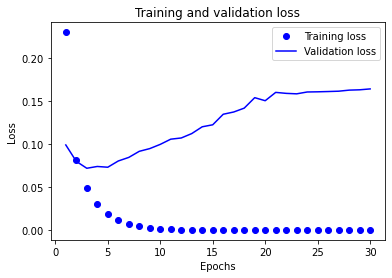

In [424]:
history_dict4 = history4a.history
history_dict4.keys()

acc4 = history4a.history['accuracy']
val_acc4 = history4a.history['val_accuracy']
loss4 = history4a.history['loss']
val_loss4 = history4a.history['val_loss']

epochs = range(1, len(acc4) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss4, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss4, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

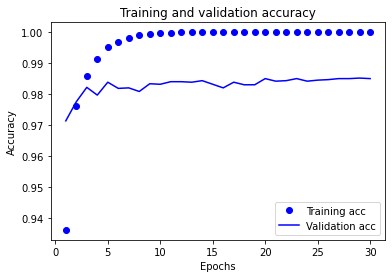

In [425]:
plt.clf()   # clear figure
acc_values4 = history_dict4['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc4, 'bo', label='Training acc')
plt.plot(epochs, val_acc4, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Experiment 5

In [428]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(x_train_norm,y_train_encoded)

RandomForestClassifier(random_state=42)

In [429]:
n = 70
imp_arr = rnd_clf.feature_importances_
idx = (-imp_arr).argsort()[:n]    

x_train_imp = x_train_norm[:,idx]
x_test_imp = x_test_norm[:,idx]
x_train_imp.shape, x_test_imp.shape # the reduced images have dimension 70

((60000, 70), (10000, 70))

In [432]:
model5 = models.Sequential()
model5.add(layers.Dense(413, activation='relu', input_shape=(70,)))
model5.add(layers.Dense(10, activation='softmax'))  

# For use with non-categorical labels
model5.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history5 = model5.fit(x_train_imp, y_train_encoded, epochs=30,
                    validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 2s 714us/step - loss: 0.6815 - accuracy: 0.7971 - val_loss: 0.2880 - val_accuracy: 0.9158
Epoch 2/30
1688/1688 [==============================] - 1s 666us/step - loss: 0.3213 - accuracy: 0.9033 - val_loss: 0.2241 - val_accuracy: 0.9313
Epoch 3/30
1688/1688 [==============================] - 1s 669us/step - loss: 0.2555 - accuracy: 0.9217 - val_loss: 0.2140 - val_accuracy: 0.9365
Epoch 4/30
1688/1688 [==============================] - 1s 659us/step - loss: 0.2190 - accuracy: 0.9332 - val_loss: 0.1987 - val_accuracy: 0.9403
Epoch 5/30
1688/1688 [==============================] - 1s 681us/step - loss: 0.1913 - accuracy: 0.9418 - val_loss: 0.1907 - val_accuracy: 0.9433
Epoch 6/30
1688/1688 [==============================] - 1s 667us/step - loss: 0.1787 - accuracy: 0.9455 - val_loss: 0.1853 - val_accuracy: 0.9455
Epoch 7/30
1688/1688 [==============================] - 1s 655us/step - loss: 0.1677 - accuracy: 0.9477 - val_loss: 0.1855 -

In [434]:
hist_dict5 = history5.history
hist_dict5.keys()

print(f'''acc: {hist_dict5['accuracy'][-1]:.4}, val acc: {hist_dict5['val_accuracy'][-1]:.4},
loss: {hist_dict5['loss'][-1]:.4}, val loss: {hist_dict5['val_loss'][-1]:.4}''')

acc: 0.9759, val acc: 0.9433,
loss: 0.08297, val loss: 0.25


In [435]:
test_loss, test_acc = model5.evaluate(x_test_imp, y_test_encoded)


313/313 [==============================] - 0s 444us/step - loss: 0.2698 - accuracy: 0.9394


In [436]:
print(f'test acc: {test_acc}, test loss: {test_loss}') 


test acc: 0.9394000172615051, test loss: 0.2698323130607605


The performance of the model in experiment 5 is lower than that the performance in experiment 3 and 4. However it is worth noting that the dimensions were significantly reduced and the performance in comparison did not drop by that much. 

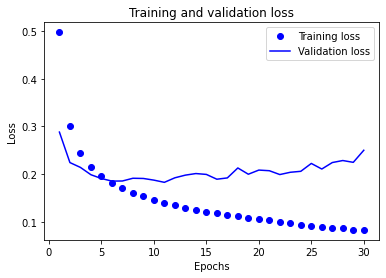

In [437]:
acc5 = history5.history['accuracy']
val_acc5 = history5.history['val_accuracy']
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']

epochs = range(1, len(acc5) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss5, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss5, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


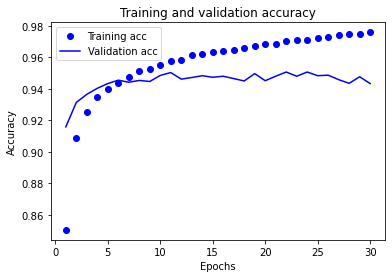

In [440]:
plt.clf()   # clear figure
acc_values5 = hist_dict5['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc5, 'bo', label='Training acc')
plt.plot(epochs, val_acc5, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()